In [10]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

#Reading from the composite file, rather than each individual one. 
f = open('ObjectsInfoMRT.csv', 'r', encoding='utf-8')
lines=f.readlines()
f.close()
dat=lines[0:len(lines)]
num_stars=len(dat)
massI=np.zeros(num_stars)
radiI=np.zeros(num_stars)
masse1I=np.zeros(num_stars)
radie1I=np.zeros(num_stars)
masse2I=np.zeros(num_stars)
radie2I=np.zeros(num_stars)
errI=np.zeros(num_stars)
typeI=np.zeros(num_stars)

#Ordinant is so I can point to typeIndex without making it a numpy array. 
for i in range(num_stars):
    line=dat[i]
    columns=line.split(',')
    massI[i] = columns[1]
    masse1I[i] = columns[2]
    masse2I[i] = columns[3]
    radiI[i] = columns[4]
    radie1I[i] = columns[5]
    radie2I[i] = columns[6]
    if (columns[7] == "Solar System Planet"): 
        typeI[i] = 1
    elif (columns[7] == "Asteroid"): 
        typeI[i] = 2
    elif (columns[7] == "Brown Dwarf"): 
        typeI[i] = 3
    elif (columns[7] == "Comet"): 
        typeI[i] = 4
    elif (columns[7] == "Exoplanet"): 
        typeI[i] = 5
    elif (columns[7] == "Inner Solar System Moon"): 
        typeI[i] = 6
    elif (columns[7] == "Jovian Moon"): 
        typeI[i] = 7
    elif (columns[7] == "Neptunian Moon"): 
        typeI[i] = 8
    elif (columns[7] == "The Sun"): 
        typeI[i] = 9
    elif (columns[7] == "Saturnian Moon"): 
        typeI[i] = 10
    elif (columns[7] == "Star"): 
        typeI[i] = 11
    elif (columns[7] == "Supermassive Black Hole"): 
        typeI[i] = 12
    elif (columns[7] == "Trans Neptunian Object" or columns[7] == "Trans-Neptunian Object"): 
        typeI[i] = 13
    elif (columns[7] == "Uranian Moon"): 
        typeI[i] = 14
    elif (columns[7] == "White Dwarf"): 
        typeI[i] = 15
    else:
        typeI[i] = 0
        print(i)
        print(columns[7])
   
#Error checker
#Dunno why the above comment line is red but awesome.
err = 0.5
# 2 is "allow everything", 0.28 is "a good value", and 0.1 is "stringent"
radieI=np.maximum(radie1I,-radie2I)
masseI=np.maximum(masse1I,-masse2I)
errI = np.maximum((radieI*3.) / (radiI*3.),masseI / massI)
sel=np.where(err > (radieI*3.)/(radiI*3.))
massI=massI[sel]
radiI=radiI[sel]
masseI=masseI[sel]
radieI=radieI[sel]
errI=errI[sel]
typeI=typeI[sel]
radie1I=radie1I[sel]
radie2I=radie2I[sel]
masse1I=masse1I[sel]
masse2I=masse2I[sel]
sel=np.where(err > masseI/massI)
massI=massI[sel]
radiI=radiI[sel]
masseI=masseI[sel]
radieI=radieI[sel]
errI=errI[sel]
typeI=typeI[sel]
radie1I=radie1I[sel]
radie2I=radie2I[sel]
masse1I=masse1I[sel]
masse2I=masse2I[sel]
errTestR=(radieI*3)/(radiI*3)
errTestM=(masseI)/(massI)

i=0
while (i < len(errI)):
    if (massI[i] > 10e10):
        print(massI[i], errI[i],errTestR[i],errTestM[i])
    i=i+1
re=6371.
me=5.97e24
ms=1.98847e30
rs=696340

densI=(massI*me)/(4*3.14/3)/(radiI*re)**3/1e12
#Calculating error for density is rather annoying, as it depends on two variables in a not obvious way.
#So we need to try every optoin for the variables, and see which one is the greatest increase
#and which is the greatest decrease.
diff1 = (((massI+masse1I)*me)/(4*3.14/3)/((radiI+radie1I)*re)**3/1e12)
diff2 = (((massI+masse1I)*me)/(4*3.14/3)/((radiI+radie2I)*re)**3/1e12)
diff3 = (((massI+masse2I)*me)/(4*3.14/3)/((radiI+radie1I)*re)**3/1e12)
diff4 = (((massI+masse2I)*me)/(4*3.14/3)/((radiI+radie2I)*re)**3/1e12)
i = 0
dense1I=densI*0. #To make sure these are new arrays, not just pointers to densI. 
dense2I=densI*0.
while (i < len(densI)):
    dense1I[i] = -densI[i] + np.max(np.array([diff1[i], diff2[i], diff3[i], diff4[i]]))
    dense2I[i] = -densI[i] + np.min(np.array([diff1[i], diff2[i], diff3[i], diff4[i]]))
    i=i+1

gI=6.67e-11*(massI*me)/(radiI*re)**2/1e6 

#Black Holes follow a funciton, not observation. 
bhm=np.array([5,10,5e1,1e2,5e2,1e3,5e3,1e4,5e4,1e5,5e5,1e6,5e6,1e7,5e7,1e8,5e8,1e9,5e9,1e10,4e10])
bhm = bhm*ms #mass
bhr = (bhm*2.0*6.67e-11)/(8.988e16) #radius from mass
bhg = 6.67e-11*bhm/bhr**2
bhd = bhm/(4*3.14/3)/(bhr/1000)**3/1e12 #density from mass and radius
bhm = bhm/me #normalize
bhr = bhr/(1000*re) #normalize, the Schwarzchild relation gives a radius in m, not km.
bht = 0.020554/bhm #temperature is related to mass for black holes.

2165000000000000.0 0.13847575057736722 0.10526845637583893 0.13847575057736722
1432000000000.0 0.2916213275299238 0.2916213275299238 0.27493016759776534


<function matplotlib.pyplot.show(block=None)>

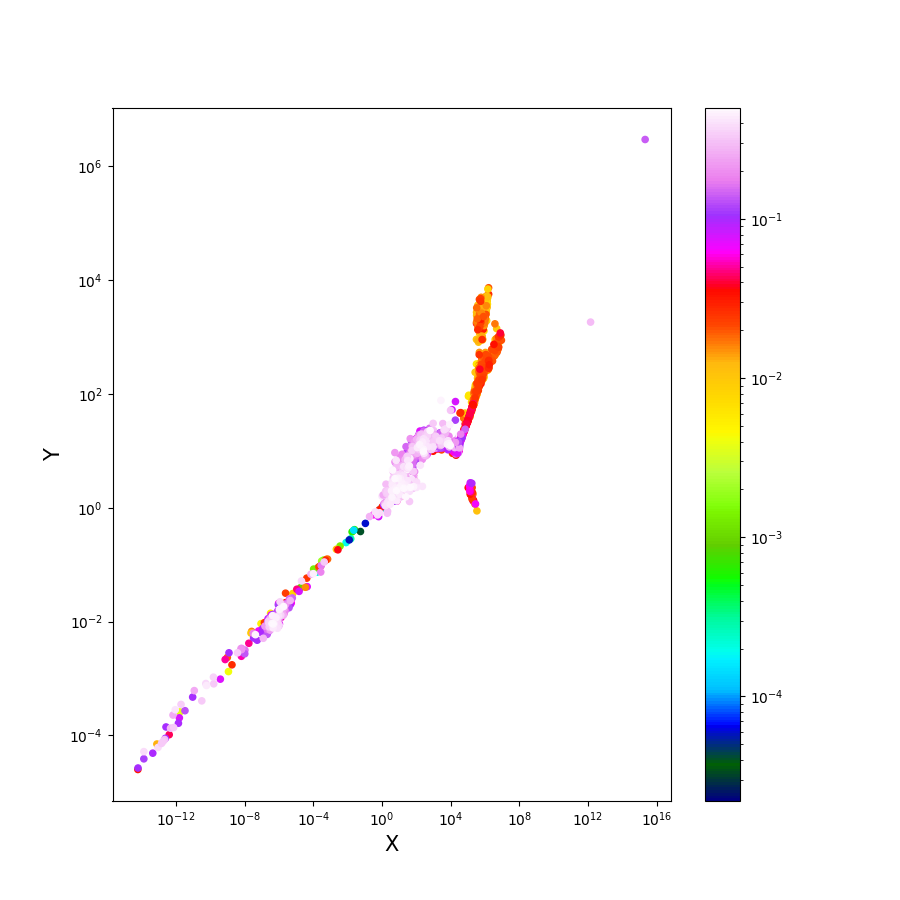

In [11]:
plt.figure(figsize=(9,9))

#oh boy the options!
#Default option: just plot everything identically.
#plt.scatter(massI,radiI,color='green',s=10)

#Error plot: color points based on relative error.
plt.scatter(massI, radiI, c=errI, cmap='gist_ncar', norm=mpl.colors.LogNorm(),s=20)
plt.colorbar()

#Temp plot: color based on temperature
#plt.scatter(massI, radiI, c=tempI, cmap='gist_ncar',norm=mpl.colors.LogNorm(vmin = 50),s=10)
#Using log scale actually removes the "-1" values, which is what we want.
#plt.colorbar()

#Temp plot: mass vs T, nothing fancy.
#plt.scatter(massI,tempI,color='green',s=10)
#plt.ylim([10,1e6])
# Limits required, black hole temps so low they ruin the plot.

plt.yscale('log')
plt.xscale('log')
plt.xlabel('X', size=15)
plt.ylabel('Y', size=15)

#plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")

plt.show

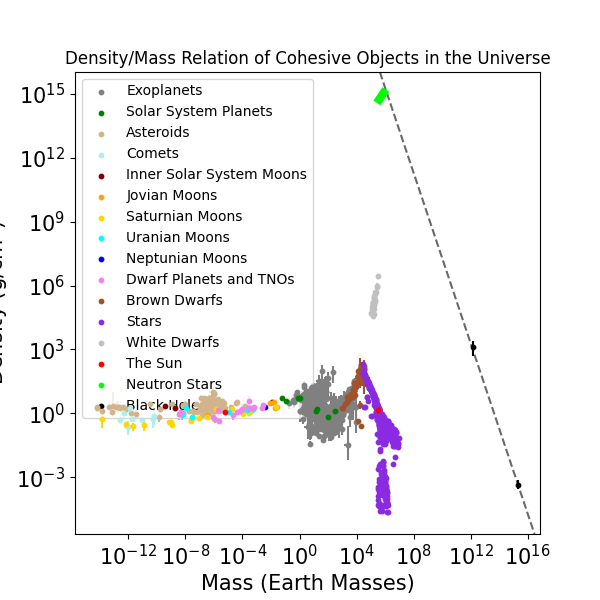

In [12]:
%matplotlib ipympl

# More Bulky Graphs
size = 10

# Mass Density Plot
plt.figure(figsize=(6,6))

plt.scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",zorder=100)
plt.errorbar(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],
             xerr=[-masse2I[np.where(typeI == 5)],masse1I[np.where(typeI == 5)]], 
             yerr=[-dense2I[np.where(typeI == 5)],dense1I[np.where(typeI == 5)]],
             color='gray',ls="none")

plt.scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",zorder=100)
plt.errorbar(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],
             xerr=[-masse2I[np.where(typeI == 1)],masse1I[np.where(typeI == 1)]], 
             yerr=[-dense2I[np.where(typeI == 1)],dense1I[np.where(typeI == 1)]],
             color='green',ls="none")

plt.scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",zorder=100)
plt.errorbar(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],
             xerr=[-masse2I[np.where(typeI == 2)],masse1I[np.where(typeI == 2)]], 
             yerr=[-dense2I[np.where(typeI == 2)],dense1I[np.where(typeI == 2)]],
             color='tan',ls="none")

plt.scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",zorder=100)
plt.errorbar(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],
             xerr=[-masse2I[np.where(typeI == 4)],masse1I[np.where(typeI == 4)]], 
             yerr=[-dense2I[np.where(typeI == 4)],dense1I[np.where(typeI == 4)]],
             color='paleturquoise',ls="none")

plt.scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",zorder=100)
plt.errorbar(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],
             xerr=[-masse2I[np.where(typeI == 6)],masse1I[np.where(typeI == 6)]], 
             yerr=[-dense2I[np.where(typeI == 6)],dense1I[np.where(typeI == 6)]],
             color='maroon',ls="none")

plt.scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",zorder=100)
plt.errorbar(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],
             xerr=[-masse2I[np.where(typeI == 7)],masse1I[np.where(typeI == 7)]], 
             yerr=[-dense2I[np.where(typeI == 7)],dense1I[np.where(typeI == 7)]],
             color='orange',ls="none")

plt.scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",zorder=100)
plt.errorbar(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],
             xerr=[-masse2I[np.where(typeI == 10)],masse1I[np.where(typeI == 10)]], 
             yerr=[-dense2I[np.where(typeI == 10)],dense1I[np.where(typeI == 10)]],
             color='gold',ls="none")

plt.scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",zorder=100)
plt.errorbar(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],
             xerr=[-masse2I[np.where(typeI == 14)],masse1I[np.where(typeI == 14)]], 
             yerr=[-dense2I[np.where(typeI == 14)],dense1I[np.where(typeI == 14)]],
             color='cyan',ls="none")

plt.scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",zorder=100)
plt.errorbar(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],
             xerr=[-masse2I[np.where(typeI == 8)],masse1I[np.where(typeI == 8)]], 
             yerr=[-dense2I[np.where(typeI == 8)],dense1I[np.where(typeI == 8)]],
             color='blue',ls="none")

plt.scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs", zorder=100)
plt.errorbar(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],
             xerr=[-masse2I[np.where(typeI == 13)],masse1I[np.where(typeI == 13)]], 
             yerr=[-dense2I[np.where(typeI == 13)],dense1I[np.where(typeI == 13)]],
             color='violet',ls="none")

plt.scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",zorder=100)
plt.errorbar(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],
             xerr=[-masse2I[np.where(typeI == 3)],masse1I[np.where(typeI == 3)]], 
             yerr=[-dense2I[np.where(typeI == 3)],dense1I[np.where(typeI == 3)]],
             color='sienna',ls="none")

plt.scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",zorder=100)
plt.errorbar(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],
             xerr=[-masse2I[np.where(typeI == 11)],masse1I[np.where(typeI == 11)]], 
             yerr=[-dense2I[np.where(typeI == 11)],dense1I[np.where(typeI == 11)]],
             color='blueviolet',ls="none")

plt.scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",zorder=100)
plt.errorbar(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],
             xerr=[-masse2I[np.where(typeI == 15)],masse1I[np.where(typeI == 15)]], 
             yerr=[-dense2I[np.where(typeI == 15)],dense1I[np.where(typeI == 15)]],
             color='silver',ls="none")

plt.scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",zorder=100)
plt.errorbar(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],
             xerr=[-masse2I[np.where(typeI == 9)],masse1I[np.where(typeI == 9)]], 
             yerr=[-dense2I[np.where(typeI == 9)],dense1I[np.where(typeI == 9)]],
             color='red',ls="none")

plt.scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars",zorder=100)
#plt.plot(bhm[0:], bhd[0:], color='dimgray', ls="dashed") #Black Holes
plt.axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
plt.scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100)
plt.errorbar(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],
             xerr=[-masse2I[np.where(typeI == 12)],masse1I[np.where(typeI == 12)]], 
             yerr=[-dense2I[np.where(typeI == 12)],dense1I[np.where(typeI == 12)]],
             color='black',ls="none")

plt.scatter(6e-6,1.15,s=size*1,color='red',zorder = 1000)

plt.plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Mass (Earth Masses)', size=15)
plt.ylabel('Density (g/cm$^3$)', size=15)
plt.title("Density/Mass Relation of Cohesive Objects in the Universe")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend()
plt.show()

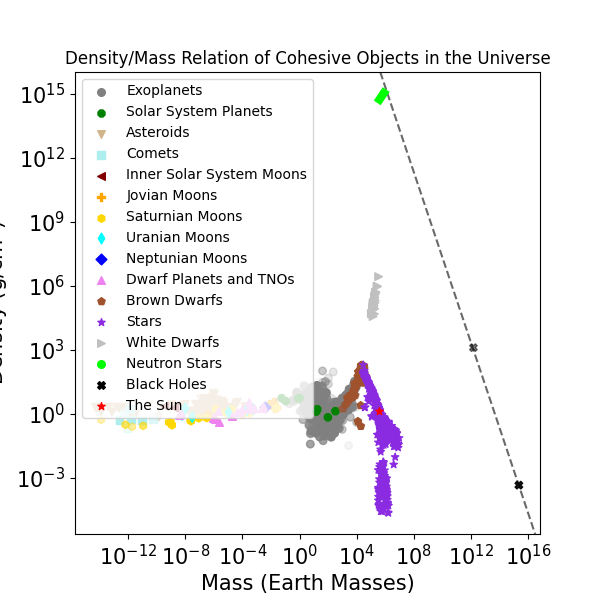

In [13]:
# More Bulky Graphs
size = 30
# Set opacity values based on error. 
alpha = errI*0.
i = 0
maxErr = 0.5
minErr = 0.1
while (i < len(errI)):
    if (maxErr < errI[i]):
        alpha[i] = 0.
    elif (minErr > errI[i]):
        alpha[i] = 1.
    else:
        alpha[i] = ((maxErr - errI[i])/(maxErr - minErr))
        #Looks to scale correctly, at min-err goes to 1, at max-err goes to 0. Just gotta dile however desired.
    i=i+1

# sel=np.where((radiI*3)*err > radieI*3)
# sel=np.where(massI*err > masseI)

# Mass Density Plot
plt.figure(figsize=(6,6))
plt.scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
plt.scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
plt.scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
plt.scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
plt.scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
plt.scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
plt.scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
plt.scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
plt.scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
plt.scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 9)],marker="^")
plt.scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
plt.scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
#plt.scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],
            #c=tempI[np.where(typeI == 11)],cmap='RdBu',vmin=2000,vmax=20000, s=60)
plt.scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
plt.scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
plt.scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
#plt.plot(bhm[0:], bhd[0:], color='dimgray', ls="dashed") #Black Holes
plt.axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
plt.scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
plt.plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Mass (Earth Masses)', size=15)
plt.ylabel('Density (g/cm$^3$)', size=15)
plt.title("Density/Mass Relation of Cohesive Objects in the Universe")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

#Manual legend so opacity doesn't affect the labels
legend1 = plt.scatter(0,0,color='gray', s=size,label = "Exoplanets",marker="o")
legend2 = plt.scatter(0,0,color='green', s=size, label = "Solar System Planets",marker="8")
legend3 = plt.scatter(0,0,color='tan', s=size, label = "Asteroids",marker="v")
legend4 = plt.scatter(0,0,color='paleturquoise', s=size, label = "Comets",marker="s")
legend5 = plt.scatter(0,0,color='maroon', s=size, label = "Inner Solar System Moons",marker="<")
legend6 = plt.scatter(0,0,color='orange', s=size, label = "Jovian Moons",marker="P")
legend7 = plt.scatter(0,0,color='gold', s=size, label = "Saturnian Moons",marker="h")
legend8 = plt.scatter(0,0,color='cyan', s=size, label = "Uranian Moons",marker="d")
legend88 = plt.scatter(0,0,color='blue', s=size, label = "Neptunian Moons",marker="D")
legend9 = plt.scatter(0,0,color='violet', s=size, label = "Dwarf Planets and TNOs",marker="^")
legend10 = plt.scatter(0,0,color='sienna', s=size, label = "Brown Dwarfs",marker="p")
legend11 = plt.scatter(0,0,color='blueviolet', s=size, label = "Stars", marker="*")
legend12 = plt.scatter(0,0,color='silver', s=size, label = "White Dwarfs",marker=">")
legend13 = plt.scatter(0,0,color='lime', s=size, label = "Neutron Stars")
legend14 = plt.scatter(0,0,color='black', s=size, label = "Black Holes",marker="X")
legend15 = plt.scatter(0,0,color='red', s=size, label = "The Sun",marker="*")

plt.legend(handles = [legend1,legend2,legend3,legend4,legend5,legend6,legend7,legend8,legend88,legend9,legend10,legend11,legend12,legend13,legend14,legend15])
plt.show()

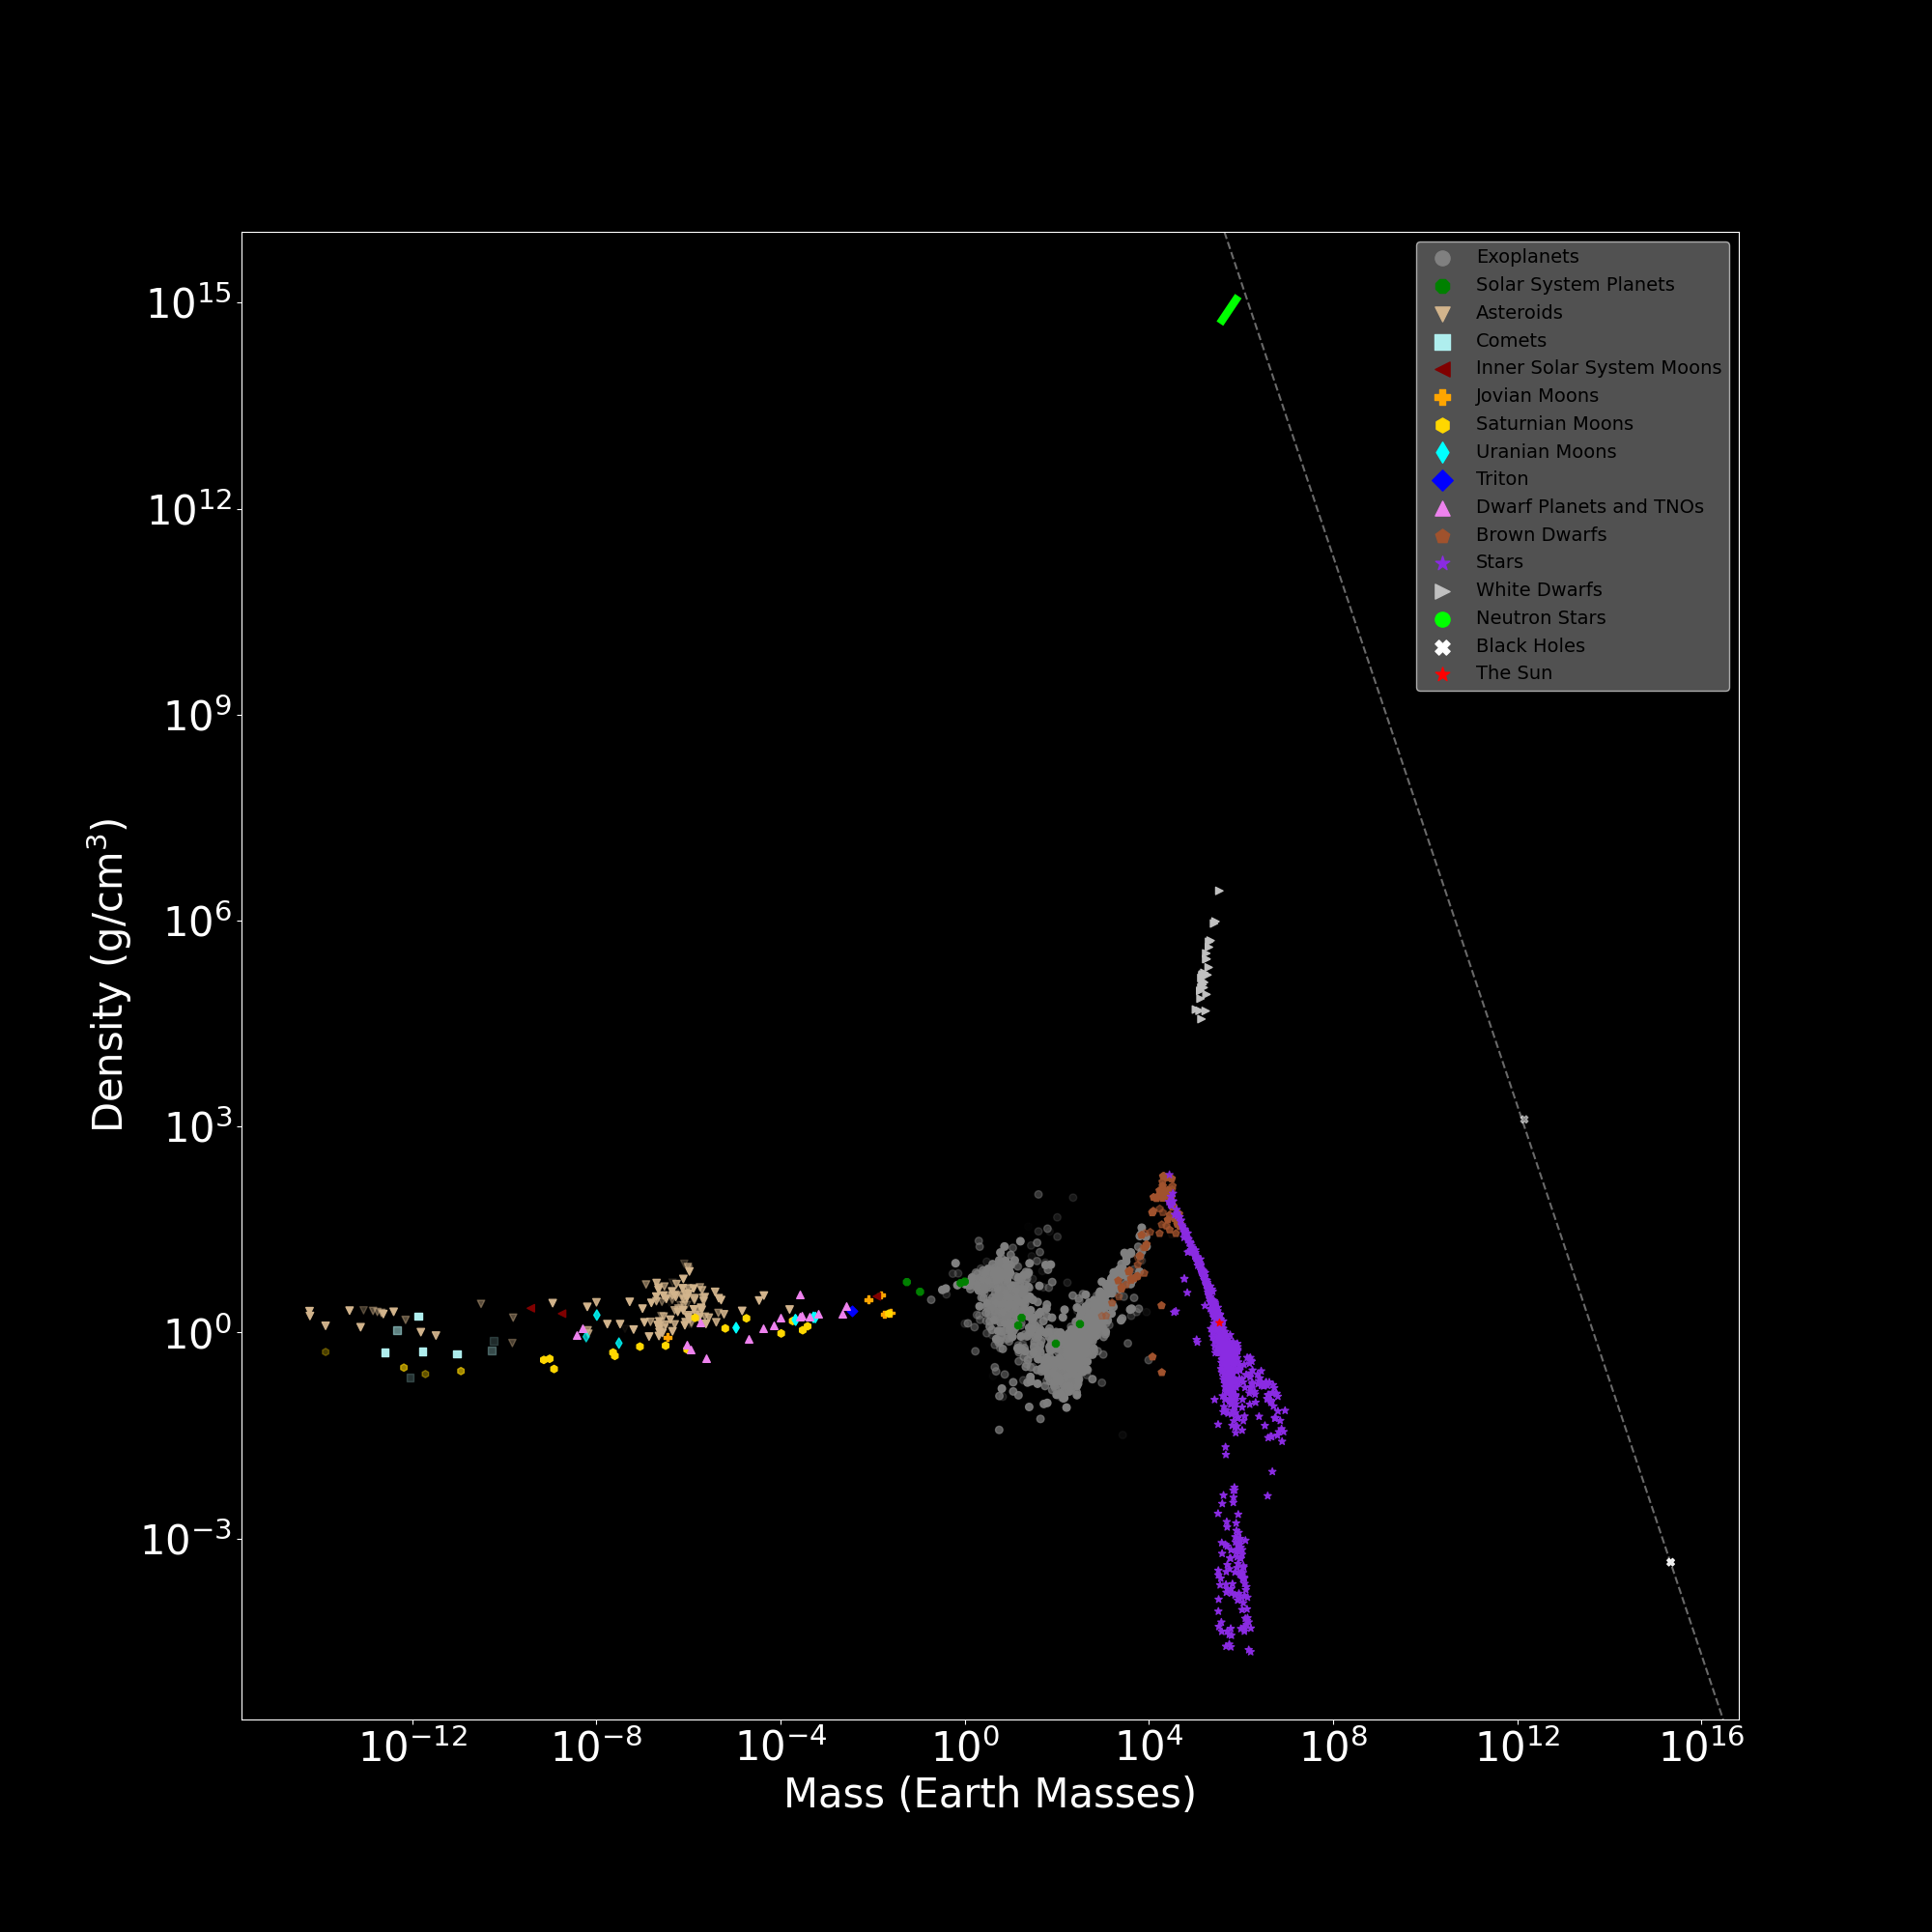

In [14]:
# More Bulky Graphs
size = 30
# Set opacity values based on error. 
alpha = errI*0.
i = 0
maxErr = 0.5
minErr = 0.1
while (i < len(errI)):
    if (maxErr < errI[i]):
        alpha[i] = 0.
    elif (minErr > errI[i]):
        alpha[i] = 1.
    else:
        alpha[i] = ((maxErr - errI[i])/(maxErr - minErr))
        #Looks to scale correctly, at min-err goes to 1, at max-err goes to 0. Just gotta dile however desired.
    i=i+1

# sel=np.where((radiI*3)*err > radieI*3)
# sel=np.where(massI*err > masseI)

# Mass Density Plot
plt.figure(figsize=(20,20), facecolor='black')
ax=plt.axes()
ax.set_facecolor("black")
ax.tick_params(color='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
plt.scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
plt.scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
plt.scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
plt.scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
plt.scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
plt.scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
plt.scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
plt.scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
plt.scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Triton",alpha=alpha[np.where(typeI == 8)],marker="D")
plt.scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 9)],marker="^")
plt.scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
plt.scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
#plt.scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],
            #c=tempI[np.where(typeI == 11)],cmap='RdBu',vmin=2000,vmax=20000, s=60)
plt.scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
plt.scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
plt.scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
#plt.plot(bhm[0:], bhd[0:], color='dimgray', ls="dashed") #Black Holes
plt.axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
plt.scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
plt.plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Mass (Earth Masses)', size=30)
plt.ylabel('Density (g/cm$^3$)', size=30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

#Manual legend so opacity doesn't affect the labels
legend1 = plt.scatter(0,0,color='gray', s=size,label = "Exoplanets",marker="o")
legend2 = plt.scatter(0,0,color='green', s=size, label = "Solar System Planets",marker="8")
legend3 = plt.scatter(0,0,color='tan', s=size, label = "Asteroids",marker="v")
legend4 = plt.scatter(0,0,color='paleturquoise', s=size, label = "Comets",marker="s")
legend5 = plt.scatter(0,0,color='maroon', s=size, label = "Inner Solar System Moons",marker="<")
legend6 = plt.scatter(0,0,color='orange', s=size, label = "Jovian Moons",marker="P")
legend7 = plt.scatter(0,0,color='gold', s=size, label = "Saturnian Moons",marker="h")
legend8 = plt.scatter(0,0,color='cyan', s=size, label = "Uranian Moons",marker="d")
legend88 = plt.scatter(0,0,color='blue', s=size, label = "Triton",marker="D")
legend9 = plt.scatter(0,0,color='violet', s=size, label = "Dwarf Planets and TNOs",marker="^")
legend10 = plt.scatter(0,0,color='sienna', s=size, label = "Brown Dwarfs",marker="p")
legend11 = plt.scatter(0,0,color='blueviolet', s=size, label = "Stars", marker="*")
legend12 = plt.scatter(0,0,color='silver', s=size, label = "White Dwarfs",marker=">")
legend13 = plt.scatter(0,0,color='lime', s=size, label = "Neutron Stars")
legend14 = plt.scatter(0,0,color='white', s=size, label = "Black Holes",marker="X")
legend15 = plt.scatter(0,0,color='red', s=size, label = "The Sun",marker="*")

plt.legend(fontsize=14, markerscale=2, facecolor="#666666", handles = [legend1,legend2,legend3,legend4,legend5,legend6,legend7,legend8,legend88,legend9,legend10,legend11,legend12,legend13,legend14,legend15])

plt.savefig("MassDensityPlot.pdf", format="pdf")

plt.show()

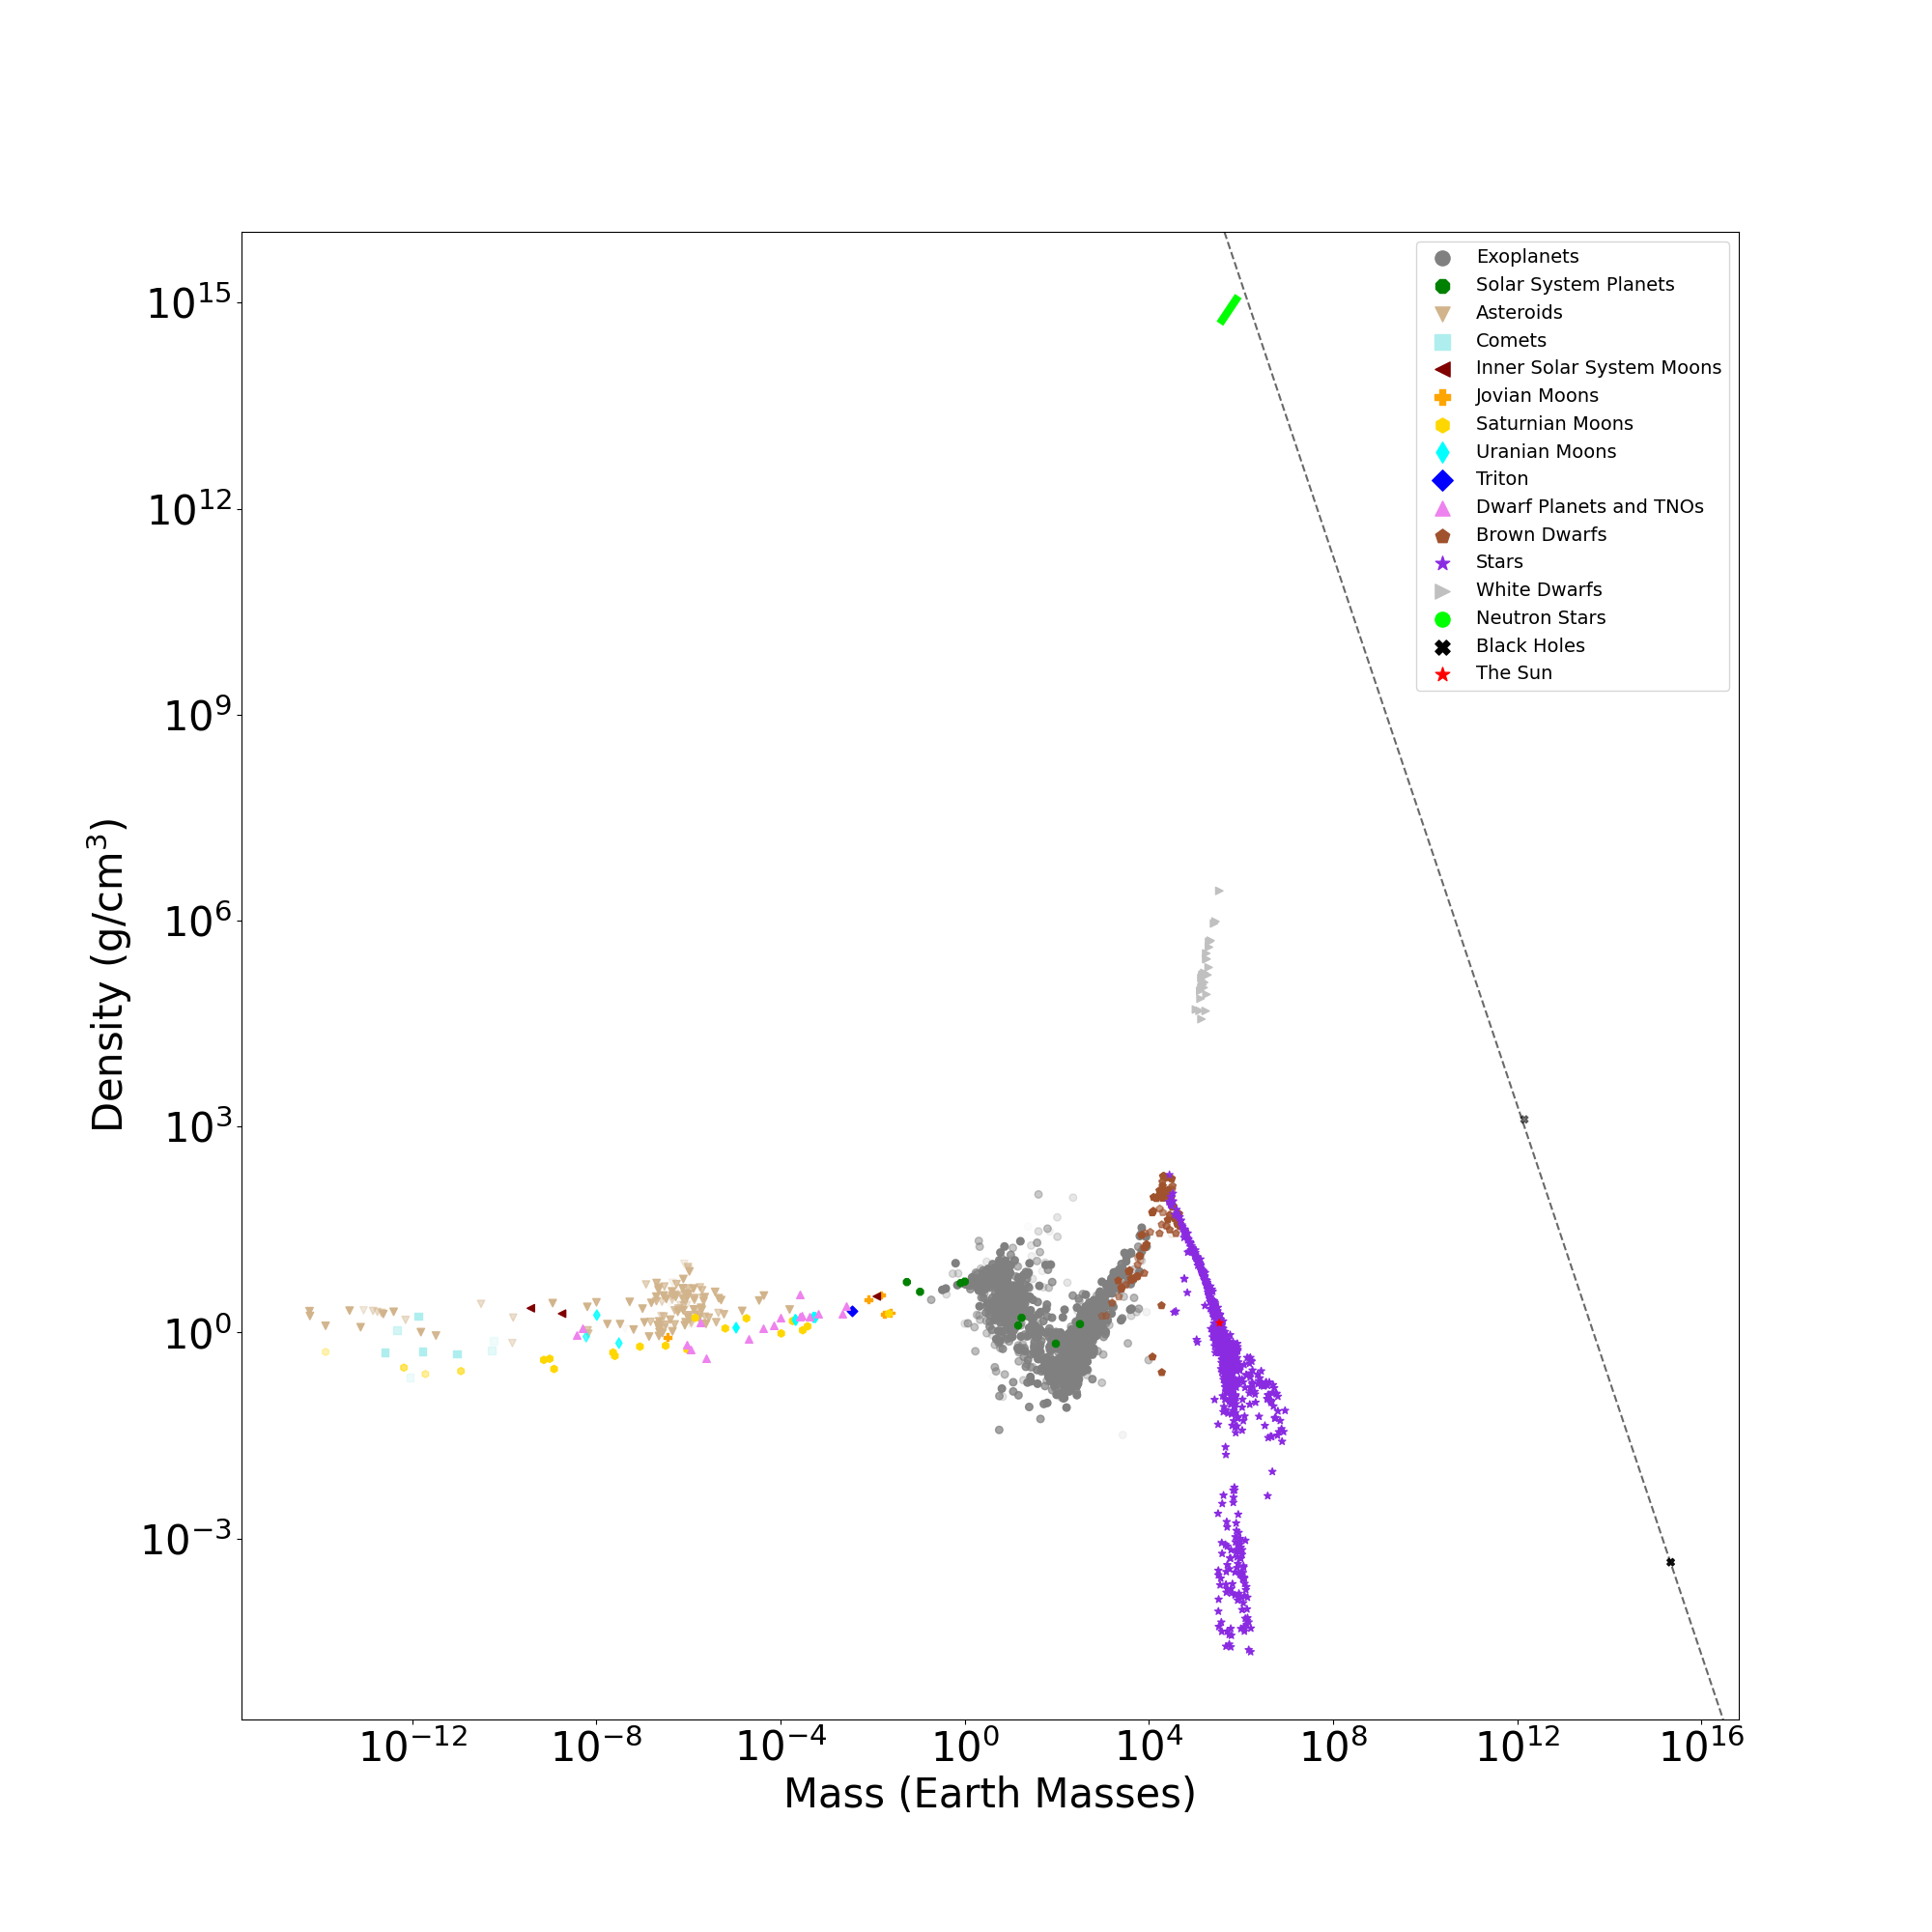

In [15]:
#same as above cell, but white background.

# More Bulky Graphs
size = 30
# Set opacity values based on error. 
alpha = errI*0.
i = 0
maxErr = 0.5
minErr = 0.1
while (i < len(errI)):
    if (maxErr < errI[i]):
        alpha[i] = 0.
    elif (minErr > errI[i]):
        alpha[i] = 1.
    else:
        alpha[i] = ((maxErr - errI[i])/(maxErr - minErr))
        #Looks to scale correctly, at min-err goes to 1, at max-err goes to 0. Just gotta dile however desired.
    i=i+1

# sel=np.where((radiI*3)*err > radieI*3)
# sel=np.where(massI*err > masseI)

# Mass Density Plot
plt.figure(figsize=(20,20), facecolor='white')
ax=plt.axes()
ax.set_facecolor("white")
ax.tick_params(color='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
plt.scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
plt.scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
plt.scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
plt.scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
plt.scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
plt.scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
plt.scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
plt.scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
plt.scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Triton",alpha=alpha[np.where(typeI == 8)],marker="D")
plt.scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 9)],marker="^")
plt.scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
plt.scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
#plt.scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],
            #c=tempI[np.where(typeI == 11)],cmap='RdBu',vmin=2000,vmax=20000, s=60)
plt.scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
plt.scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
plt.scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
#plt.plot(bhm[0:], bhd[0:], color='dimgray', ls="dashed") #Black Holes
plt.axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
plt.scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
plt.plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Mass (Earth Masses)', size=30)
plt.ylabel('Density (g/cm$^3$)', size=30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

#Manual legend so opacity doesn't affect the labels
legend1 = plt.scatter(0,0,color='gray', s=size,label = "Exoplanets",marker="o")
legend2 = plt.scatter(0,0,color='green', s=size, label = "Solar System Planets",marker="8")
legend3 = plt.scatter(0,0,color='tan', s=size, label = "Asteroids",marker="v")
legend4 = plt.scatter(0,0,color='paleturquoise', s=size, label = "Comets",marker="s")
legend5 = plt.scatter(0,0,color='maroon', s=size, label = "Inner Solar System Moons",marker="<")
legend6 = plt.scatter(0,0,color='orange', s=size, label = "Jovian Moons",marker="P")
legend7 = plt.scatter(0,0,color='gold', s=size, label = "Saturnian Moons",marker="h")
legend8 = plt.scatter(0,0,color='cyan', s=size, label = "Uranian Moons",marker="d")
legend88 = plt.scatter(0,0,color='blue', s=size, label = "Triton",marker="D")
legend9 = plt.scatter(0,0,color='violet', s=size, label = "Dwarf Planets and TNOs",marker="^")
legend10 = plt.scatter(0,0,color='sienna', s=size, label = "Brown Dwarfs",marker="p")
legend11 = plt.scatter(0,0,color='blueviolet', s=size, label = "Stars", marker="*")
legend12 = plt.scatter(0,0,color='silver', s=size, label = "White Dwarfs",marker=">")
legend13 = plt.scatter(0,0,color='lime', s=size, label = "Neutron Stars")
legend14 = plt.scatter(0,0,color='black', s=size, label = "Black Holes",marker="X")
legend15 = plt.scatter(0,0,color='red', s=size, label = "The Sun",marker="*")

plt.legend(fontsize=14, markerscale=2,handles = [legend1,legend2,legend3,legend4,legend5,legend6,legend7,legend8,legend88,legend9,legend10,legend11,legend12,legend13,legend14,legend15])

plt.savefig("MassDensityPlotWhite.pdf", format="pdf")

plt.show()

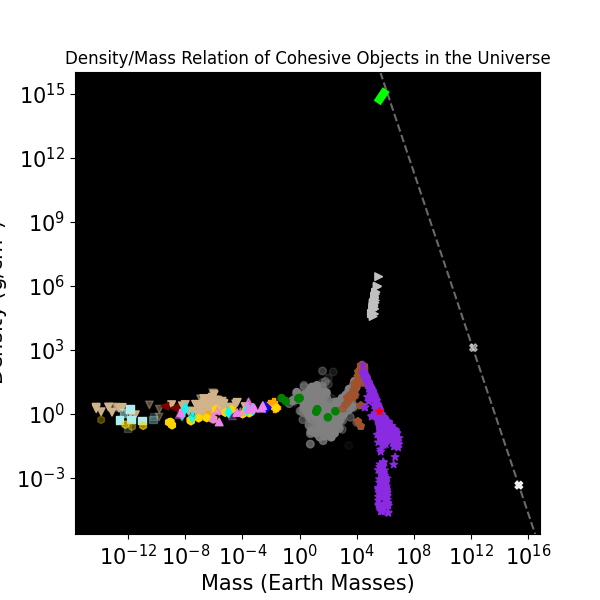

In [16]:
# More Bulky Graphs
size = 30
# Set opacity values based on error. 
alpha = errI*0.
i = 0
maxErr = 0.5
minErr = 0.1
while (i < len(errI)):
    if (maxErr < errI[i]):
        alpha[i] = 0.
    elif (minErr > errI[i]):
        alpha[i] = 1.
    else:
        alpha[i] = ((maxErr - errI[i])/(maxErr - minErr))
        #Looks to scale correctly, at min-err goes to 1, at max-err goes to 0. Just gotta dile however desired.
    i=i+1

# sel=np.where((radiI*3)*err > radieI*3)
# sel=np.where(massI*err > masseI)

# Mass Density Plot
plt.figure(figsize=(6,6))
ax=plt.axes()
ax.set_facecolor("black")
plt.scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
plt.scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
plt.scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
plt.scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
plt.scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
plt.scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
plt.scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
plt.scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
plt.scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
plt.scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
plt.scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
plt.scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
#plt.scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],
            #c=tempI[np.where(typeI == 11)],cmap='RdBu',vmin=2000,vmax=20000, s=60)
plt.scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
plt.scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
plt.scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
#plt.plot(bhm[0:], bhd[0:], color='dimgray', ls="dashed") #Black Holes
plt.axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
plt.scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
plt.plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Mass (Earth Masses)', size=15)
plt.ylabel('Density (g/cm$^3$)', size=15)
plt.title("Density/Mass Relation of Cohesive Objects in the Universe")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

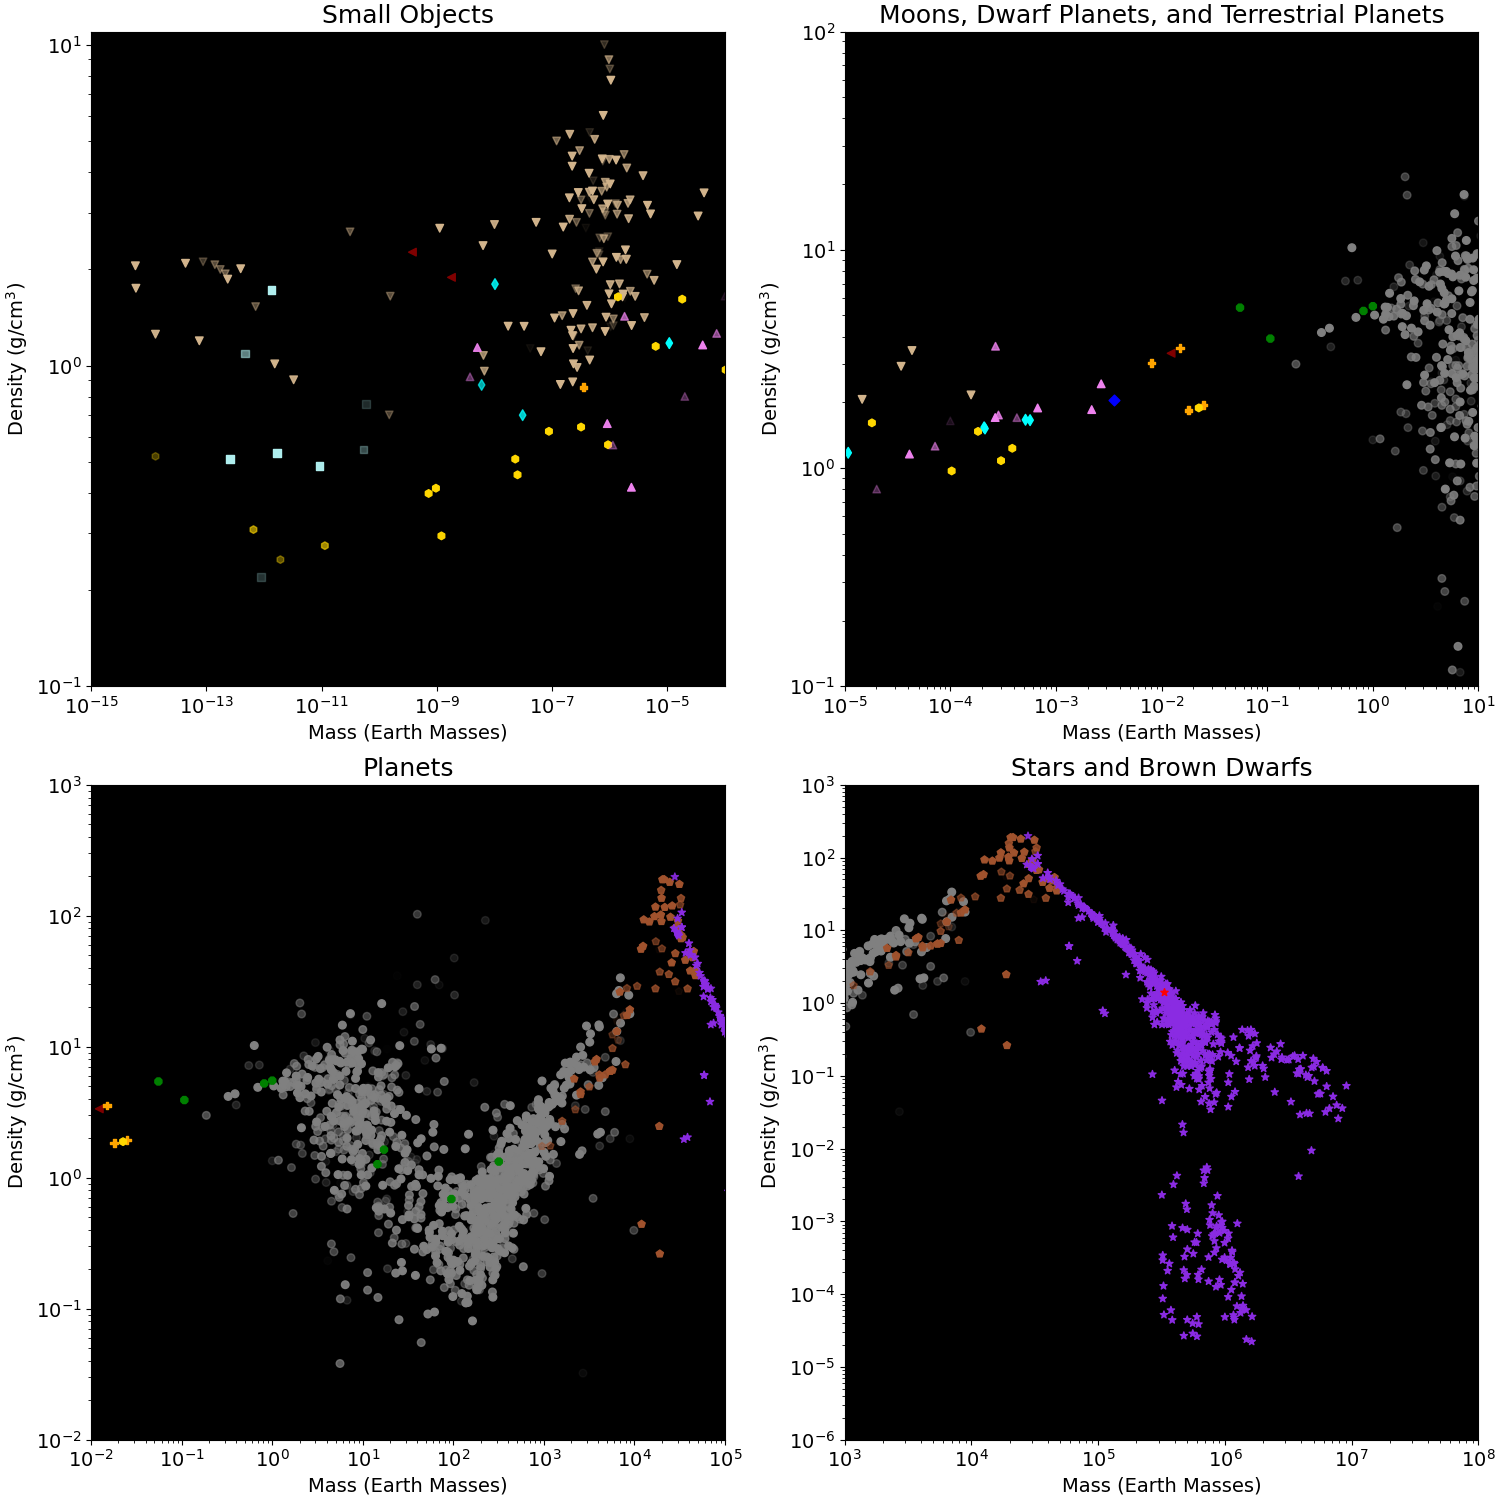

In [17]:
# More Bulky Graphs
size = 30
# Set opacity values based on error. 
alpha = errI*0.
i = 0
maxErr = 0.5
minErr = 0.1
while (i < len(errI)):
    if (maxErr < errI[i]):
        alpha[i] = 0.
    elif (minErr > errI[i]):
        alpha[i] = 1.
    else:
        alpha[i] = ((maxErr - errI[i])/(maxErr - minErr))
        #Looks to scale correctly, at min-err goes to 1, at max-err goes to 0. Just gotta dile however desired.
    i=i+1

# sel=np.where((radiI*3)*err > radieI*3)
# sel=np.where(massI*err > masseI)

fig, axs = plt.subplots(2,2,figsize = (15,15), layout = "constrained") 
i = 0
j = 0

# Mass Density Plot
axs[i][j].set_facecolor("black")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xscale='log', yscale='log', xlim=[1e-15,1e-4], ylim=[1e-1,11])
axs[i][j].set_title('Small Objects', fontsize = 18)
axs[i][j].set_xlabel('Mass (Earth Masses)', fontsize = 14)
axs[i][j].set_ylabel('Density (g/cm$^3$)', fontsize = 14)
axs[i][j].tick_params(axis='both', labelsize=14)


i=1
j=0

# Mass Density Plot
axs[i][j].set_facecolor("black")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xscale='log', yscale='log', xlim=[1e-2,1e5], ylim=[1e-2,1e3])
axs[i][j].set_title('Planets', fontsize = 18)
axs[i][j].set_xlabel('Mass (Earth Masses)', fontsize = 14)
axs[i][j].set_ylabel('Density (g/cm$^3$)', fontsize = 14)
axs[i][j].tick_params(axis='both', labelsize=14)


i=1
j=1

# Mass Density Plot
axs[i][j].set_facecolor("black")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xscale='log', yscale='log', xlim=[1e3,1e8], ylim=[1e-6,1e3])
axs[i][j].set_title('Stars and Brown Dwarfs', fontsize = 18)
axs[i][j].set_xlabel('Mass (Earth Masses)', fontsize = 14)
axs[i][j].set_ylabel('Density (g/cm$^3$)', fontsize = 14)
axs[i][j].tick_params(axis='both', labelsize=14)

i=0
j=1

# Mass Density Plot
axs[i][j].set_facecolor("black")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xscale='log', yscale='log', xlim=[1e-5,1e1], ylim=[1e-1,1e2])
axs[i][j].set_title('Moons, Dwarf Planets, and Terrestrial Planets', fontsize = 18)
axs[i][j].set_xlabel('Mass (Earth Masses)', fontsize = 14)
axs[i][j].set_ylabel('Density (g/cm$^3$)', fontsize = 14)
axs[i][j].tick_params(axis='both', labelsize=14)

plt.savefig("ZoomViews.pdf", format="pdf")

plt.show()

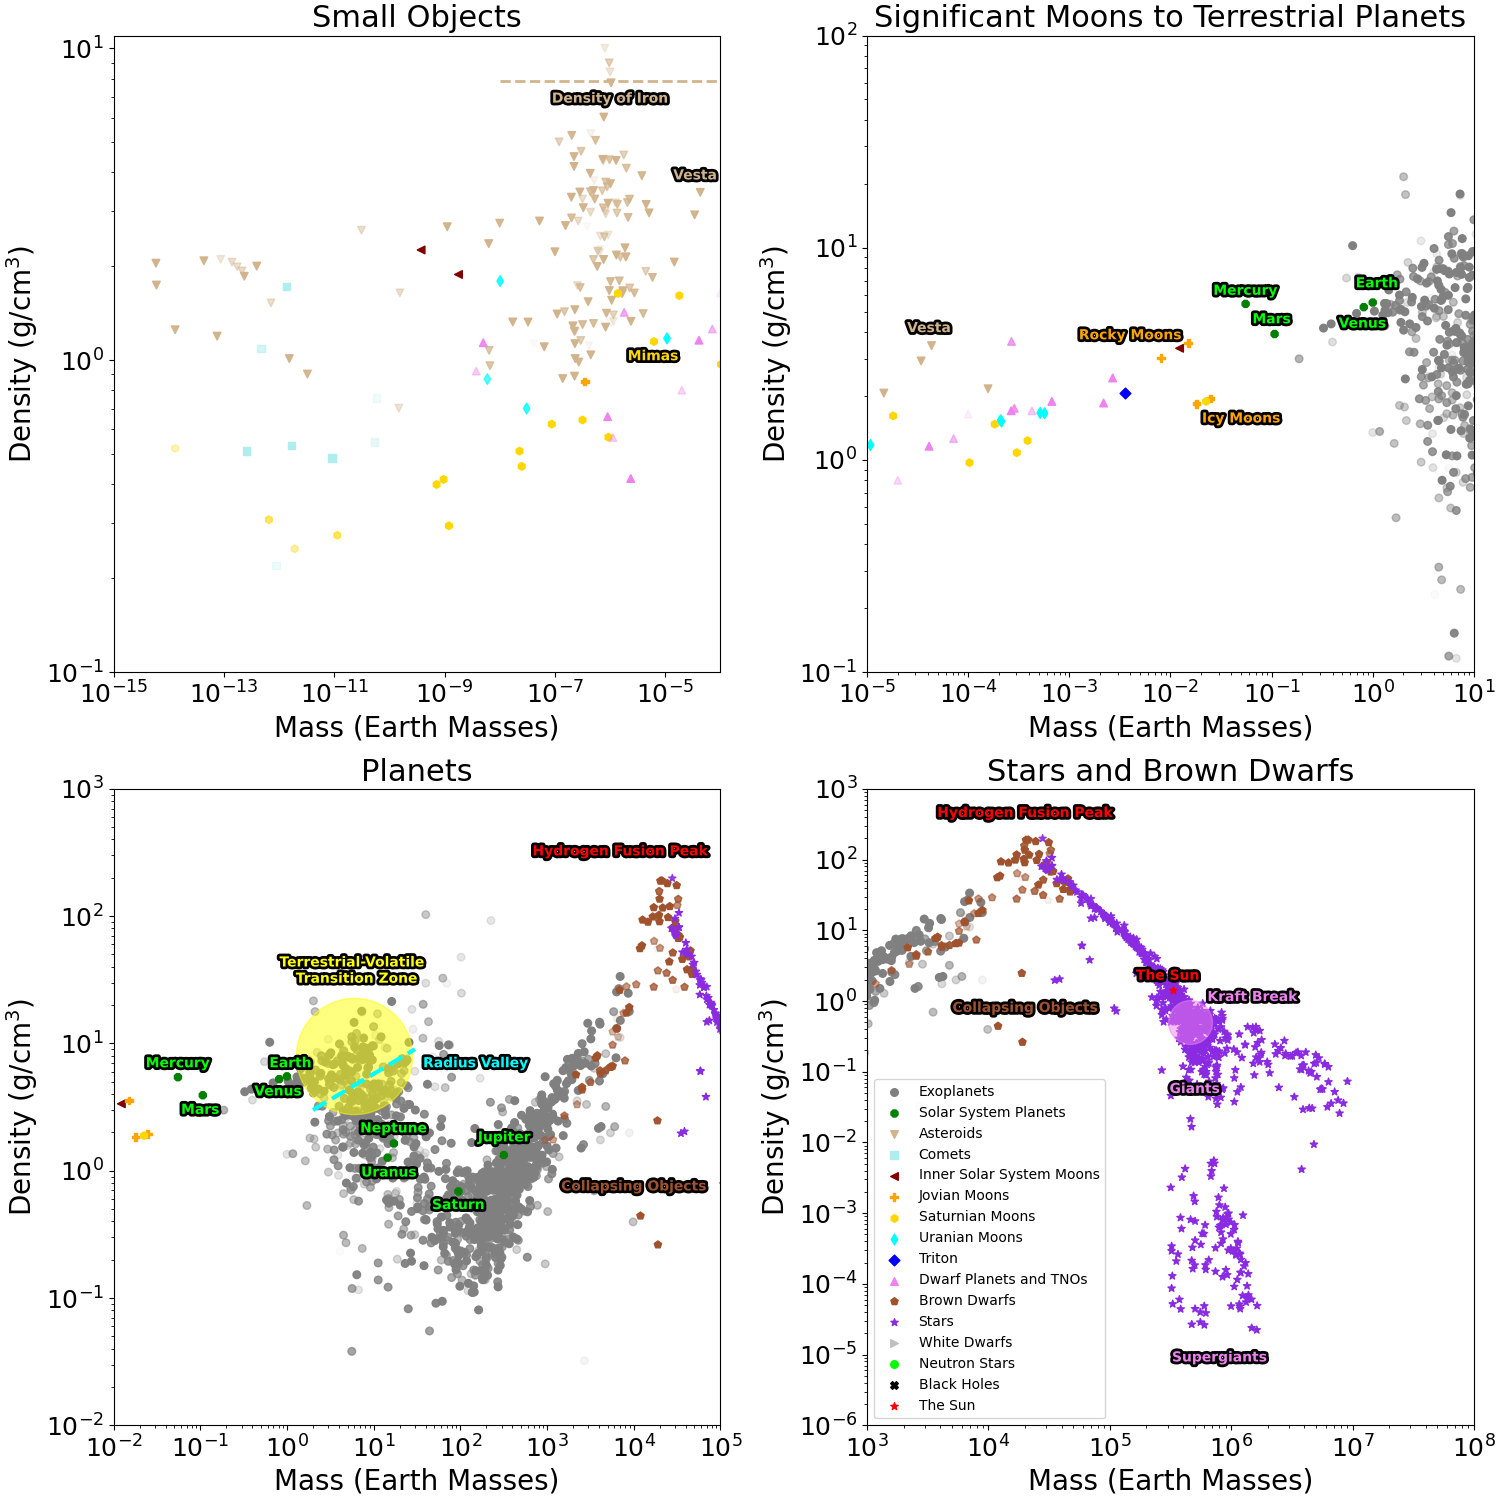

In [18]:
#Same as above, but white backgrounds.

# More Bulky Graphs
size = 30
# Set opacity values based on error. 
alpha = errI*0.
i = 0
maxErr = 0.5
minErr = 0.1
while (i < len(errI)):
    if (maxErr < errI[i]):
        alpha[i] = 0.
    elif (minErr > errI[i]):
        alpha[i] = 1.
    else:
        alpha[i] = ((maxErr - errI[i])/(maxErr - minErr))
        #Looks to scale correctly, at min-err goes to 1, at max-err goes to 0. Just gotta dile however desired.
    i=i+1

# sel=np.where((radiI*3)*err > radieI*3)
# sel=np.where(massI*err > masseI)

fig, axs = plt.subplots(2,2,figsize = (15,15), layout = "constrained") 
i = 0
j = 0

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xscale='log', yscale='log', xlim=[1e-15,1e-4], ylim=[1e-1,11])
axs[i][j].set_title('Small Objects', fontsize = 22)
axs[i][j].set_xlabel('Mass (Earth Masses)', fontsize = 20)
axs[i][j].set_ylabel('Density (g/cm$^3$)', fontsize = 20)
axs[i][j].tick_params(axis='both', labelsize=18)

tMimas = axs[i][j].text(6e-6,1,"Mimas",color='gold',fontweight='bold',ha='center') 
tMimas.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tVesta = axs[i][j].text(3.5e-5,3.8,"Vesta",color='tan',fontweight='bold',ha='center') 
tVesta.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
axs[i][j].plot(np.array([1e-8,1e-4]),np.array([7.87,7.87]),color='tan', linewidth=2, linestyle='dashed') #density of iron.
tIron= axs[i][j].text(1e-6,6.7,"Density of Iron",color='tan',fontweight='bold',ha='center') 
tIron.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])


i=1
j=0

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xscale='log', yscale='log', xlim=[1e-2,1e5], ylim=[1e-2,1e3])
axs[i][j].set_title('Planets', fontsize = 22)
axs[i][j].set_xlabel('Mass (Earth Masses)', fontsize = 20)
axs[i][j].set_ylabel('Density (g/cm$^3$)', fontsize = 20)
axs[i][j].tick_params(axis='both', labelsize=18)

tMercury = axs[i][j].text(5.5e-2,6.5,"Mercury",color='lime',fontweight='bold',ha='center') 
tMercury.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tVenus = axs[i][j].text(7.9e-1,3.9,"Venus",color='lime',fontweight='bold',ha='center') 
tVenus.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tEarth = axs[i][j].text(1.1,6.5,"Earth",color='lime',fontweight='bold',ha='center') 
tEarth.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tMars = axs[i][j].text(1e-1,2.8,"Mars",color='lime',fontweight='bold',ha='center') 
tMars.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tJupiter = axs[i][j].text(3.2e2,1.7,"Jupiter",color='lime',fontweight='bold',ha='center') 
tJupiter.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tSaturn = axs[i][j].text(9.5e1,0.5,"Saturn",color='lime',fontweight='bold',ha='center') 
tSaturn.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tUranus = axs[i][j].text(1.5e1,0.9,"Uranus",color='lime',fontweight='bold',ha='center') 
tUranus.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tNeptune = axs[i][j].text(1.7e1,2,"Neptune",color='lime',fontweight='bold',ha='center') 
tNeptune.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tHydrogen = axs[i][j].text(7e3,300,"Hydrogen Fusion Peak",color='red',fontweight='bold',ha='center') 
tHydrogen.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tColl = axs[i][j].text(1e4,0.7,"Collapsing Objects",color='sienna',fontweight='bold',ha='center') 
tColl.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
axs[i][j].plot(np.array([2,30]),np.array([3,9]),color='cyan', linewidth=3, linestyle='dashed') #density of iron.
tIron= axs[i][j].text(150,6.5,"Radius Valley",color='cyan',fontweight='bold',ha='center') 
tIron.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tTrans = axs[i][j].text(6,30,"Terrestrial-Volatile \n Transition Zone",color='yellow',fontweight='bold',ha='center') 
tTrans.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
axs[i][j].scatter(6,8,color='yellow',s=7000,alpha=0.5)

i=1
j=1

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xscale='log', yscale='log', xlim=[1e3,1e8], ylim=[1e-6,1e3])
axs[i][j].set_title('Stars and Brown Dwarfs', fontsize = 22)
axs[i][j].set_xlabel('Mass (Earth Masses)', fontsize = 20)
axs[i][j].set_ylabel('Density (g/cm$^3$)', fontsize = 20)
axs[i][j].tick_params(axis='both', labelsize=18)

axs[i][j].legend(handles = [legend1,legend2,legend3,legend4,legend5,legend6,legend7,legend8,legend88,legend9,legend10,legend11,legend12,legend13,legend14,legend15])

tHydrogen = axs[i][j].text(2e4,400,"Hydrogen Fusion Peak",color='red',fontweight='bold',ha='center') 
tHydrogen.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tColl = axs[i][j].text(2e4,0.7,"Collapsing Objects",color='sienna',fontweight='bold',ha='center') 
tColl.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tGiants2 = axs[i][j].text(8e5,8e-6,"Supergiants",color='violet',fontweight='bold',ha='center') 
tGiants2.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tGiants = axs[i][j].text(5e5,5e-2,"Giants",color='violet',fontweight='bold',ha='center') 
tGiants.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tSun = axs[i][j].text(3e5,2,"The Sun",color='red',fontweight='bold',ha='center') 
tSun.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tKraft = axs[i][j].text(1.5e6,1,"Kraft Break",color='violet',fontweight='bold',ha='center') 
tKraft.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
axs[i][j].scatter(4.6e5,0.5,color='violet',s=1000,alpha=0.5)


i=0
j=1

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xscale='log', yscale='log', xlim=[1e-5,1e1], ylim=[1e-1,1e2])
axs[i][j].set_title('Significant Moons to Terrestrial Planets', fontsize = 22)
axs[i][j].set_xlabel('Mass (Earth Masses)', fontsize = 20)
axs[i][j].set_ylabel('Density (g/cm$^3$)', fontsize = 20)
axs[i][j].tick_params(axis='both', labelsize=18)

tVesta = axs[i][j].text(4.1e-5,4,"Vesta",color='tan',fontweight='bold',ha='center') 
tVesta.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tMercury = axs[i][j].text(5.5e-2,6,"Mercury",color='lime',fontweight='bold',ha='center') 
tMercury.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tVenus = axs[i][j].text(7.9e-1,4.2,"Venus",color='lime',fontweight='bold',ha='center') 
tVenus.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tEarth = axs[i][j].text(1.1,6.5,"Earth",color='lime',fontweight='bold',ha='center') 
tEarth.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tMars = axs[i][j].text(1e-1,4.4,"Mars",color='lime',fontweight='bold',ha='center') 
tMars.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tRMoon = axs[i][j].text(4e-3,3.7,"Rocky Moons",color='orange',fontweight='bold',ha='center') 
tRMoon.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tIMoon = axs[i][j].text(5e-2,1.5,"Icy Moons",color='orange',fontweight='bold',ha='center') 
tIMoon.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])

plt.savefig("ZoomViewsWhiteAnnotated.pdf", format="pdf")

plt.show()

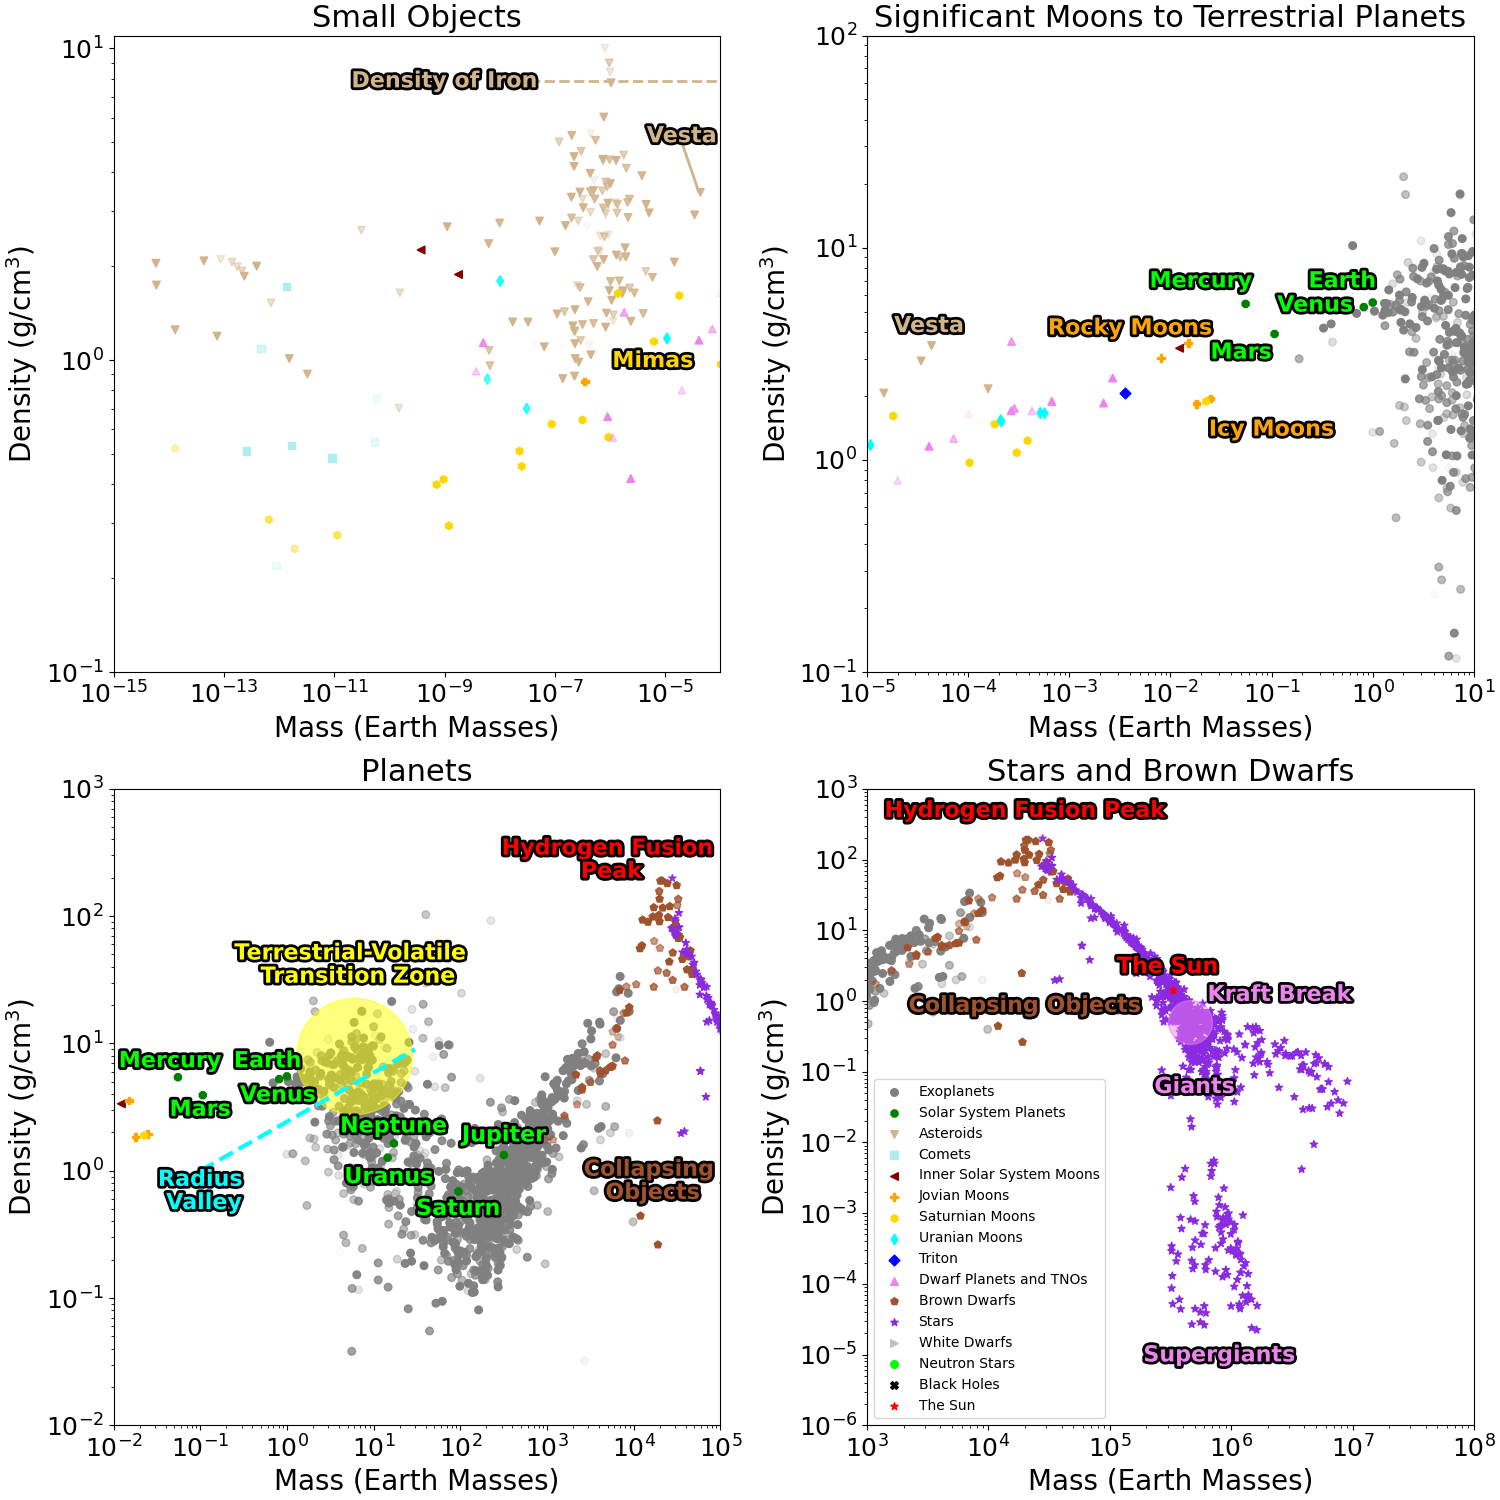

In [72]:
#Same as above, but white backgrounds.

# More Bulky Graphs
size = 30
# Set opacity values based on error. 
alpha = errI*0.
i = 0
maxErr = 0.5
minErr = 0.1
while (i < len(errI)):
    if (maxErr < errI[i]):
        alpha[i] = 0.
    elif (minErr > errI[i]):
        alpha[i] = 1.
    else:
        alpha[i] = ((maxErr - errI[i])/(maxErr - minErr))
        #Looks to scale correctly, at min-err goes to 1, at max-err goes to 0. Just gotta dile however desired.
    i=i+1

# sel=np.where((radiI*3)*err > radieI*3)
# sel=np.where(massI*err > masseI)

fig, axs = plt.subplots(2,2,figsize = (15,15), layout = "constrained") 
i = 0
j = 0

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xscale='log', yscale='log', xlim=[1e-15,1e-4], ylim=[1e-1,11])
axs[i][j].set_title('Small Objects', fontsize = 22)
axs[i][j].set_xlabel('Mass (Earth Masses)', fontsize = 20)
axs[i][j].set_ylabel('Density (g/cm$^3$)', fontsize = 20)
axs[i][j].tick_params(axis='both', labelsize=18)

tMimas = axs[i][j].text(6e-6,0.95,"Mimas",color='gold',fontweight='bold',ha='center',fontsize=16) 
tMimas.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
axs[i][j].plot(np.array([2e-5,4e-5]),np.array([5,3.5]),color='tan', linewidth=2) #density of iron.
tVesta = axs[i][j].text(2e-5,5,"Vesta",color='tan',fontweight='bold',ha='center',fontsize=16) 
tVesta.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
axs[i][j].plot(np.array([1e-8,1e-4]),np.array([7.87,7.87]),color='tan', linewidth=2, linestyle='dashed') #density of iron.
tIron= axs[i][j].text(1e-9,7.5,"Density of Iron",color='tan',fontweight='bold',ha='center',fontsize=16) 
tIron.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])

i=1
j=0

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xscale='log', yscale='log', xlim=[1e-2,1e5], ylim=[1e-2,1e3])
axs[i][j].set_title('Planets', fontsize = 22)
axs[i][j].set_xlabel('Mass (Earth Masses)', fontsize = 20)
axs[i][j].set_ylabel('Density (g/cm$^3$)', fontsize = 20)
axs[i][j].tick_params(axis='both', labelsize=18)

tMercury = axs[i][j].text(4.5e-2,6.5,"Mercury",color='lime',fontweight='bold',ha='center',fontsize=16) 
tMercury.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tVenus = axs[i][j].text(7.9e-1,3.5,"Venus",color='lime',fontweight='bold',ha='center',fontsize=16) 
tVenus.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tEarth = axs[i][j].text(0.6,6.5,"Earth",color='lime',fontweight='bold',ha='center',fontsize=16) 
tEarth.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tMars = axs[i][j].text(1e-1,2.7,"Mars",color='lime',fontweight='bold',ha='center',fontsize=16) 
tMars.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tJupiter = axs[i][j].text(3.2e2,1.7,"Jupiter",color='lime',fontweight='bold',ha='center',fontsize=16) 
tJupiter.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tSaturn = axs[i][j].text(9.5e1,0.45,"Saturn",color='lime',fontweight='bold',ha='center',fontsize=16) 
tSaturn.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tUranus = axs[i][j].text(1.5e1,0.8,"Uranus",color='lime',fontweight='bold',ha='center',fontsize=16) 
tUranus.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tNeptune = axs[i][j].text(1.7e1,2,"Neptune",color='lime',fontweight='bold',ha='center',fontsize=16) 
tNeptune.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tHydrogen = axs[i][j].text(5e3,200,"Hydrogen Fusion\n Peak",color='red',fontweight='bold',ha='center',fontsize=16) 
tHydrogen.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tColl = axs[i][j].text(1.5e4,0.6,"Collapsing\n Objects",color='sienna',fontweight='bold',ha='center',fontsize=16) 
tColl.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
axs[i][j].plot(np.array([0.1,30]),np.array([1,9]),color='cyan', linewidth=3, linestyle='dashed') #density of iron.
tIron= axs[i][j].text(0.1,0.5,"Radius\n Valley",color='cyan',fontweight='bold',ha='center',fontsize=16) 
tIron.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tTrans = axs[i][j].text(6,30,"Terrestrial-Volatile \n Transition Zone",color='yellow',fontweight='bold',ha='center',fontsize=16) 
tTrans.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
axs[i][j].scatter(6,8,color='yellow',s=7000,alpha=0.5)

i=1
j=1

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xscale='log', yscale='log', xlim=[1e3,1e8], ylim=[1e-6,1e3])
axs[i][j].set_title('Stars and Brown Dwarfs', fontsize = 22)
axs[i][j].set_xlabel('Mass (Earth Masses)', fontsize = 20)
axs[i][j].set_ylabel('Density (g/cm$^3$)', fontsize = 20)
axs[i][j].tick_params(axis='both', labelsize=18)

axs[i][j].legend(handles = [legend1,legend2,legend3,legend4,legend5,legend6,legend7,legend8,legend88,legend9,legend10,legend11,legend12,legend13,legend14,legend15])

tHydrogen = axs[i][j].text(2e4,400,"Hydrogen Fusion Peak",color='red',fontweight='bold',ha='center',fontsize=16) 
tHydrogen.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tColl = axs[i][j].text(2e4,0.7,"Collapsing Objects",color='sienna',fontweight='bold',ha='center',fontsize=16) 
tColl.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tGiants2 = axs[i][j].text(8e5,8e-6,"Supergiants",color='violet',fontweight='bold',ha='center',fontsize=16) 
tGiants2.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tGiants = axs[i][j].text(5e5,5e-2,"Giants",color='violet',fontweight='bold',ha='center',fontsize=16) 
tGiants.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tSun = axs[i][j].text(3e5,2.5,"The Sun",color='red',fontweight='bold',ha='center',fontsize=16) 
tSun.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tKraft = axs[i][j].text(2.5e6,1,"Kraft Break",color='violet',fontweight='bold',ha='center',fontsize=16) 
tKraft.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
axs[i][j].scatter(4.6e5,0.5,color='violet',s=1000,alpha=0.5)


i=0
j=1

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xscale='log', yscale='log', xlim=[1e-5,1e1], ylim=[1e-1,1e2])
axs[i][j].set_title('Significant Moons to Terrestrial Planets', fontsize = 22)
axs[i][j].set_xlabel('Mass (Earth Masses)', fontsize = 20)
axs[i][j].set_ylabel('Density (g/cm$^3$)', fontsize = 20)
axs[i][j].tick_params(axis='both', labelsize=18)

tVesta = axs[i][j].text(4.1e-5,4,"Vesta",color='tan',fontweight='bold',ha='center',fontsize=16) 
tVesta.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tMercury = axs[i][j].text(2e-2,6.5,"Mercury",color='lime',fontweight='bold',ha='center',fontsize=16) 
tMercury.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tVenus = axs[i][j].text(2.7e-1,5,"Venus",color='lime',fontweight='bold',ha='center',fontsize=16) 
tVenus.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tEarth = axs[i][j].text(0.5,6.5,"Earth",color='lime',fontweight='bold',ha='center',fontsize=16) 
tEarth.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tMars = axs[i][j].text(5e-2,3,"Mars",color='lime',fontweight='bold',ha='center',fontsize=16) 
tMars.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tRMoon = axs[i][j].text(4e-3,3.9,"Rocky Moons",color='orange',fontweight='bold',ha='center',fontsize=16) 
tRMoon.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tIMoon = axs[i][j].text(1e-1,1.3,"Icy Moons",color='orange',fontweight='bold',ha='center',fontsize=16) 
tIMoon.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])

plt.savefig("ZoomViewsWhiteAnnotatedBig.pdf", format="pdf")

plt.show()

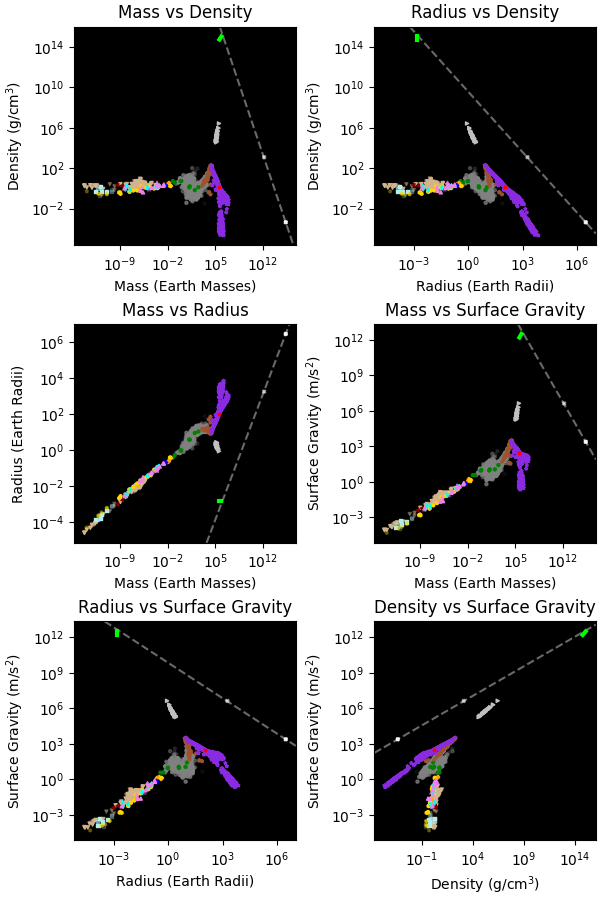

In [12]:
# More Bulky Graphs
size = 5
# Set opacity values based on error. 
alpha = errI*0.
i = 0
maxErr = 0.5
minErr = 0.1
while (i < len(errI)):
    if (maxErr < errI[i]):
        alpha[i] = 0.
    elif (minErr > errI[i]):
        alpha[i] = 1.
    else:
        alpha[i] = ((maxErr - errI[i])/(maxErr - minErr))
        #Looks to scale correctly, at min-err goes to 1, at max-err goes to 0. Just gotta dile however desired.
    i=i+1

# sel=np.where((radiI*3)*err > radieI*3)
# sel=np.where(massI*err > masseI)

fig, axs = plt.subplots(3,2,figsize = (6,9), layout = "constrained") 
i = 0
j = 0

# Mass Density Plot
axs[i][j].set_facecolor("black")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=3) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xlabel='Mass (Earth Masses)', ylabel='Density (g/cm$^3$)', 
           title = 'Mass vs Density', xscale='log', yscale='log')

i=1
j=0

# Mass Density Plot
axs[i][j].set_facecolor("black")
axs[i][j].scatter(massI[np.where(typeI == 5)],radiI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],radiI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],radiI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],radiI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],radiI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],radiI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],radiI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],radiI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],radiI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],radiI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],radiI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],radiI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],radiI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],radiI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhr[0]), slope=1 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],radiI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([10/re,10/re]),color='lime', linewidth=3) #Neutron Star Zone

axs[i][j].set(xlabel='Mass (Earth Masses)', ylabel='Radius (Earth Radii)', 
           title = 'Mass vs Radius', xscale='log', yscale='log')

i=1
j=1

# Mass Density Plot
axs[i][j].set_facecolor("black")
axs[i][j].scatter(massI[np.where(typeI == 5)],gI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],gI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],gI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],gI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],gI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],gI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],gI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],gI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],gI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],gI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],gI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],gI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],gI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],gI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],gI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhg[0]), slope=-1 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],gI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([6.67e-11*ms*1.17/10**2/1e6 ,6.67e-11*ms*2.35/10**2/1e6 ]),color='lime', linewidth=3) #Neutron Star Zone

axs[i][j].set(xlabel='Mass (Earth Masses)', ylabel='Surface Gravity (m/s$^2$)', 
           title = 'Mass vs Surface Gravity', xscale='log', yscale='log')

###BEEEEEEEEEEEEEEEEEP
#CONTINUE FROM HERE EDITOR!
#If you dno't know what this means that means Iforgot to remove this comment

i=0
j=1

# Mass Density Plot
axs[i][j].set_facecolor("black")
axs[i][j].scatter(radiI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(radiI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(radiI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(radiI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(radiI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(radiI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(radiI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(radiI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(radiI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(radiI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(radiI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(radiI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(radiI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(radiI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(radiI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhr[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(radiI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([10/re,10/re]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=3) #Neutron Star Zone

axs[i][j].set(xlabel='Radius (Earth Radii)', ylabel='Density (g/cm$^3$)', 
           title = 'Radius vs Density', xscale='log', yscale='log')

i=2
j=0

# Mass Density Plot
axs[i][j].set_facecolor("black")
axs[i][j].scatter(radiI[np.where(typeI == 5)],gI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(radiI[np.where(typeI == 1)],gI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(radiI[np.where(typeI == 2)],gI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(radiI[np.where(typeI == 4)],gI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(radiI[np.where(typeI == 6)],gI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(radiI[np.where(typeI == 7)],gI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(radiI[np.where(typeI == 10)],gI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(radiI[np.where(typeI == 14)],gI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(radiI[np.where(typeI == 8)],gI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(radiI[np.where(typeI == 13)],gI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(radiI[np.where(typeI == 3)],gI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(radiI[np.where(typeI == 11)],gI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(radiI[np.where(typeI == 15)],gI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(radiI[np.where(typeI == 9)],gI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(radiI[np.where(typeI == 0)],gI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhr[0],bhg[0]), slope=-1 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(radiI[np.where(typeI == 12)],gI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([10/re,10/re]),np.array([6.67e-11*ms*1.17/10**2/1e6 ,6.67e-11*ms*2.35/10**2/1e6 ]),color='lime', linewidth=3) #Neutron Star Zone

axs[i][j].set(xlabel='Radius (Earth Radii)', ylabel='Surface Gravity (m/s$^2$)', 
           title = 'Radius vs Surface Gravity', xscale='log', yscale='log')

i=2
j=1

# Mass Density Plot
axs[i][j].set_facecolor("black")
axs[i][j].scatter(densI[np.where(typeI == 5)],gI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(densI[np.where(typeI == 1)],gI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(densI[np.where(typeI == 2)],gI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(densI[np.where(typeI == 4)],gI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(densI[np.where(typeI == 6)],gI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(densI[np.where(typeI == 7)],gI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(densI[np.where(typeI == 10)],gI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(densI[np.where(typeI == 14)],gI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(densI[np.where(typeI == 8)],gI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(densI[np.where(typeI == 13)],gI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(densI[np.where(typeI == 3)],gI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(densI[np.where(typeI == 11)],gI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(densI[np.where(typeI == 15)],gI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(densI[np.where(typeI == 9)],gI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(densI[np.where(typeI == 0)],gI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhd[0],bhg[0]), slope=0.5 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(densI[np.where(typeI == 12)],gI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),np.array([6.67e-11*ms*1.17/10**2/1e6 ,6.67e-11*ms*2.35/10**2/1e6 ]),color='lime', linewidth=3) #Neutron Star Zone

axs[i][j].set(xlabel='Density (g/cm$^3$)', ylabel='Surface Gravity (m/s$^2$)', 
           title = 'Density vs Surface Gravity', xscale='log', yscale='log')

plt.savefig("AltVariableViews.pdf", format="pdf")

plt.show()

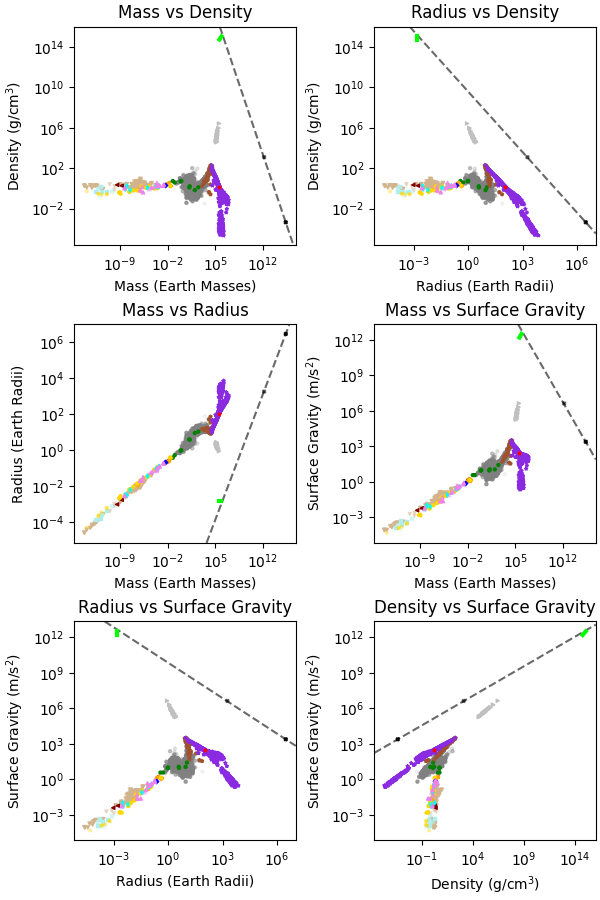

In [13]:
#Same as above cell, but WHITE background.

# More Bulky Graphs
size = 5
# Set opacity values based on error. 
alpha = errI*0.
i = 0
maxErr = 0.5
minErr = 0.1
while (i < len(errI)):
    if (maxErr < errI[i]):
        alpha[i] = 0.
    elif (minErr > errI[i]):
        alpha[i] = 1.
    else:
        alpha[i] = ((maxErr - errI[i])/(maxErr - minErr))
        #Looks to scale correctly, at min-err goes to 1, at max-err goes to 0. Just gotta dile however desired.
    i=i+1

# sel=np.where((radiI*3)*err > radieI*3)
# sel=np.where(massI*err > masseI)

fig, axs = plt.subplots(3,2,figsize = (6,9), layout = "constrained") 
i = 0
j = 0

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=3) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xlabel='Mass (Earth Masses)', ylabel='Density (g/cm$^3$)', 
           title = 'Mass vs Density', xscale='log', yscale='log')

i=1
j=0

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(massI[np.where(typeI == 5)],radiI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],radiI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],radiI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],radiI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],radiI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],radiI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],radiI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],radiI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],radiI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],radiI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],radiI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],radiI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],radiI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],radiI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhr[0]), slope=1 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],radiI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([10/re,10/re]),color='lime', linewidth=3) #Neutron Star Zone

axs[i][j].set(xlabel='Mass (Earth Masses)', ylabel='Radius (Earth Radii)', 
           title = 'Mass vs Radius', xscale='log', yscale='log')

i=1
j=1

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(massI[np.where(typeI == 5)],gI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],gI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],gI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],gI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],gI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],gI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],gI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],gI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],gI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],gI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],gI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],gI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],gI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],gI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],gI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhg[0]), slope=-1 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],gI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([6.67e-11*ms*1.17/10**2/1e6 ,6.67e-11*ms*2.35/10**2/1e6 ]),color='lime', linewidth=3) #Neutron Star Zone

axs[i][j].set(xlabel='Mass (Earth Masses)', ylabel='Surface Gravity (m/s$^2$)', 
           title = 'Mass vs Surface Gravity', xscale='log', yscale='log')

###BEEEEEEEEEEEEEEEEEP
#CONTINUE FROM HERE EDITOR!
#If you dno't know what this means that means Iforgot to remove this comment

i=0
j=1

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(radiI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(radiI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(radiI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(radiI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(radiI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(radiI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(radiI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(radiI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(radiI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(radiI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(radiI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(radiI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(radiI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(radiI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(radiI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhr[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(radiI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([10/re,10/re]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=3) #Neutron Star Zone

axs[i][j].set(xlabel='Radius (Earth Radii)', ylabel='Density (g/cm$^3$)', 
           title = 'Radius vs Density', xscale='log', yscale='log')

i=2
j=0

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(radiI[np.where(typeI == 5)],gI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(radiI[np.where(typeI == 1)],gI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(radiI[np.where(typeI == 2)],gI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(radiI[np.where(typeI == 4)],gI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(radiI[np.where(typeI == 6)],gI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(radiI[np.where(typeI == 7)],gI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(radiI[np.where(typeI == 10)],gI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(radiI[np.where(typeI == 14)],gI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(radiI[np.where(typeI == 8)],gI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(radiI[np.where(typeI == 13)],gI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(radiI[np.where(typeI == 3)],gI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(radiI[np.where(typeI == 11)],gI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(radiI[np.where(typeI == 15)],gI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(radiI[np.where(typeI == 9)],gI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(radiI[np.where(typeI == 0)],gI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhr[0],bhg[0]), slope=-1 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(radiI[np.where(typeI == 12)],gI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([10/re,10/re]),np.array([6.67e-11*ms*1.17/10**2/1e6 ,6.67e-11*ms*2.35/10**2/1e6 ]),color='lime', linewidth=3) #Neutron Star Zone

axs[i][j].set(xlabel='Radius (Earth Radii)', ylabel='Surface Gravity (m/s$^2$)', 
           title = 'Radius vs Surface Gravity', xscale='log', yscale='log')

i=2
j=1

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(densI[np.where(typeI == 5)],gI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(densI[np.where(typeI == 1)],gI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(densI[np.where(typeI == 2)],gI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(densI[np.where(typeI == 4)],gI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(densI[np.where(typeI == 6)],gI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(densI[np.where(typeI == 7)],gI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(densI[np.where(typeI == 10)],gI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(densI[np.where(typeI == 14)],gI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(densI[np.where(typeI == 8)],gI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(densI[np.where(typeI == 13)],gI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(densI[np.where(typeI == 3)],gI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(densI[np.where(typeI == 11)],gI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(densI[np.where(typeI == 15)],gI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(densI[np.where(typeI == 9)],gI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(densI[np.where(typeI == 0)],gI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhd[0],bhg[0]), slope=0.5 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(densI[np.where(typeI == 12)],gI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),np.array([6.67e-11*ms*1.17/10**2/1e6 ,6.67e-11*ms*2.35/10**2/1e6 ]),color='lime', linewidth=3) #Neutron Star Zone

axs[i][j].set(xlabel='Density (g/cm$^3$)', ylabel='Surface Gravity (m/s$^2$)', 
           title = 'Density vs Surface Gravity', xscale='log', yscale='log')

plt.savefig("AltVariableViewsWhite.pdf", format="pdf")

plt.show()

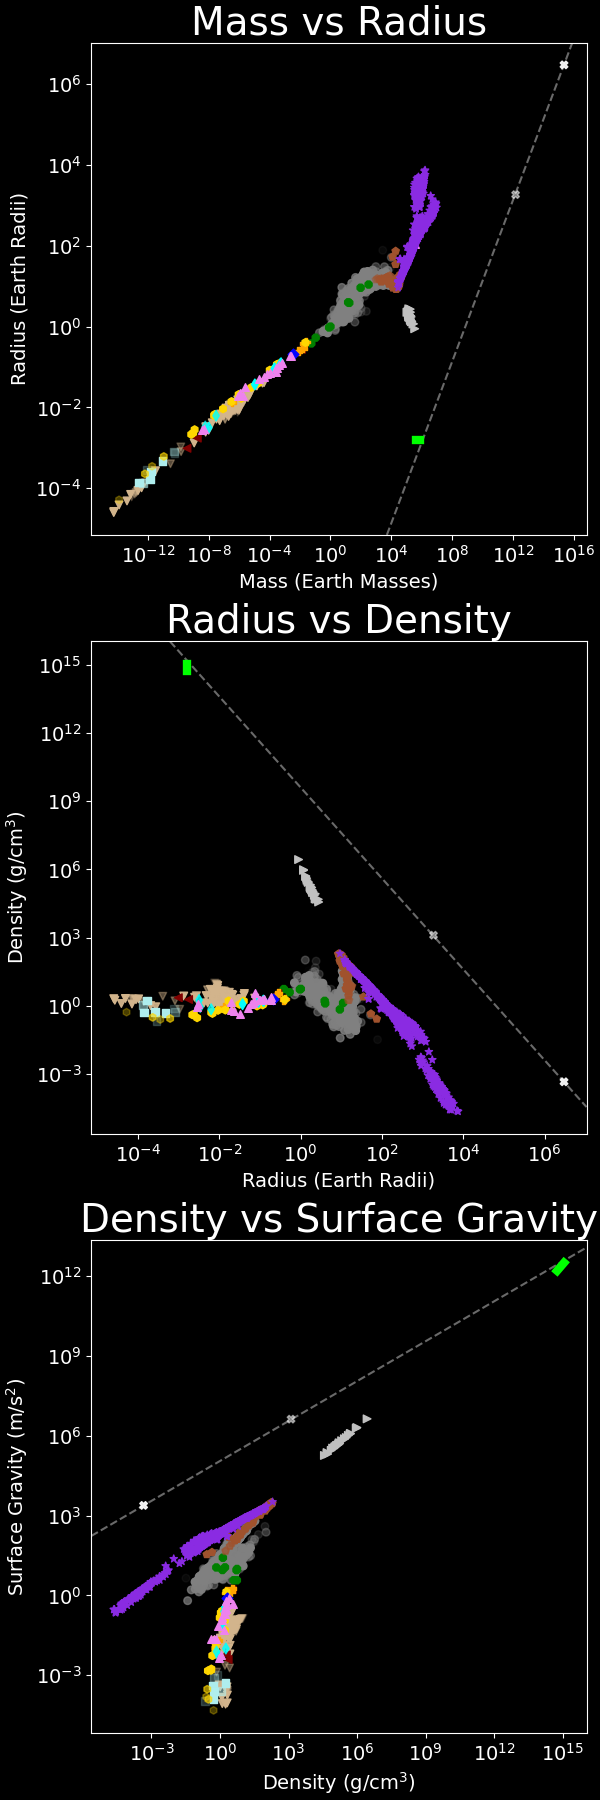

In [9]:
# More Bulky Graphs
size = 30
# Set opacity values based on error. 
alpha = errI*0.
i = 0
maxErr = 0.5
minErr = 0.1
while (i < len(errI)):
    if (maxErr < errI[i]):
        alpha[i] = 0.
    elif (minErr > errI[i]):
        alpha[i] = 1.
    else:
        alpha[i] = ((maxErr - errI[i])/(maxErr - minErr))
        #Looks to scale correctly, at min-err goes to 1, at max-err goes to 0. Just gotta dile however desired.
    i=i+1

# sel=np.where((radiI*3)*err > radieI*3)
# sel=np.where(massI*err > masseI)

fig, axs = plt.subplots(3,1,figsize = (6,18), layout = "constrained", facecolor='black') 
i = 0
j = 0

axs[i].set_facecolor("black")
axs[i].tick_params(color='white')
axs[i].xaxis.label.set_color('white')
axs[i].yaxis.label.set_color('white')
axs[i].tick_params(colors='white')
axs[i].spines['bottom'].set_color('white')
axs[i].spines['top'].set_color('white')
axs[i].spines['left'].set_color('white')
axs[i].spines['right'].set_color('white')
axs[i].scatter(massI[np.where(typeI == 5)],radiI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i].scatter(massI[np.where(typeI == 1)],radiI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i].scatter(massI[np.where(typeI == 2)],radiI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i].scatter(massI[np.where(typeI == 4)],radiI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i].scatter(massI[np.where(typeI == 6)],radiI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i].scatter(massI[np.where(typeI == 7)],radiI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i].scatter(massI[np.where(typeI == 10)],radiI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i].scatter(massI[np.where(typeI == 14)],radiI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i].scatter(massI[np.where(typeI == 8)],radiI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i].scatter(massI[np.where(typeI == 9)],radiI[np.where(typeI == 9)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 9)],marker="^")
axs[i].scatter(massI[np.where(typeI == 13)],radiI[np.where(typeI == 13)],color='violet', s=size,marker="^")
axs[i].scatter(massI[np.where(typeI == 3)],radiI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i].scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i].scatter(massI[np.where(typeI == 15)],radiI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i].scatter(massI[np.where(typeI == 0)],radiI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i].axline((bhm[0],bhr[0]), slope=1 ,color='dimgray', ls="dashed")#Black Holes
axs[i].scatter(massI[np.where(typeI == 12)],radiI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([10/re,10/re]),color='lime', linewidth=6) #Neutron Star Zone

axs[i].set(xlabel='Mass (Earth Masses)', ylabel='Radius (Earth Radii)', 
           title = 'Mass vs Radius', xscale='log', yscale='log')
axs[i].set_title('Mass vs Radius', color='white', fontsize = 28)
axs[i].set_xlabel('Mass (Earth Masses)', fontsize = 14)
axs[i].set_ylabel('Radius (Earth Radii)',fontsize = 14)
axs[i].tick_params(axis = 'both', labelsize = 14)

i=1
j=0

axs[i].set_facecolor("black")
axs[i].tick_params(color='white')
axs[i].xaxis.label.set_color('white')
axs[i].yaxis.label.set_color('white')
axs[i].tick_params(colors='white')
axs[i].spines['bottom'].set_color('white')
axs[i].spines['top'].set_color('white')
axs[i].spines['left'].set_color('white')
axs[i].spines['right'].set_color('white')
axs[i].scatter(radiI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i].scatter(radiI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i].scatter(radiI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i].scatter(radiI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i].scatter(radiI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i].scatter(radiI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i].scatter(radiI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i].scatter(radiI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i].scatter(radiI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i].scatter(radiI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 9)],marker="^")
axs[i].scatter(radiI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size,marker="^")
axs[i].scatter(radiI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i].scatter(radiI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i].scatter(radiI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i].scatter(radiI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i].axline((bhr[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i].scatter(radiI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i].plot(np.array([10/re,10/re]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone

axs[i].set(xlabel='Radius (Earth Radii)', ylabel='Density (g/cm$^3$)', 
           title = 'Radius vs Density', xscale='log', yscale='log')
axs[i].set_title('Radius vs Density', color='white', fontsize = 28)
axs[i].set_xlabel('Radius (Earth Radii)', fontsize = 14)
axs[i].set_ylabel('Density (g/cm$^3$)',fontsize = 14)
axs[i].tick_params(axis = 'both', labelsize = 14)

i=2
j=0

axs[i].set_facecolor("black")
axs[i].tick_params(color='white')
axs[i].xaxis.label.set_color('white')
axs[i].yaxis.label.set_color('white')
axs[i].tick_params(colors='white')
axs[i].spines['bottom'].set_color('white')
axs[i].spines['top'].set_color('white')
axs[i].spines['left'].set_color('white')
axs[i].spines['right'].set_color('white')
axs[i].scatter(densI[np.where(typeI == 5)],gI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i].scatter(densI[np.where(typeI == 1)],gI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i].scatter(densI[np.where(typeI == 2)],gI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i].scatter(densI[np.where(typeI == 4)],gI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i].scatter(densI[np.where(typeI == 6)],gI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i].scatter(densI[np.where(typeI == 7)],gI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i].scatter(densI[np.where(typeI == 10)],gI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i].scatter(densI[np.where(typeI == 14)],gI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i].scatter(densI[np.where(typeI == 8)],gI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i].scatter(densI[np.where(typeI == 9)],gI[np.where(typeI == 9)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 9)],marker="^")
axs[i].scatter(densI[np.where(typeI == 13)],gI[np.where(typeI == 13)],color='violet', s=size,marker="^")
axs[i].scatter(densI[np.where(typeI == 3)],gI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i].scatter(densI[np.where(typeI == 11)],gI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i].scatter(densI[np.where(typeI == 15)],gI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i].scatter(densI[np.where(typeI == 0)],gI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i].axline((bhd[0],bhg[0]), slope=0.5 ,color='dimgray', ls="dashed")#Black Holes
axs[i].scatter(densI[np.where(typeI == 12)],gI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i].plot(np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),np.array([6.67e-11*ms*1.17/10**2/1e6 ,6.67e-11*ms*2.35/10**2/1e6 ]),color='lime', linewidth=6) #Neutron Star Zone

axs[i].set(xlabel='Density (g/cm$^3$)', ylabel='Surface Gravity (m/s$^2$)', 
           title = 'Density vs Surface Gravity', xscale='log', yscale='log')
axs[i].set_title('Density vs Surface Gravity', color='white', fontsize = 28)
axs[i].set_xlabel('Density (g/cm$^3$)', fontsize = 14)
axs[i].set_ylabel('Surface Gravity (m/s$^2$)',fontsize = 14)
axs[i].tick_params(axis = 'both', labelsize = 14)

plt.savefig("ThreePlots.pdf", format="pdf")

plt.show()

NameError: name 'tempI' is not defined

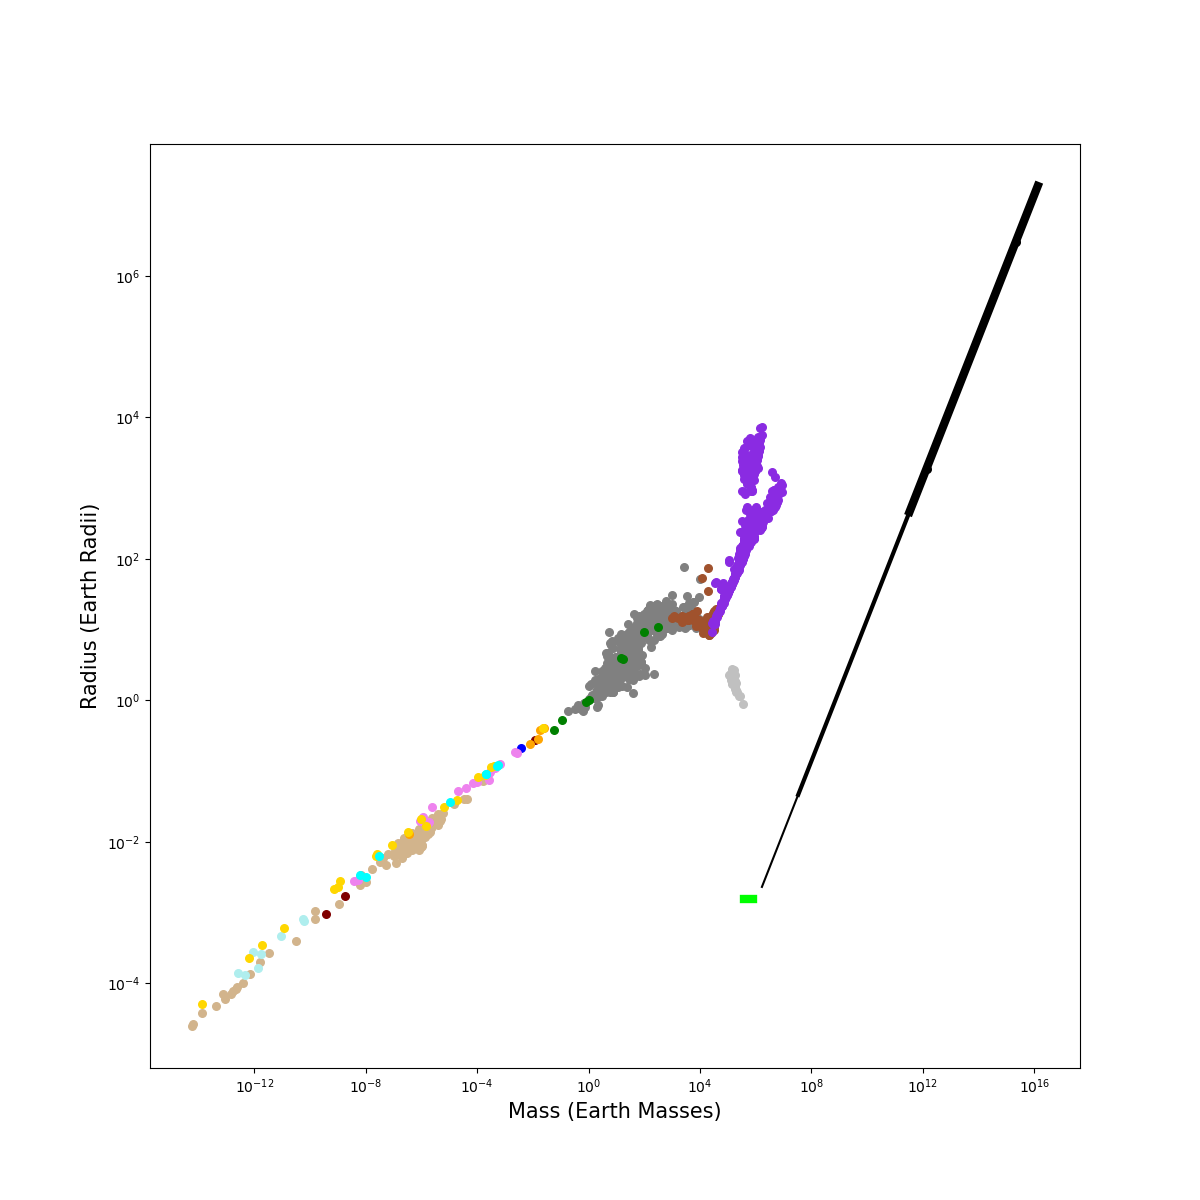

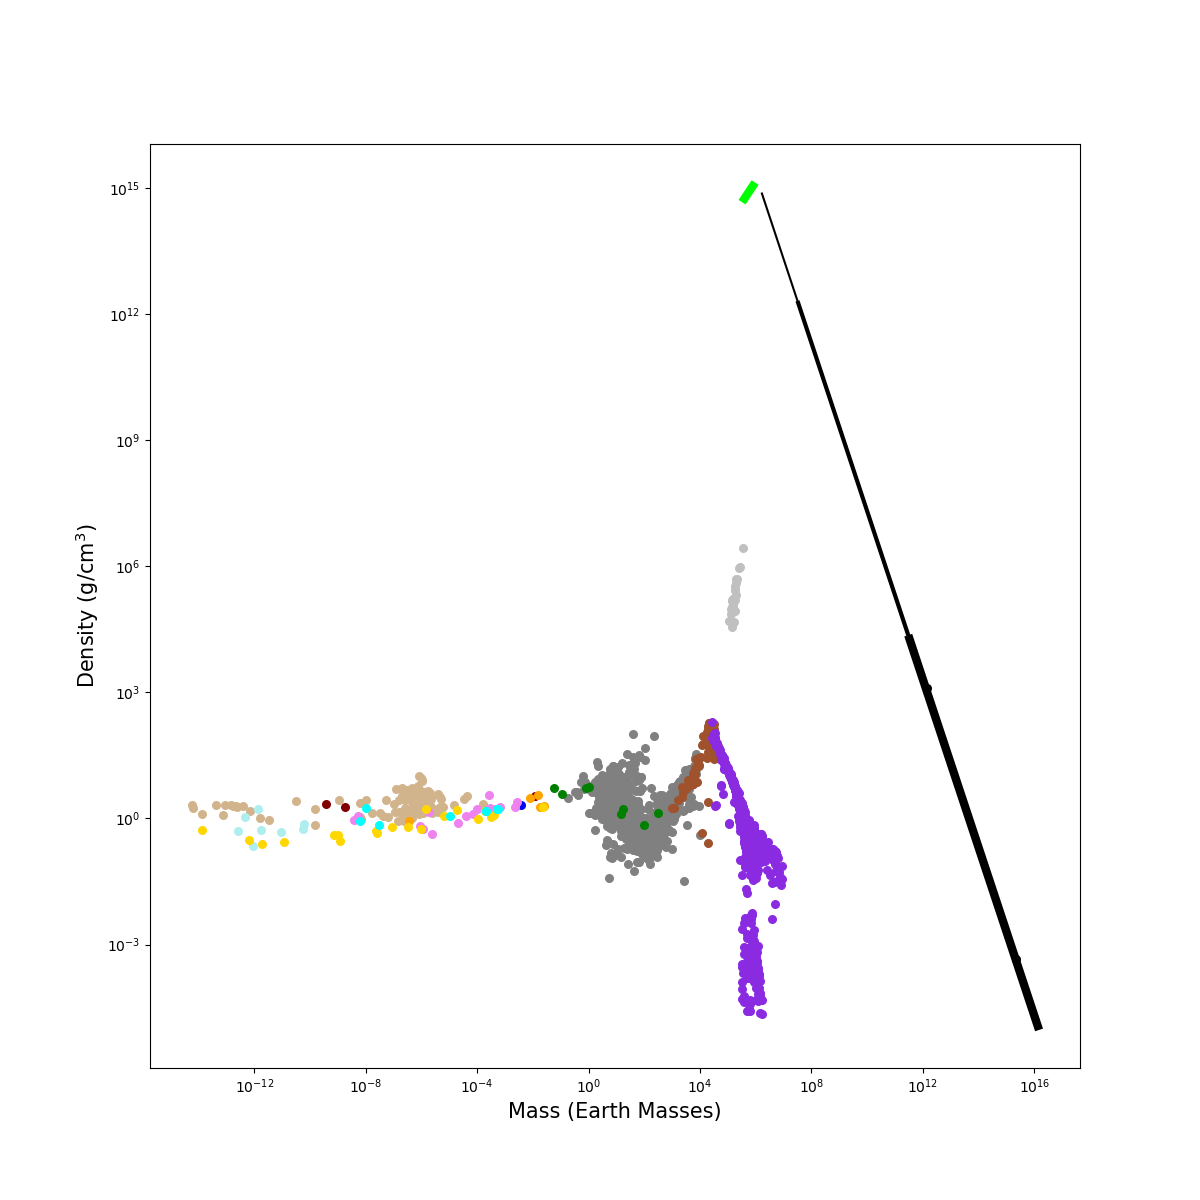

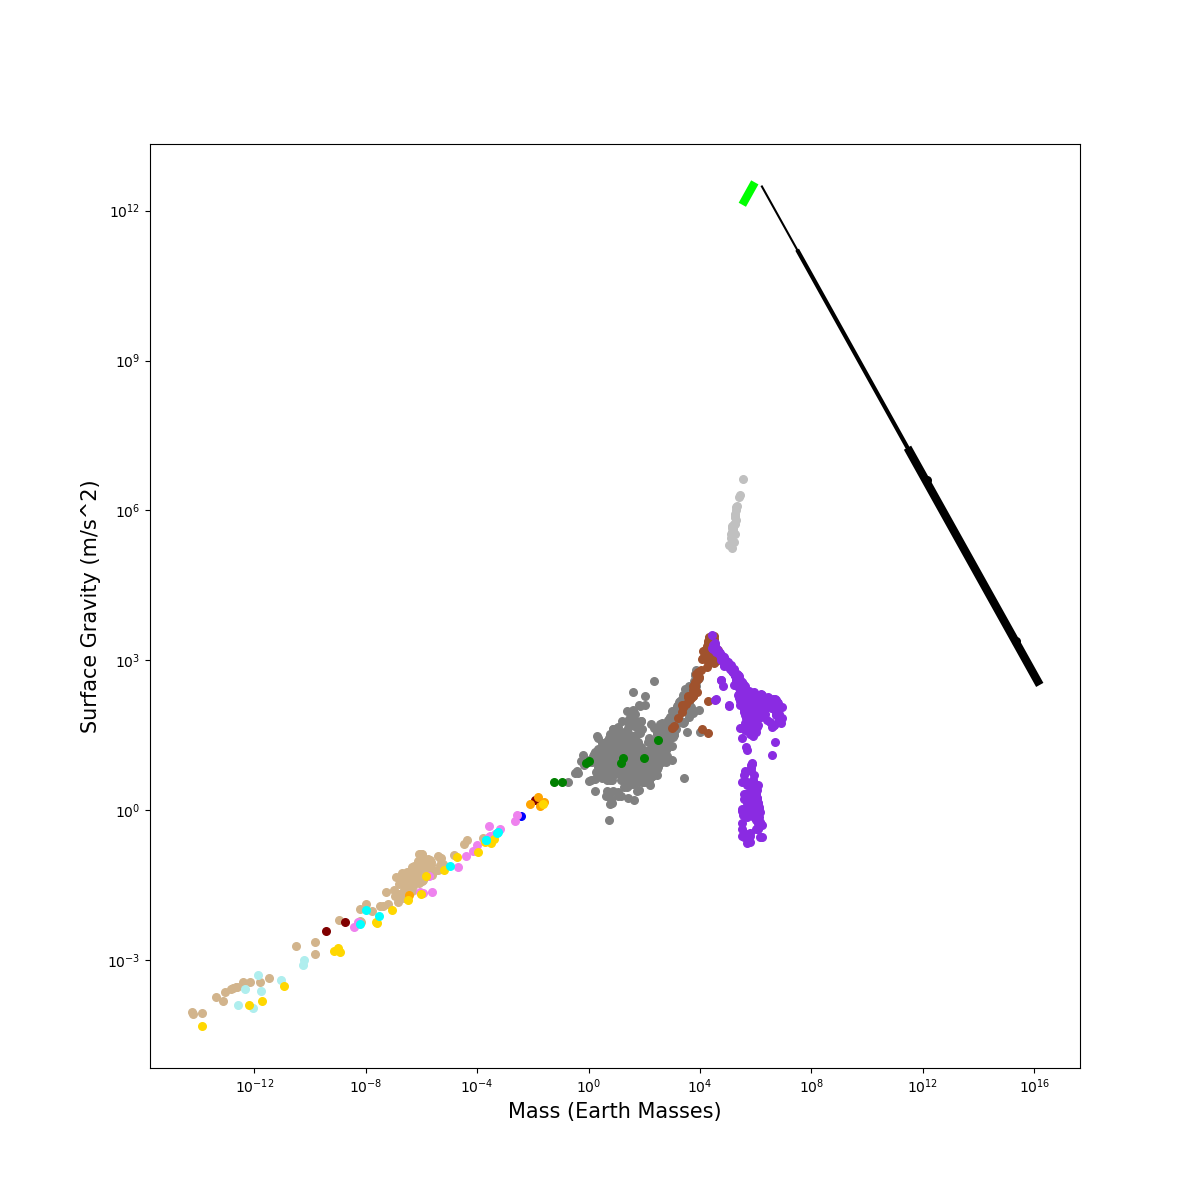

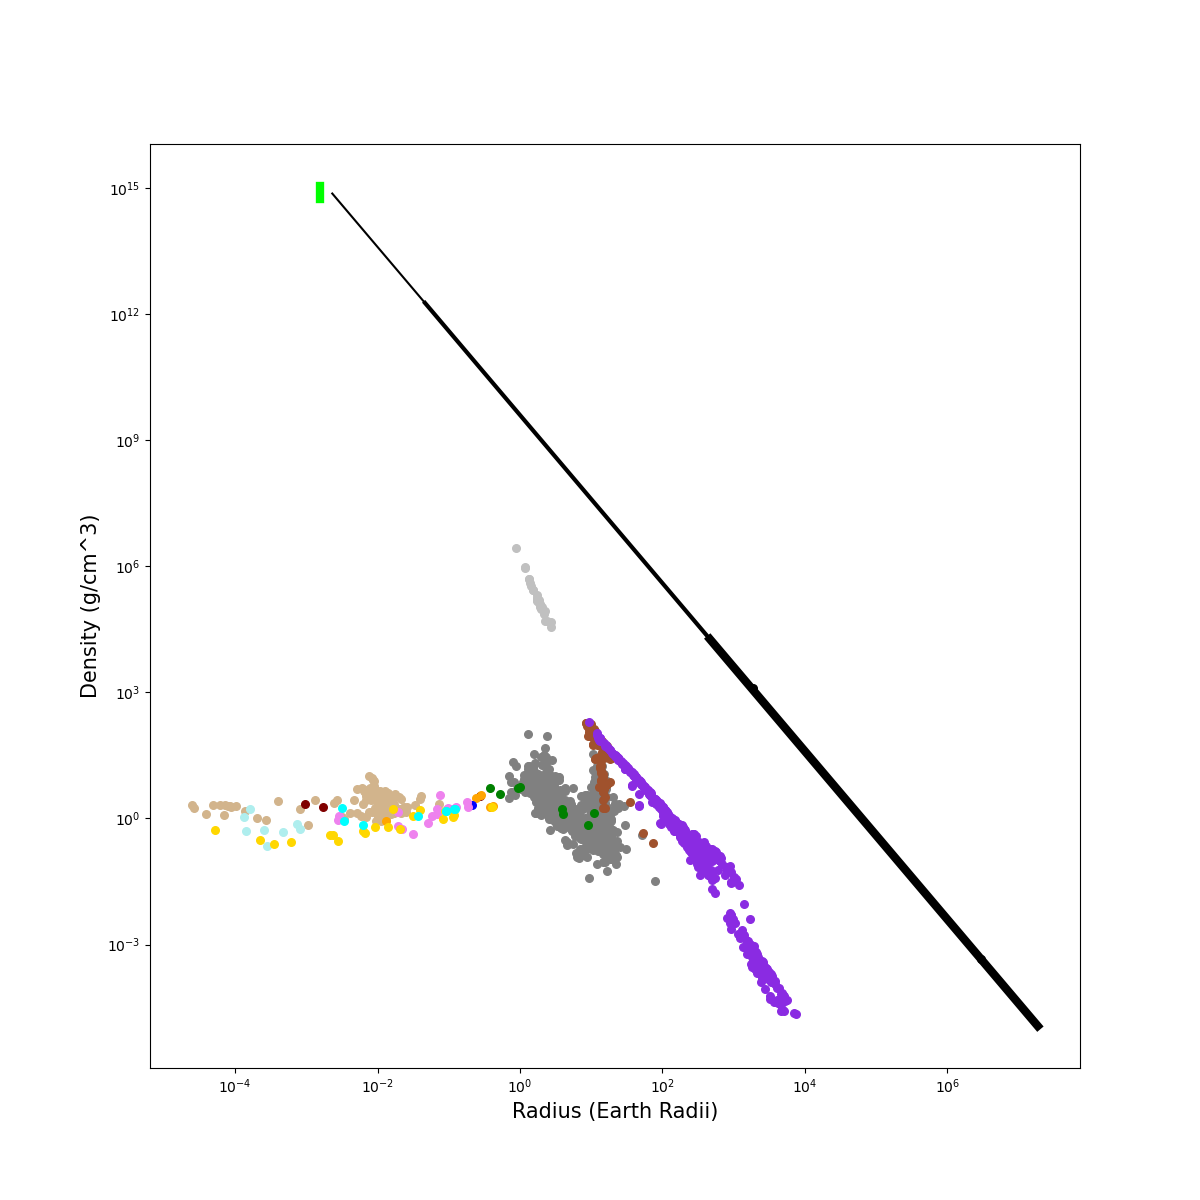

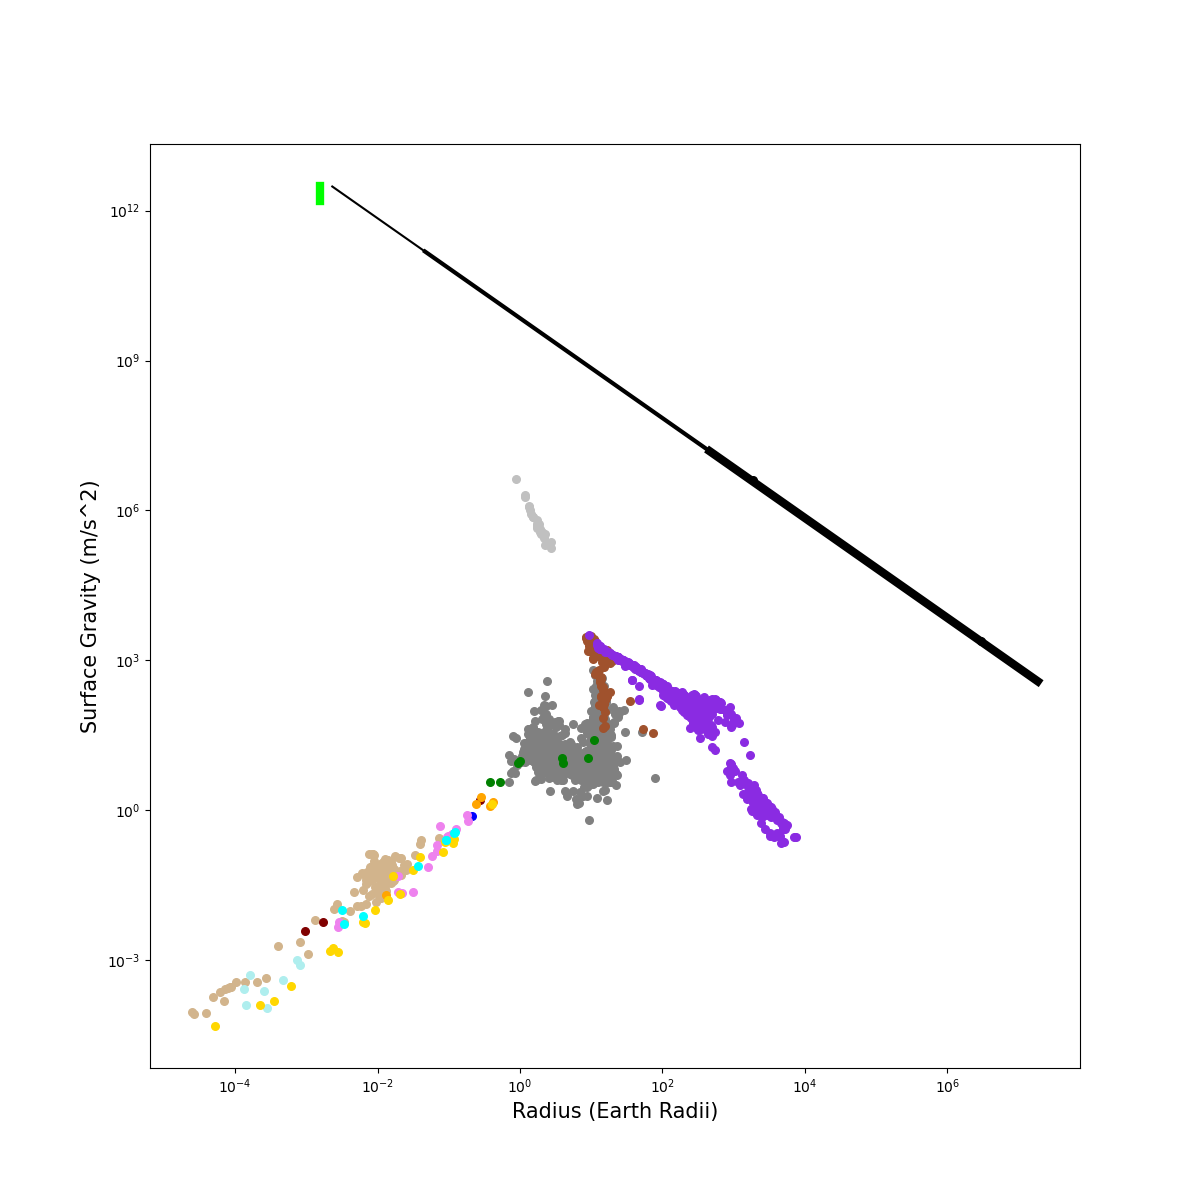

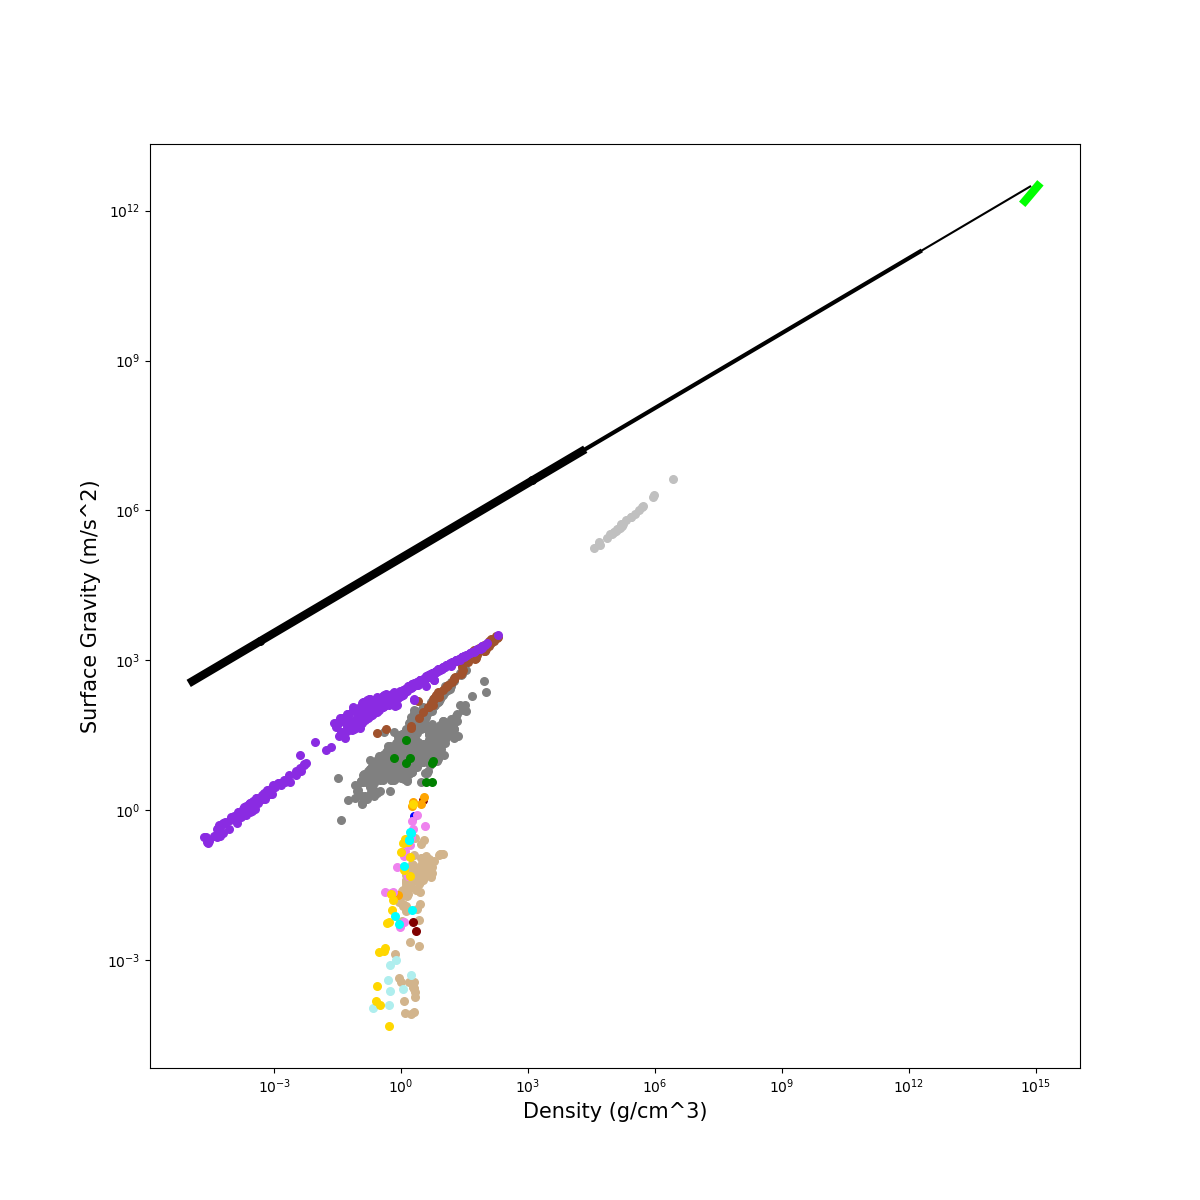

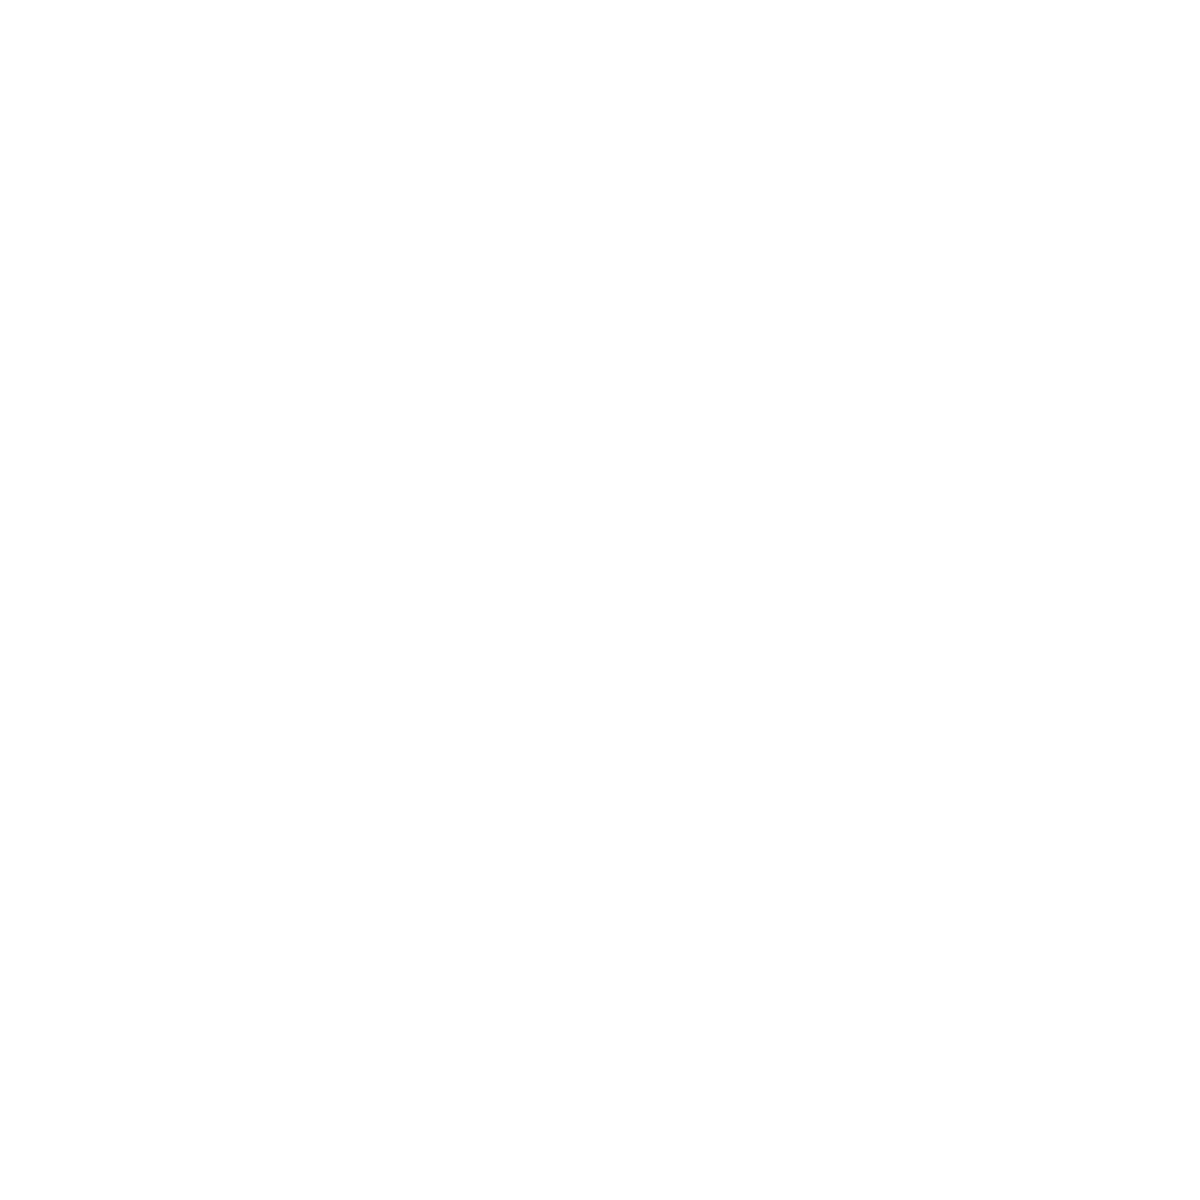

In [10]:
# More Bulky Graphs
size = 30

plt.figure(figsize=(12,12))

#Color based on type. Mass Radius.
plt.scatter(massI[np.where(typeI == 5)],radiI[np.where(typeI == 5)],color='gray', s=size)
plt.scatter(massI[np.where(typeI == 1)],radiI[np.where(typeI == 1)],color='green', s=size)
plt.scatter(massI[np.where(typeI == 2)],radiI[np.where(typeI == 2)],color='tan', s=size)
plt.scatter(massI[np.where(typeI == 3)],radiI[np.where(typeI == 3)],color='sienna', s=size)
plt.scatter(massI[np.where(typeI == 4)],radiI[np.where(typeI == 4)],color='paleturquoise', s=size)
plt.scatter(massI[np.where(typeI == 6)],radiI[np.where(typeI == 6)],color='maroon', s=size)
plt.scatter(massI[np.where(typeI == 7)],radiI[np.where(typeI == 7)],color='orange', s=size)
plt.scatter(massI[np.where(typeI == 8)],radiI[np.where(typeI == 8)],color='blue', s=size)
plt.scatter(massI[np.where(typeI == 9)],radiI[np.where(typeI == 9)],color='violet', s=size)
plt.scatter(massI[np.where(typeI == 13)],radiI[np.where(typeI == 13)],color='violet', s=size)
plt.scatter(massI[np.where(typeI == 10)],radiI[np.where(typeI == 10)],color='gold', s=size)
plt.scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],color='blueviolet', s=size)
#plt.scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],
            #c=tempI[np.where(typeI == 11)],cmap='RdBu',vmin=2000,vmax=20000, s=60)
plt.scatter(massI[np.where(typeI == 12)],radiI[np.where(typeI == 12)],color='black', s=size)
plt.scatter(massI[np.where(typeI == 14)],radiI[np.where(typeI == 14)],color='cyan', s=size)
plt.scatter(massI[np.where(typeI == 15)],radiI[np.where(typeI == 15)],color='silver', s=size)
plt.scatter(massI[np.where(typeI == 0)],radiI[np.where(typeI == 0)],color='pink', s=size)
plt.plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([10/re,10/re]),color='lime', linewidth=6) #Neutron Star Zone
plt.plot(bhm[0:], bhr[0:], color='black') #Stellar Black Holes
plt.plot(bhm[3:], bhr[3:], color='black', linewidth=3) #Intermediate Black Holes
plt.plot(bhm[11:], bhr[11:], color='black', linewidth=6) #Supermassive Black Holes

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Mass (Earth Masses)', size=15)
plt.ylabel('Radius (Earth Radii)', size=15)
plt.show

# Mass Density Plot
plt.figure(figsize=(12,12))
plt.scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size)
plt.scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size)
plt.scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size)
plt.scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size)
plt.scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size)
plt.scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size)
plt.scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size)
plt.scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size)
plt.scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='violet', s=size)
plt.scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size)
plt.scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size)
plt.scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size)
#plt.scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],
            #c=tempI[np.where(typeI == 11)],cmap='RdBu',vmin=2000,vmax=20000, s=60)
plt.scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size)
plt.scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size)
plt.scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size)
plt.scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='pink', s=size)
plt.plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
plt.plot(bhm[0:], bhd[0:], color='black') #Stellar Black Holes
plt.plot(bhm[3:], bhd[3:], color='black', linewidth=3) #Intermediate Black Holes
plt.plot(bhm[11:], bhd[11:], color='black', linewidth=6) #Supermassive Black Holes
#plt.ylim([0.1,10])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Mass (Earth Masses)', size=15)
plt.ylabel('Density (g/cm$^3$)', size=15)
plt.show

# Mass Gravity Plot
plt.figure(figsize=(12,12))
plt.scatter(massI[np.where(typeI == 5)],gI[np.where(typeI == 5)],color='gray', s=size)
plt.scatter(massI[np.where(typeI == 1)],gI[np.where(typeI == 1)],color='green', s=size)
plt.scatter(massI[np.where(typeI == 2)],gI[np.where(typeI == 2)],color='tan', s=size)
plt.scatter(massI[np.where(typeI == 3)],gI[np.where(typeI == 3)],color='sienna', s=size)
plt.scatter(massI[np.where(typeI == 4)],gI[np.where(typeI == 4)],color='paleturquoise', s=size)
plt.scatter(massI[np.where(typeI == 6)],gI[np.where(typeI == 6)],color='maroon', s=size)
plt.scatter(massI[np.where(typeI == 7)],gI[np.where(typeI == 7)],color='orange', s=size)
plt.scatter(massI[np.where(typeI == 8)],gI[np.where(typeI == 8)],color='blue', s=size)
plt.scatter(massI[np.where(typeI == 9)],gI[np.where(typeI == 9)],color='violet', s=size)
plt.scatter(massI[np.where(typeI == 13)],gI[np.where(typeI == 13)],color='violet', s=size)
plt.scatter(massI[np.where(typeI == 10)],gI[np.where(typeI == 10)],color='gold', s=size)
plt.scatter(massI[np.where(typeI == 11)],gI[np.where(typeI == 11)],color='blueviolet', s=size)
#plt.scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],
            #c=tempI[np.where(typeI == 11)],cmap='RdBu',vmin=2000,vmax=20000, s=60)
plt.scatter(massI[np.where(typeI == 12)],gI[np.where(typeI == 12)],color='black', s=size)
plt.scatter(massI[np.where(typeI == 14)],gI[np.where(typeI == 14)],color='cyan', s=size)
plt.scatter(massI[np.where(typeI == 15)],gI[np.where(typeI == 15)],color='silver', s=size)
plt.scatter(massI[np.where(typeI == 0)],gI[np.where(typeI == 0)],color='pink', s=size)
plt.plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([6.67e-11*ms*1.17/10**2/1e6 ,6.67e-11*ms*2.35/10**2/1e6 ]),color='lime', linewidth=6) #Neutron Star Zone
plt.plot(bhm[0:], bhg[0:], color='black') #Stellar Black Holes
plt.plot(bhm[3:], bhg[3:], color='black', linewidth=3) #Intermediate Black Holes
plt.plot(bhm[11:], bhg[11:], color='black', linewidth=6) #Supermassive Black Holes

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Mass (Earth Masses)', size=15)
plt.ylabel('Surface Gravity (m/s^2)', size=15)
plt.show

#Radius Density plot
plt.figure(figsize=(12,12))
plt.scatter(radiI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size)
plt.scatter(radiI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size)
plt.scatter(radiI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size)
plt.scatter(radiI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size)
plt.scatter(radiI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size)
plt.scatter(radiI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size)
plt.scatter(radiI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size)
plt.scatter(radiI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size)
plt.scatter(radiI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='violet', s=size)
plt.scatter(radiI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size)
plt.scatter(radiI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size)
plt.scatter(radiI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size)
#plt.scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],
            #c=tempI[np.where(typeI == 11)],cmap='RdBu',vmin=2000,vmax=20000, s=60)
plt.scatter(radiI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size)
plt.scatter(radiI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size)
plt.scatter(radiI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size)
plt.scatter(radiI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='pink', s=size)
plt.plot(np.array([10/re,10/re]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
plt.plot(bhr[0:], bhd[0:], color='black') #Stellar Black Holes
plt.plot(bhr[3:], bhd[3:], color='black', linewidth=3) #Intermediate Black Holes
plt.plot(bhr[11:], bhd[11:], color='black', linewidth=6) #Supermassive Black Holes

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Radius (Earth Radii)', size=15)
plt.ylabel('Density (g/cm^3)', size=15)
plt.show

#Radius Gravity plot
plt.figure(figsize=(12,12))
plt.scatter(radiI[np.where(typeI == 5)],gI[np.where(typeI == 5)],color='gray', s=size)
plt.scatter(radiI[np.where(typeI == 1)],gI[np.where(typeI == 1)],color='green', s=size)
plt.scatter(radiI[np.where(typeI == 2)],gI[np.where(typeI == 2)],color='tan', s=size)
plt.scatter(radiI[np.where(typeI == 3)],gI[np.where(typeI == 3)],color='sienna', s=size)
plt.scatter(radiI[np.where(typeI == 4)],gI[np.where(typeI == 4)],color='paleturquoise', s=size)
plt.scatter(radiI[np.where(typeI == 6)],gI[np.where(typeI == 6)],color='maroon', s=size)
plt.scatter(radiI[np.where(typeI == 7)],gI[np.where(typeI == 7)],color='orange', s=size)
plt.scatter(radiI[np.where(typeI == 8)],gI[np.where(typeI == 8)],color='blue', s=size)
plt.scatter(radiI[np.where(typeI == 9)],gI[np.where(typeI == 9)],color='violet', s=size)
plt.scatter(radiI[np.where(typeI == 13)],gI[np.where(typeI == 13)],color='violet', s=size)
plt.scatter(radiI[np.where(typeI == 10)],gI[np.where(typeI == 10)],color='gold', s=size)
plt.scatter(radiI[np.where(typeI == 11)],gI[np.where(typeI == 11)],color='blueviolet', s=size)
#plt.scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],
            #c=tempI[np.where(typeI == 11)],cmap='RdBu',vmin=2000,vmax=20000, s=60)
plt.scatter(radiI[np.where(typeI == 12)],gI[np.where(typeI == 12)],color='black', s=size)
plt.scatter(radiI[np.where(typeI == 14)],gI[np.where(typeI == 14)],color='cyan', s=size)
plt.scatter(radiI[np.where(typeI == 15)],gI[np.where(typeI == 15)],color='silver', s=size)
plt.scatter(radiI[np.where(typeI == 0)],gI[np.where(typeI == 0)],color='pink', s=size)
plt.plot(np.array([10/re,10/re]),np.array([6.67e-11*ms*1.17/10**2/1e6 ,6.67e-11*ms*2.35/10**2/1e6 ]),color='lime', linewidth=6) #Neutron Star Zone
plt.plot(bhr[0:], bhg[0:], color='black') #Stellar Black Holes
plt.plot(bhr[3:], bhg[3:], color='black', linewidth=3) #Intermediate Black Holes
plt.plot(bhr[11:], bhg[11:], color='black', linewidth=6) #Supermassive Black Holes

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Radius (Earth Radii)', size=15)
plt.ylabel('Surface Gravity (m/s^2)', size=15)
plt.show

#Density Gravity plot
plt.figure(figsize=(12,12))
plt.scatter(densI[np.where(typeI == 5)],gI[np.where(typeI == 5)],color='gray', s=size)
plt.scatter(densI[np.where(typeI == 1)],gI[np.where(typeI == 1)],color='green', s=size)
plt.scatter(densI[np.where(typeI == 2)],gI[np.where(typeI == 2)],color='tan', s=size)
plt.scatter(densI[np.where(typeI == 3)],gI[np.where(typeI == 3)],color='sienna', s=size)
plt.scatter(densI[np.where(typeI == 4)],gI[np.where(typeI == 4)],color='paleturquoise', s=size)
plt.scatter(densI[np.where(typeI == 6)],gI[np.where(typeI == 6)],color='maroon', s=size)
plt.scatter(densI[np.where(typeI == 7)],gI[np.where(typeI == 7)],color='orange', s=size)
plt.scatter(densI[np.where(typeI == 8)],gI[np.where(typeI == 8)],color='blue', s=size)
plt.scatter(densI[np.where(typeI == 9)],gI[np.where(typeI == 9)],color='violet', s=size)
plt.scatter(densI[np.where(typeI == 13)],gI[np.where(typeI == 13)],color='violet', s=size)
plt.scatter(densI[np.where(typeI == 10)],gI[np.where(typeI == 10)],color='gold', s=size)
plt.scatter(densI[np.where(typeI == 11)],gI[np.where(typeI == 11)],color='blueviolet', s=size)
#plt.scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],
            #c=tempI[np.where(typeI == 11)],cmap='RdBu',vmin=2000,vmax=20000, s=60)
plt.scatter(densI[np.where(typeI == 12)],gI[np.where(typeI == 12)],color='black', s=size)
plt.scatter(densI[np.where(typeI == 14)],gI[np.where(typeI == 14)],color='cyan', s=size)
plt.scatter(densI[np.where(typeI == 15)],gI[np.where(typeI == 15)],color='silver', s=size)
plt.scatter(densI[np.where(typeI == 0)],gI[np.where(typeI == 0)],color='pink', s=size)
plt.plot(np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),np.array([6.67e-11*ms*1.17/10**2/1e6 ,6.67e-11*ms*2.35/10**2/1e6 ]),color='lime', linewidth=6) #Neutron Star Zone
plt.plot(bhd[0:], bhg[0:], color='black') #Stellar Black Holes
plt.plot(bhd[3:], bhg[3:], color='black', linewidth=3) #Intermediate Black Holes
plt.plot(bhd[11:], bhg[11:], color='black', linewidth=6) #Supermassive Black Holes

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Density (g/cm^3)', size=15)
plt.ylabel('Surface Gravity (m/s^2)', size=15)
plt.show

#Mass Temperature plot
plt.figure(figsize=(12,12))
plt.scatter(massI[np.where(typeI == 5)],tempI[np.where(typeI == 5)],color='gray', s=size)
plt.scatter(massI[np.where(typeI == 1)],tempI[np.where(typeI == 1)],color='green', s=size)
plt.scatter(massI[np.where(typeI == 2)],tempI[np.where(typeI == 2)],color='tan', s=size)
plt.scatter(massI[np.where(typeI == 3)],tempI[np.where(typeI == 3)],color='sienna', s=size)
plt.scatter(massI[np.where(typeI == 4)],tempI[np.where(typeI == 4)],color='paleturquoise', s=size)
plt.scatter(massI[np.where(typeI == 6)],tempI[np.where(typeI == 6)],color='maroon', s=size)
plt.scatter(massI[np.where(typeI == 7)],tempI[np.where(typeI == 7)],color='orange', s=size)
plt.scatter(massI[np.where(typeI == 8)],tempI[np.where(typeI == 8)],color='blue', s=size)
plt.scatter(massI[np.where(typeI == 9)],tempI[np.where(typeI == 9)],color='violet', s=size)
plt.scatter(massI[np.where(typeI == 13)],tempI[np.where(typeI == 13)],color='violet', s=size)
plt.scatter(massI[np.where(typeI == 10)],tempI[np.where(typeI == 10)],color='gold', s=size)
plt.scatter(massI[np.where(typeI == 11)],tempI[np.where(typeI == 11)],color='blueviolet', s=size)
#plt.scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],
            #c=tempI[np.where(typeI == 11)],cmap='RdBu',vmin=2000,vmax=20000, s=60)
plt.scatter(massI[np.where(typeI == 12)],tempI[np.where(typeI == 12)],color='black', s=size)
plt.scatter(massI[np.where(typeI == 14)],tempI[np.where(typeI == 14)],color='cyan', s=size)
plt.scatter(massI[np.where(typeI == 15)],tempI[np.where(typeI == 15)],color='silver', s=size)
plt.scatter(massI[np.where(typeI == 0)],tempI[np.where(typeI == 0)],color='pink', s=size)
#plt.plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([10/re,10/re]),color='lime', linewidth=6) #Neutron Star Zone
#plt.plot(bhm[0:], bht[0:], color='black') #Stellar Black Holes
#plt.plot(bhm[3:], bht[3:], color='black', linewidth=3) #Intermediate Black Holes
#plt.plot(bhm[11:], bht[11:], color='black', linewidth=6) #Supermassive Black Holes
plt.ylim([10,1e6])

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Mass (Earth Masses)', size=15)
plt.ylabel('Temperature (K)', size=15)
plt.show

#Radius Temperature plot
plt.figure(figsize=(12,12))
plt.scatter(radiI[np.where(typeI == 5)],tempI[np.where(typeI == 5)],color='gray', s=size)
plt.scatter(radiI[np.where(typeI == 1)],tempI[np.where(typeI == 1)],color='green', s=size)
plt.scatter(radiI[np.where(typeI == 2)],tempI[np.where(typeI == 2)],color='tan', s=size)
plt.scatter(radiI[np.where(typeI == 3)],tempI[np.where(typeI == 3)],color='sienna', s=size)
plt.scatter(radiI[np.where(typeI == 4)],tempI[np.where(typeI == 4)],color='paleturquoise', s=size)
plt.scatter(radiI[np.where(typeI == 6)],tempI[np.where(typeI == 6)],color='maroon', s=size)
plt.scatter(radiI[np.where(typeI == 7)],tempI[np.where(typeI == 7)],color='orange', s=size)
plt.scatter(radiI[np.where(typeI == 8)],tempI[np.where(typeI == 8)],color='blue', s=size)
plt.scatter(radiI[np.where(typeI == 9)],tempI[np.where(typeI == 9)],color='violet', s=size)
plt.scatter(radiI[np.where(typeI == 13)],tempI[np.where(typeI == 13)],color='violet', s=size)
plt.scatter(radiI[np.where(typeI == 10)],tempI[np.where(typeI == 10)],color='gold', s=size)
plt.scatter(radiI[np.where(typeI == 11)],tempI[np.where(typeI == 11)],color='blueviolet', s=size)
#plt.scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],
            #c=tempI[np.where(typeI == 11)],cmap='RdBu',vmin=2000,vmax=20000, s=60)
plt.scatter(radiI[np.where(typeI == 12)],tempI[np.where(typeI == 12)],color='black', s=size)
plt.scatter(radiI[np.where(typeI == 14)],tempI[np.where(typeI == 14)],color='cyan', s=size)
plt.scatter(radiI[np.where(typeI == 15)],tempI[np.where(typeI == 15)],color='silver', s=size)
plt.scatter(radiI[np.where(typeI == 0)],tempI[np.where(typeI == 0)],color='pink', s=size)
#plt.plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([10/re,10/re]),color='lime', linewidth=6) #Neutron Star Zone
#plt.plot(bhm[0:], bht[0:], color='black') #Stellar Black Holes
#plt.plot(bhm[3:], bht[3:], color='black', linewidth=3) #Intermediate Black Holes
#plt.plot(bhm[11:], bht[11:], color='black', linewidth=6) #Supermassive Black Holes
plt.ylim([10,1e6])

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Radius (Earth Radii)', size=15)
plt.ylabel('Temperature (K)', size=15)
plt.show

#Density Temperature plot
plt.figure(figsize=(12,12))
plt.scatter(densI[np.where(typeI == 5)],tempI[np.where(typeI == 5)],color='gray', s=size)
plt.scatter(densI[np.where(typeI == 1)],tempI[np.where(typeI == 1)],color='green', s=size)
plt.scatter(densI[np.where(typeI == 2)],tempI[np.where(typeI == 2)],color='tan', s=size)
plt.scatter(densI[np.where(typeI == 3)],tempI[np.where(typeI == 3)],color='sienna', s=size)
plt.scatter(densI[np.where(typeI == 4)],tempI[np.where(typeI == 4)],color='paleturquoise', s=size)
plt.scatter(densI[np.where(typeI == 6)],tempI[np.where(typeI == 6)],color='maroon', s=size)
plt.scatter(densI[np.where(typeI == 7)],tempI[np.where(typeI == 7)],color='orange', s=size)
plt.scatter(densI[np.where(typeI == 8)],tempI[np.where(typeI == 8)],color='blue', s=size)
plt.scatter(densI[np.where(typeI == 9)],tempI[np.where(typeI == 9)],color='violet', s=size)
plt.scatter(densI[np.where(typeI == 13)],tempI[np.where(typeI == 13)],color='violet', s=size)
plt.scatter(densI[np.where(typeI == 10)],tempI[np.where(typeI == 10)],color='gold', s=size)
plt.scatter(densI[np.where(typeI == 11)],tempI[np.where(typeI == 11)],color='blueviolet', s=size)
#plt.scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],
            #c=tempI[np.where(typeI == 11)],cmap='RdBu',vmin=2000,vmax=20000, s=60)
plt.scatter(densI[np.where(typeI == 12)],tempI[np.where(typeI == 12)],color='black', s=size)
plt.scatter(densI[np.where(typeI == 14)],tempI[np.where(typeI == 14)],color='cyan', s=size)
plt.scatter(densI[np.where(typeI == 15)],tempI[np.where(typeI == 15)],color='silver', s=size)
plt.scatter(densI[np.where(typeI == 0)],tempI[np.where(typeI == 0)],color='pink', s=size)
#plt.plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([10/re,10/re]),color='lime', linewidth=6) #Neutron Star Zone
#plt.plot(bhm[0:], bht[0:], color='black') #Stellar Black Holes
#plt.plot(bhm[3:], bht[3:], color='black', linewidth=3) #Intermediate Black Holes
#plt.plot(bhm[11:], bht[11:], color='black', linewidth=6) #Supermassive Black Holes
plt.ylim([10,1e6])

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Density (g/cm^3)', size=15)
plt.ylabel('Temperature (K)', size=15)
plt.show

#Gravity Temperature plot
plt.figure(figsize=(12,12))
plt.scatter(gI[np.where(typeI == 5)],tempI[np.where(typeI == 5)],color='gray', s=size)
plt.scatter(gI[np.where(typeI == 1)],tempI[np.where(typeI == 1)],color='green', s=size)
plt.scatter(gI[np.where(typeI == 2)],tempI[np.where(typeI == 2)],color='tan', s=size)
plt.scatter(gI[np.where(typeI == 3)],tempI[np.where(typeI == 3)],color='sienna', s=size)
plt.scatter(gI[np.where(typeI == 4)],tempI[np.where(typeI == 4)],color='paleturquoise', s=size)
plt.scatter(gI[np.where(typeI == 6)],tempI[np.where(typeI == 6)],color='maroon', s=size)
plt.scatter(gI[np.where(typeI == 7)],tempI[np.where(typeI == 7)],color='orange', s=size)
plt.scatter(gI[np.where(typeI == 8)],tempI[np.where(typeI == 8)],color='blue', s=size)
plt.scatter(gI[np.where(typeI == 9)],tempI[np.where(typeI == 9)],color='violet', s=size)
plt.scatter(gI[np.where(typeI == 13)],tempI[np.where(typeI == 13)],color='violet', s=size)
plt.scatter(gI[np.where(typeI == 10)],tempI[np.where(typeI == 10)],color='gold', s=size)
plt.scatter(gI[np.where(typeI == 11)],tempI[np.where(typeI == 11)],color='blueviolet', s=size)
#plt.scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],
            #c=tempI[np.where(typeI == 11)],cmap='RdBu',vmin=2000,vmax=20000, s=60)
plt.scatter(gI[np.where(typeI == 12)],tempI[np.where(typeI == 12)],color='black', s=size)
plt.scatter(gI[np.where(typeI == 14)],tempI[np.where(typeI == 14)],color='cyan', s=size)
plt.scatter(gI[np.where(typeI == 15)],tempI[np.where(typeI == 15)],color='silver', s=size)
plt.scatter(gI[np.where(typeI == 0)],tempI[np.where(typeI == 0)],color='pink', s=size)
#plt.plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([10/re,10/re]),color='lime', linewidth=6) #Neutron Star Zone
#plt.plot(bhm[0:], bht[0:], color='black') #Stellar Black Holes
#plt.plot(bhm[3:], bht[3:], color='black', linewidth=3) #Intermediate Black Holes
#plt.plot(bhm[11:], bht[11:], color='black', linewidth=6) #Supermassive Black Holes
plt.ylim([10,1e6])

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Surface Gravity (m/s^2)', size=15)
plt.ylabel('Temperature (K)', size=15)
plt.show

In [ ]:
%matplotlib notebook
#3D: mass radius temperature colored by TYPE
size=20

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(10, 10)

#For this plot we need to axe anything that doesn't have a temperature, since it doesn't auto-cut it off in 3D.
j = 0
for i in tempI:
    if (i <= -1.0):
        tempI[j] = np.nan
    j = j+1

ax.scatter(np.log(massI[np.where(typeI == 5)]), 
           np.log(radiI[np.where(typeI == 5)]), 
           np.log(np.absolute(tempI[np.where(typeI == 5)])),color='gray', s=size)
ax.scatter(np.log(massI[np.where(typeI == 1)]), 
           np.log(radiI[np.where(typeI == 1)]), 
           np.log(np.absolute(tempI[np.where(typeI == 1)])),color='green', s=size)
ax.scatter(np.log(massI[np.where(typeI == 2)]), 
           np.log(radiI[np.where(typeI == 2)]), 
           np.log(np.absolute(tempI[np.where(typeI == 2)])),color='tan', s=size)
ax.scatter(np.log(massI[np.where(typeI == 3)]), 
           np.log(radiI[np.where(typeI == 3)]), 
           np.log(np.absolute(tempI[np.where(typeI == 3)])),color='sienna', s=size)
ax.scatter(np.log(massI[np.where(typeI == 4)]), 
           np.log(radiI[np.where(typeI == 4)]), 
           np.log(np.absolute(tempI[np.where(typeI == 4)])),color='paleturquoise', s=size)
ax.scatter(np.log(massI[np.where(typeI == 6)]), 
           np.log(radiI[np.where(typeI == 6)]), 
           np.log(np.absolute(tempI[np.where(typeI == 6)])),color='maroon', s=size)
ax.scatter(np.log(massI[np.where(typeI == 7)]), 
           np.log(radiI[np.where(typeI == 7)]), 
           np.log(np.absolute(tempI[np.where(typeI == 7)])),color='orange', s=size)
ax.scatter(np.log(massI[np.where(typeI == 8)]), 
           np.log(radiI[np.where(typeI == 8)]), 
           np.log(np.absolute(tempI[np.where(typeI == 8)])),color='blue', s=size)
ax.scatter(np.log(massI[np.where(typeI == 9)]), 
           np.log(radiI[np.where(typeI == 9)]), 
           np.log(np.absolute(tempI[np.where(typeI == 9)])),color='violet', s=size)
ax.scatter(np.log(massI[np.where(typeI == 13)]), 
           np.log(radiI[np.where(typeI == 13)]), 
           np.log(np.absolute(tempI[np.where(typeI == 13)])),color='violet', s=size)
ax.scatter(np.log(massI[np.where(typeI == 10)]), 
           np.log(radiI[np.where(typeI == 10)]), 
           np.log(np.absolute(tempI[np.where(typeI == 10)])),color='gold', s=size)
ax.scatter(np.log(massI[np.where(typeI == 11)]), 
           np.log(radiI[np.where(typeI == 11)]), 
           np.log(np.absolute(tempI[np.where(typeI == 11)])),color='blueviolet', s=size)
#ax.scatter(np.log(massI[np.where(typeI == 12)]), 
#           np.log(radiI[np.where(typeI == 12)]), 
#           np.log(np.absolute(tempI[np.where(typeI == 12)])),color='black', s=size) #Black holes are unhelpful here.
ax.scatter(np.log(massI[np.where(typeI == 14)]), 
           np.log(radiI[np.where(typeI == 14)]), 
           np.log(np.absolute(tempI[np.where(typeI == 14)])),color='cyan', s=size)
ax.scatter(np.log(massI[np.where(typeI == 15)]), 
           np.log(radiI[np.where(typeI == 15)]), 
           np.log(np.absolute(tempI[np.where(typeI == 15)])),color='hotpink', s=size)
ax.scatter(np.log(massI[np.where(typeI == 0)]), 
           np.log(radiI[np.where(typeI == 0)]), 
           np.log(np.absolute(tempI[np.where(typeI == 0)])),color='pink', s=size)

ax.set_xlabel('LogMASS')
ax.set_ylabel('LogRADIUS')
ax.set_zlabel('LogTEMPERATURE')

ax.set_zlim([3,10])

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

#ax.set_yscale('log')
#ax.set_xscale('log')

#plt.show()

In [ ]:
%matplotlib notebook
#3D: mass radius density
size=10

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(10, 10)


ax.scatter(np.log(massI[np.where(typeI == 5)]), 
           np.log(radiI[np.where(typeI == 5)]), 
           np.log(densI[np.where(typeI == 5)]),color='gray', s=size)
ax.scatter(np.log(massI[np.where(typeI == 1)]), 
           np.log(radiI[np.where(typeI == 1)]), 
           np.log(densI[np.where(typeI == 1)]),color='green', s=size)
ax.scatter(np.log(massI[np.where(typeI == 2)]), 
           np.log(radiI[np.where(typeI == 2)]), 
           np.log(densI[np.where(typeI == 2)]),color='tan', s=size)
ax.scatter(np.log(massI[np.where(typeI == 3)]), 
           np.log(radiI[np.where(typeI == 3)]), 
           np.log(densI[np.where(typeI == 3)]),color='sienna', s=size)
ax.scatter(np.log(massI[np.where(typeI == 4)]), 
           np.log(radiI[np.where(typeI == 4)]), 
           np.log(densI[np.where(typeI == 4)]),color='paleturquoise', s=size)
ax.scatter(np.log(massI[np.where(typeI == 6)]), 
           np.log(radiI[np.where(typeI == 6)]), 
           np.log(densI[np.where(typeI == 6)]),color='maroon', s=size)
ax.scatter(np.log(massI[np.where(typeI == 7)]), 
           np.log(radiI[np.where(typeI == 7)]), 
           np.log(densI[np.where(typeI == 7)]),color='orange', s=size)
ax.scatter(np.log(massI[np.where(typeI == 8)]), 
           np.log(radiI[np.where(typeI == 8)]), 
           np.log(densI[np.where(typeI == 8)]),color='blue', s=size)
ax.scatter(np.log(massI[np.where(typeI == 9)]), 
           np.log(radiI[np.where(typeI == 9)]), 
           np.log(densI[np.where(typeI == 9)]),color='violet', s=size)
ax.scatter(np.log(massI[np.where(typeI == 13)]), 
           np.log(radiI[np.where(typeI == 13)]), 
           np.log(densI[np.where(typeI == 13)]),color='violet', s=size)
ax.scatter(np.log(massI[np.where(typeI == 10)]), 
           np.log(radiI[np.where(typeI == 10)]), 
           np.log(densI[np.where(typeI == 10)]),color='gold', s=size)
ax.scatter(np.log(massI[np.where(typeI == 11)]), 
           np.log(radiI[np.where(typeI == 11)]), 
           np.log(densI[np.where(typeI == 11)]),color='blueviolet', s=size)
ax.scatter(np.log(massI[np.where(typeI == 12)]), 
           np.log(radiI[np.where(typeI == 12)]), 
           np.log(densI[np.where(typeI == 12)]),color='black', s=size)
ax.scatter(np.log(massI[np.where(typeI == 14)]), 
           np.log(radiI[np.where(typeI == 14)]), 
           np.log(densI[np.where(typeI == 14)]),color='cyan', s=size)
ax.scatter(np.log(massI[np.where(typeI == 15)]), 
           np.log(radiI[np.where(typeI == 15)]), 
           np.log(densI[np.where(typeI == 15)]),color='silver', s=size)
ax.scatter(np.log(massI[np.where(typeI == 0)]), 
           np.log(radiI[np.where(typeI == 0)]), 
           np.log(densI[np.where(typeI == 0)]),color='pink', s=size)

ax.set_xlabel('LogMASS')
ax.set_ylabel('LogRADIUS')
ax.set_zlabel('LogTEMPERATURE')

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

#ax.set_yscale('log')
#ax.set_xscale('log')

#plt.show()

In [ ]:
%matplotlib notebook
#3D: mass radius temperature colored by ERROR.
size=10

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(10, 10)

#For this plot we need to axe anything that doesn't have a temperature, since it doesn't auto-cut it off in 3D.
j = 0
for i in tempI:
    if (i <= -1.0):
        tempI[j] = np.nan
    j = j+1

ax.scatter(np.log(massI), 
           np.log(radiI), 
           np.log(tempI),c=errI, cmap='gist_ncar', norm=mpl.colors.LogNorm(), s=size)

ax.set_xlabel('LogMASS')
ax.set_ylabel('LogRADIUS')
ax.set_zlabel('LogTEMPERATURE')

ax.set_zlim([3,10])

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

#ax.set_yscale('log')
#ax.set_xscale('log')

#plt.show()

In [ ]:
# More data possibilities:
# Comets (data does not exist)
# small TNOs (data does not exist)
# Exomoons and Tiny Exoplanets (data does not exist)
# Very tiny objects? (data does not exist?)
# Protostars (data does not exist)
# No collective objects: nebula, galaxies, rings, discs, etc. 

import numpy as np
import matplotlib.pyplot as plt
f = open('planets.txt', 'r')
lines=f.readlines()
typeo=[1 for x in range(int(len(lines)/4))]
f.close()
f = open('innermoons.txt', 'r')
lines2=f.readlines()
f.close()
type2=[2 for x in range(int(len(lines2)/4))]
typeo=typeo+type2
lines=lines+lines2
f = open('asteroids.txt', 'r') #Expanded with more objects, and smaller objects. -GM.
lines2=f.readlines()
f.close()
type2=[3 for x in range(int(len(lines2)/4))]
typeo=typeo+type2
lines=lines+lines2
f = open('jupitermoons.txt', 'r')
lines2=f.readlines()
f.close()
type2=[4 for x in range(int(len(lines2)/4))]
typeo=typeo+type2
lines=lines+lines2
f = open('saturnmoons.txt', 'r')
lines2=f.readlines()
f.close()
type2=[5 for x in range(int(len(lines2)/4))]
typeo=typeo+type2
lines=lines+lines2
f = open('uranusmoons.txt', 'r')
lines2=f.readlines()
f.close()
type2=[6 for x in range(int(len(lines2)/4))]
typeo=typeo+type2
lines=lines+lines2
f = open('neptunemoons.txt', 'r')
lines2=f.readlines()
f.close()
type2=[7 for x in range(int(len(lines2)/4))]
typeo=typeo+type2
lines=lines+lines2
f = open('tnos.txt', 'r') #Now with Arrokoth! -GM.
lines2=f.readlines()
f.close()
type2=[8 for x in range(int(len(lines2)/4))]
typeo=typeo+type2
lines=lines+lines2
 
    
#Adding Brown Dwarfs, based on the Asteroids model. Third number in line is just 1, means nothing, placeholder.
#All sourced from https://www.johnstonsarchive.net/astro/browndwarflist.html
f = open('browndwarfZ.txt', 'r')
lines2=f.readlines()
f.close()
type2=[9 for x in range(int(len(lines2)/4))]
typeo=typeo+type2
lines=lines+lines2
# Turns out we only know the mass of one comet very well, Churyumov-Gerasimenko. Halley's comet is
# also included in this data set but it's mass is NOT well constrained, unless this one paywall-locked article
# could provide error pars.
f = open('comets.txt', 'r')
lines2=f.readlines()
f.close()
type2=[10 for x in range(int(len(lines2)/4))]
typeo=typeo+type2
lines=lines+lines2
#White dwarf radii are hard to measure, but we do have some.
f = open('whitedwarfs.txt', 'r')
lines2=f.readlines()
f.close()
type2=[11 for x in range(int(len(lines2)/4))]
typeo=typeo+type2
lines=lines+lines2
#We needed more measurements of very low mass stars. Red dwarfs it is!
f = open('reddwarfs.txt', 'r')
lines2=f.readlines()
f.close()
type2=[12 for x in range(int(len(lines2)/4))]
typeo=typeo+type2
lines=lines+lines2
#Neutron stars would be next, but we do not know their radii very precisely. 
#Fortunately we happen to know all neutron stars are rather similar, so we can plot a "Vague point" for them
# 1.4 solar mass, ~10 solar radii.
#We do actually have two black hole measurements, might as well use them.
f = open('blackholesmeasured.txt', 'r')
lines2=f.readlines()
f.close()
type2=[13 for x in range(int(len(lines2)/4))]
typeo=typeo+type2
lines=lines+lines2
#Papers give angular gravitational radius. Be careful, this is GM/Dc^2, while actual Schwarzchild radius is 2GM/c^2.
#Note the 2.
# - GM.


num_lines=len(lines)
num_obj=int(num_lines/4)
labs=lines[0:num_lines:4]
dat=lines[3:num_lines:4]
labs=[s.strip() for s in labs]
mass=np.zeros(num_obj)
radi=np.zeros(num_obj)
for i in range(num_obj):
    line=dat[i]
    columns=line.split()
    mass[i]=columns[1]
    radi[i]=columns[0]
dens=mass/(4*3.14/3)/radi**3/1e12
g=6.67e-11*mass/radi**2/1e6
labs=np.array(labs)
typex=np.array(typeo)






In [2]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

#f = open('PS_2021.03.31_13.59.12.csv', 'r')
#f = open('PS_2023.09.07_19.52.18.csv', 'r') #The column numbers will have to be changed if you want to go back.
#f = open('PS_2024.04.17_11.30.08.csv', 'r') #New data -GM.
f = open('PS_2025.04.15_14.36.26.csv', 'r') #NEW New Data -GM.
lines=f.readlines()
f.close()
dat=lines[288:len(lines)]
num_exos=len(dat)
massx=np.zeros(num_exos) #Index 49
radix=np.zeros(num_exos) #Index 41
#tempx=np.zeros(num_exos)
masse1=np.zeros(num_exos) #Index 50
radie1=np.zeros(num_exos) #Index 42
masse2=np.zeros(num_exos) #Index 51
radie2=np.zeros(num_exos) #Index 43
#tempe1=np.zeros(num_exos)
#tempe2=np.zeros(num_exos)
namez=["" for x in range(num_exos)]#index 0

#Other data we need: DATE
pubdate= ["" for x in range(num_exos)] #index 15
update=["" for x in range(num_exos)] #index 277

for i in range(num_exos):
    line=dat[i]
    columns=line.split(',')
    if columns[41] != '' and columns[42] != '' and columns[43] != '' and columns[49] != '' and columns[50] != '' and columns[51] != '': 
        print(columns[0]+","+columns[49]+","+columns[50]+","+columns[51]+","+columns[41]+","+columns[42]+","+columns[43]+","+columns[15]+","+columns[277])
        radix[i]=columns[41]
        massx[i]=columns[49]
        radie1[i]=columns[42]
        radie2[i]=columns[43]
        masse1[i]=columns[50]
        masse2[i]=columns[51]
        pubdate[i]=columns[15]
        update[i]=columns[227]
        namez[i]=columns[0] #names couldn't be stored, use the number code instead.
#radie=np.maximum(radie1,radie2)
#masse=np.maximum(masse1,masse2)
#sel=np.where((radix*3)*0.5 > radie*3)
#massx=massx[sel]
#radix=radix[sel]
#masse=masse[sel]
#radie=radie[sel]
#namez=namez[sel]
#sel=np.where(massx*0.28 > masse)
#massx=massx[sel]*5.92e24
#radix=radix[sel]*6378.
#namez=namez[sel]
#densx=massx/(4*3.14/3)/radix**3/1e12
#gx=6.67e-11*massx/radix**2/1e6 

2MASS J02192210-3925225 b,4417.83700000,349.61300000,-349.61300000,16.14096000,0.33627000,-0.33627000,2015-06,2015-05-14
55 Cnc e,7.81000000,0.58000000,-0.53000000,2.08000000,0.16000000,-0.17000000,2004-10,2021-02-05
55 Cnc e,8.08000000,0.31000000,-0.31000000,1.92000000,0.08000000,-0.08000000,2004-10,2021-02-05
55 Cnc e,7.74000000,0.37000000,-0.30000000,1.89700000,0.04400000,-0.04600000,2004-10,2021-02-05
55 Cnc e,8.08000000,0.31000000,-0.31000000,1.91000000,0.08000000,-0.08000000,2004-10,2021-02-05
55 Cnc e,8.59000000,0.43000000,-0.43000000,1.94700000,0.03800000,-0.03800000,2004-10,2023-08-07
55 Cnc e,7.99000000,0.32000000,-0.33000000,1.87500000,0.02900000,-0.02900000,2004-10,2021-02-05
55 Cnc e,8.63000000,0.35000000,-0.35000000,2.00000000,0.14000000,-0.14000000,2004-10,2021-02-05
55 Cnc e,8.37000000,0.38000000,-0.38000000,2.17300000,0.09700000,-0.09800000,2004-10,2021-02-05
AU Mic b,17.00000000,5.00000000,-5.00000000,4.07000000,0.17000000,-0.17000000,2020-06,2021-08-09
AU Mic c,13.60

In [ ]:
f = open('Stars_Torresetal_2010_MOESM1_ESM.csv', 'r')
lines=f.readlines()
f.close()
dat=lines[2:len(lines)]
num_stars=len(dat)
masst=np.zeros(num_stars)
radit=np.zeros(num_stars)
masset=np.zeros(num_stars)
radiet=np.zeros(num_stars)
tempt=np.zeros(num_stars)
tempet=np.zeros(num_stars)
for i in range(num_stars):
    line=dat[i]
    columns=line.split(',')
    masst[i]=columns[5]
    masset[i]=columns[6]
    radit[i]=columns[7]
    radiet[i]=columns[8]
    #tempt[i]=columns[9]
    #tempet[i]=columns[10]
    #This was for grabbing the temperature.
    #print(columns[1] + "," + str(masst[i]*333030.0) + ","+ str(masset[i]*333030.0) + ","+ str(-masset[i]*333030.0) + ","
        #+ str(radit[i]*109.076) + ","+ str(radiet[i]*109.076) + ","+ str(-radiet[i]*109.076) + ","
        #+ str(tempt[i]) + ","+ str(tempet[i]) + ","+ str(-tempet[i]) + "," + "Star" + "," 
        #+ "Torres et al 2010 https://arxiv.org/abs/0908.2624,,")

    
masst=masst*2e30
radit=radit*6.957e5
denst=masst/(4*3.14/3)/radit**3/1e12
gt=6.67e-11*masst/radit**2/1e6 

#The following apj44106151_ascii.csv and Burgasser19_scrape were deemed redundant with other data sets. 
#f = open('apj441061t1_ascii.csv', 'r')
#lines=f.readlines()
#f.close()
#dat=lines[6:len(lines)-1]
#num_stars=len(dat)
#masst2=np.zeros(num_stars)
#radit2=np.zeros(num_stars)
#masset2=np.zeros(num_stars)
#radiet2=np.zeros(num_stars)
#for i in range(num_stars):
#    line=dat[i]
#    columns=line.split(',')
#    masst2[i]=columns[2]
#    masset2[i]=columns[3]
#    radit2[i]=columns[4]
#    radiet2[i]=columns[5]
#masst2=masst2*2e30
#radit2=radit2*6.957e5
#denst2=masst2/(4*3.14/3)/radit2**3/1e12
#gt2=6.67e-11*masst2/radit2**2/1e6 

#f = open('Burgasser19_scrape.csv', 'r')
#lines=f.readlines()
#f.close()
#dat=lines
#num_stars=len(dat)
#masst3=np.zeros(num_stars)
#radit3=np.zeros(num_stars)
#for i in range(num_stars):
#    line=dat[i]
#    columns=line.split(',')
#    masst3[i]=columns[0]
#    radit3[i]=columns[1]
#masst3=masst3*2e30
#radit3=radit3*6.957e5
#denst3=masst3/(4*3.14/3)/radit3**3/1e12
#gt3=6.67e-11*masst3/radit3**2/1e6

In [ ]:
# May be something wrong here...? Star names and properties not lining up like they should. Maybe.

f = open('EclipsingBinaryStars.csv', 'r')
ff = open('EclipsingBinaryTemperatures.csv','r')
lines=f.readlines()
lines2=ff.readlines()
ff.close()
f.close()
dat=lines
dat2=lines2
num_stars=len(dat)
masst4=np.zeros(num_stars*2-2)
masste4=np.zeros(num_stars*2-2)
radit4=np.zeros(num_stars*2-2)
radite4=np.zeros(num_stars*2-2)
tempt4=np.zeros(num_stars*2-2)
tempte14=np.zeros(num_stars*2-2)
tempte24=np.zeros(num_stars*2-2)
namez4=[]
for i in range(num_stars-1):
    line=dat[i+1]
    line2=dat2[i+1]
    columns=line.split(',')
    columns2=line2.split(',')
    masst4[2*i-1]=columns[1]
    masste4[2*i-1]=columns[2]
    radit4[2*i-1]=columns[5]
    radite4[2*i-1]=columns[6]
    masst4[2*i]=columns[3]
    masste4[2*i]=columns[4]
    radit4[2*i]=columns[7]
    radite4[2*i]=columns[8] 
    tempt4[2*i-1]=10.**float(columns2[1])
    tempte14[2*i-1]=10.**(float(columns2[1])+float(columns2[2]))-tempt4[2*i-1]
    tempte24[2*i-1]=10.**(float(columns2[1])-float(columns2[2]))-tempt4[2*i-1]
    tempt4[2*i]=10.**float(columns2[3])
    tempte14[2*i]=10.**(float(columns2[3])+float(columns2[4])) -tempt4[2*i]
    tempte24[2*i]=10.**(float(columns2[3])-float(columns2[4])) -tempt4[2*i]
    namez4.append(columns[0])
    namez4.append(columns[0])
    print(columns[0] + "," + str(masst4[2*i-1]*333030.0) + ","+ str(masste4[2*i-1]*333030.0) + ","+ str(-masste4[2*i-1]*333030.0) + ","
        + str(radit4[2*i-1]*109.076) + ","+ str(radite4[2*i-1]*109.076) + ","+ str(-radite4[2*i-1]*109.076) + ","
        + str(tempt4[2*i-1]) + ","+ str(tempte14[2*i-1]) + ","+ str(tempte24[2*i-1]) + "," + "Star" + "," 
        + "https://www.astro.keele.ac.uk/jkt/debcat/,,")
    print(columns[0] + "," + str(masst4[2*i]*333030.0) + ","+ str(masste4[2*i]*333030.0) + ","+ str(-masste4[2*i]*333030.0) + ","
        + str(radit4[2*i]*109.076) + ","+ str(radite4[2*i]*109.076) + ","+ str(-radite4[2*i]*109.076) + ","
        + str(tempt4[2*i]) + ","+ str(tempte14[2*i]) + ","+ str(tempte24[2*i]) + "," + "Star" + "," 
        + "https://www.astro.keele.ac.uk/jkt/debcat/,,")

masst4=masst4*2e30
radit4=radit4*6.957e5
denst4=masst4/(4*3.14/3)/radit4**3/1e12
gt4=6.67e-11*masst4/radit4**2/1e6 

In [ ]:
#Take in the lines from the "standard" text files we have, convert it into the form we want.
f = open('whitedwarfs.txt', 'r')
lines=f.readlines()
f.close()
dat=lines[0:len(lines)]
num_points=int(len(dat)/4)
nameZ=np.zeros(num_points)
massZ=np.zeros(num_points)
radiZ=np.zeros(num_points)
src1Z=np.zeros(num_points)
src2Z=np.zeros(num_points)

for i in range(num_points):
    line1=dat[4*i][:len(dat[4*i])-1]
    line2=dat[4*i+1][:len(dat[4*i+1])-1]
    line3=dat[4*i+2][:len(dat[4*i+2])-1]
    line4=dat[4*i+3]
    columns4=line4.split('\t')
    radiZ[i] = float(columns4[0])/6371.
    massZ[i] = float(columns4[1])/5.97e24
    
    print(line1 + "," + str(massZ[i]) + "," + ","+ ","
        + str(radiZ[i]) + "," + "," + ","
         + "," + ","+ "," + "White Dwarf" + "," 
        + line2 + "," + line3 + ",")
    


In [ ]:
re=6371.
me=5.97e24
ms=1.98847e30
rs=696340
radie=radi/re
masse=mass/me
#Outlier spier
#The graph has some obvious outliers in it. I want to find what those objects are. 
#See if they're real, or just highly unusual objects. 
# Superdense Planets
print("SUPERDENSE")
for i in range(len(massx)):
    if ((massx[i] > me*20) and (radix[i] < re*2.5)):
        print(massx[i]/me)
        print(radix[i]/re)
        print(i)
        print(namez[i])
        
# Underdense Planets
#The boundary appears to be R3 M10. 
print("UNDERDENSE")
for i in range(len(massx)):
    if ((massx[i] < me*10) and (radix[i] > re*3)):
        print(massx[i]/me)
        print(radix[i]/re)
        print(i)
        print(namez[i])
        
# Large Stars/ brown dwarfs.
print("COLLAPSING?")
for i in range(len(massx)):
    if ((massx[i] > me*1000) and (massx[i] < me*100000) and (radix[i] > re*25) and (radix[i] < re*200)):
        print(massx[i]/me)
        print(radix[i]/re)
        print(i)
        print(namez[i])
        print("X")
for i in range(len(masst4)):
    if ((masst4[i] > me*1000) and (masst4[i] < me*100000) and (radit4[i] > re*25) and (radit4[i] < re*200)):
        print(masst4[i]/me)
        print(radit4[i]/re)
        print(i)
        print(namez4[i])
        print("T4")
for i in range(len(masse[np.where(typex==9)])):
    if ((masse[np.where(typex==9)][i] > 1000) and (masse[np.where(typex==9)][i] < 100000) and (radie[np.where(typex==9)][i] > 25) and (radie[np.where(typex==9)][i] < 200)):
        print(masse[np.where(typex==9)][i])
        print(radie[np.where(typex==9)][i])
        print(i)
        print("BD")

In [ ]:
#Black Holes follow a funciton, not observation. 
bhm=np.array([5,10,5e1,1e2,5e2,1e3,5e3,1e4,5e4,1e5,5e5,1e6,5e6,1e7,5e7,1e8,5e8,1e9,5e9,1e10,4e10])
bhm = bhm*ms #mass
bhr = (bhm*2.0*6.67e-11)/(8.988e16) #radius from mass
bhg = 6.67e-11*bhm/bhr**2
bhd = bhm/(4*3.14/3)/(bhr/1000)**3/1e12 #density from mass and radius
bhm = bhm/me #normalize
bhr = bhr/(1000*re) #normalize, the Schwarzchild relation gives a radius in m, not km.


plt.figure(figsize=(12,12))
#plt.scatter(massI,radiI,color='green',s=100)
plt.scatter(massx/me,radix/re, color='grey', s=10)
plt.scatter(masst/me,radit/re, color='darkgrey', s=10)
#plt.scatter(masst2/me,radit2/re, color='dimgrey', s=10)
#plt.scatter(masst3/me,radit3/re, color='lightgrey', s=10)
plt.scatter(masst4/me,radit4/re, color='blueviolet', s=10)
#plt.scatter(radi, mass, color='black', s=30)
plt.scatter(masse[np.where(typex==1)],radie[np.where(typex==1)],color='black', s=60)
plt.scatter(masse[np.where(typex==2)],radie[np.where(typex==2)],color='brown', s=60)
plt.scatter(masse[np.where(typex==3)],radie[np.where(typex==3)],color='tan', s=60)
plt.scatter(masse[np.where(typex==4)],radie[np.where(typex==4)],color='red', s=60)
plt.scatter(masse[np.where(typex==5)],radie[np.where(typex==5)],color='orange', s=60)
plt.scatter(masse[np.where(typex==6)],radie[np.where(typex==6)],color='green', s=60)
plt.scatter(masse[np.where(typex==7)],radie[np.where(typex==7)],color='blue', s=60)
plt.scatter(masse[np.where(typex==8)],radie[np.where(typex==8)],color='violet', s=60)
plt.scatter(masse[np.where(typex==9)],radie[np.where(typex==9)],color='sienna', s=10)
plt.scatter(masse[np.where(typex==10)],radie[np.where(typex==10)],color='paleturquoise', s=60)
plt.scatter(masse[np.where(typex==11)],radie[np.where(typex==11)],color='silver', s=60)
plt.scatter(masse[np.where(typex==12)],radie[np.where(typex==12)],color='red', s=10)
plt.scatter(masse[np.where(typex==13)],radie[np.where(typex==13)],color='black', s=120)
plt.plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([10/re,10/re]),color='lime', linewidth=6) #Neutron Star Zone
plt.plot(bhm[0:], bhr[0:], color='black') #Stellar Black Holes
plt.plot(bhm[3:], bhr[3:], color='black', linewidth=3) #Intermediate Black Holes
plt.plot(bhm[11:], bhr[11:], color='black', linewidth=6) #Supermassive Black Holes
plt.scatter(ms/me, rs/re, s=100, color='red', marker="*")

valigns=['top','bottom','top','top','top','top','bottom','top']
haligns=['left','right','left','left','left','left','right','left']
rotations=[-60,-60,-60,-60,-60,-60,-60,-60]
#for i in range(8): 
    #plt.annotate(' '+labs[i]+' ',(masse[i],radie[i]), rotation=rotations[i],va=valigns[i],ha=haligns[i], size=12)
#plt.annotate("Exoplanets",(120/re,1e27/me*5), color='grey', size=12)
#plt.annotate("Earth's Moon",(120/re,1e27/me), color='brown', size=12)
##plt.annotate("Jupiter's Moons",(120/re,1e27/5/me), color='red', size=12)
#plt.annotate("Saturn's Moons",(120/re,1e27/5**2/me), color='orange', size=12)
#plt.annotate("Uranus's Moons",(120/re,1e27/5**3/me), color='green', size=12)
#plt.annotate("Neptune's Moons",(120/re,1e27/5**4/me), color='blue', size=12)
#plt.annotate("Asteroids",(120/re,1e27/5**5/me), color='tan', size=12)
#plt.annotate("TNOs",(120/re,1e27/5**6/me), color='violet', size=12)
plt.plot([7.99],[1.875], 'kv')
plt.yscale('log')
plt.xscale('log')

#plt.yticks(ticks=[0.0001,.001,0.01,0.1,1,10,100,1000], labels=['0.0001','0.001','0.01','0.1','1','10','100','1000'], size=15)
#plt.xticks(ticks=[1e-14,1e-12,1e-10,1e-8,1e-6,0.0001,0.01,1,100,1e4,1e6], 
           #labels=['10$^{-14}$','10$^{-12}$','10$^{-10}$','10$^{-8}$','10$^{-6}$','10$^{-4}$','10$^{-2}$','1','100','10$^{4}$','10$^{6}$'], size=15)#plt.xlim([.0,10])
#plt.xlim([.0,10])
#plt.xlim([1e4,5e5])
#plt.ylim([1e1,3e2])
plt.xlabel('Mass (Earth Masses)', size=15)
plt.ylabel('Radius (Earth Radii)', size=15)
#plt.xlabel('Mean Density (g/cm$^3$)')
plt.show

plt.figure(figsize=(12,12))
plt.scatter(massx/me,densx, color='grey', s=10)
plt.scatter(masst/me,denst, color='darkgrey', s=10)
#plt.scatter(masst2/me,denst2, color='dimgrey', s=10)
#plt.scatter(masst3/me,denst3, color='lightgrey', s=10)
plt.scatter(masst4/me,denst4, color='blueviolet', s=10)
#plt.scatter(masse, dens, color='black', s=30)
plt.scatter(masse[np.where(typex==1)],dens[np.where(typex==1)],color='black', s=60)
plt.scatter(masse[np.where(typex==2)],dens[np.where(typex==2)],color='brown', s=60)
plt.scatter(masse[np.where(typex==3)],dens[np.where(typex==3)],color='tan', s=60)
plt.scatter(masse[np.where(typex==4)],dens[np.where(typex==4)],color='red', s=60)
plt.scatter(masse[np.where(typex==5)],dens[np.where(typex==5)],color='orange', s=60)
plt.scatter(masse[np.where(typex==6)],dens[np.where(typex==6)],color='green', s=60)
plt.scatter(masse[np.where(typex==7)],dens[np.where(typex==7)],color='blue', s=60)
plt.scatter(masse[np.where(typex==8)],dens[np.where(typex==8)],color='violet', s=60)
plt.scatter(masse[np.where(typex==9)],dens[np.where(typex==9)],color='sienna', s=10)
plt.scatter(masse[np.where(typex==10)],dens[np.where(typex==10)],color='paleturquoise', s=60)
plt.scatter(masse[np.where(typex==11)],dens[np.where(typex==11)],color='silver', s=60)
plt.scatter(masse[np.where(typex==12)],dens[np.where(typex==12)],color='red', s=10)
plt.scatter(masse[np.where(typex==13)],dens[np.where(typex==13)],color='black', s=120)
plt.plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
plt.plot(bhm, bhd, color='black') #Black Holes
plt.plot(bhm[3:], bhd[3:], color='black',linewidth = 3) 
plt.plot(bhm[11:], bhd[11:], color='black',linewidth = 6) 
plt.scatter(ms/me, ms/(4*3.14/3)/rs**3/1e12, s=100, color='red', marker="*")
plt.yscale('log')
plt.xscale('log')
#plt.xlim([.0,10])
#plt.yticks(ticks=[0.0001,.001,0.01,0.1,1,10,100,1000], labels=['0.0001','0.001','0.01','0.1','1','10','100','1000'], size=15)
#plt.xticks(ticks=[1e-14,1e-12,1e-10,1e-8,1e-6,0.0001,0.01,1,100,1e4,1e6], 
           #labels=['10$^{-14}$','10$^{-12}$','10$^{-10}$','10$^{-8}$','10$^{-6}$','10$^{-4}$','10$^{-2}$','1','100','10$^{4}$','10$^{6}$'], size=15)#plt.xlim([.0,10])
#plt.xlim([.0,10])
#plt.xlim([5e-16,2e7])
#plt.ylim([.00001,2000000])
#plt.ylabel('Mass (kg)')
plt.xlabel('Mass (Earth Masses)', size=15)
plt.ylabel('Mean Density (g/cm$^3$)', size=15)
plt.show

plt.figure(figsize=(12,12))
plt.scatter(massx/me,gx, color='grey', s=10)
plt.scatter(masst/me,gt, color='darkgrey', s=10)
#plt.scatter(masst2/me,gt2, color='dimgrey', s=10)
#plt.scatter(masst3/me,gt3, color='lightgrey', s=10)
plt.scatter(masst4/me,gt4, color='blueviolet', s=10)
#plt.scatter(masse, dens, color='black', s=30)
plt.scatter(masse[np.where(typex==1)],g[np.where(typex==1)],color='black', s=60)
plt.scatter(masse[np.where(typex==2)],g[np.where(typex==2)],color='brown', s=60)
plt.scatter(masse[np.where(typex==3)],g[np.where(typex==3)],color='tan', s=60)
plt.scatter(masse[np.where(typex==4)],g[np.where(typex==4)],color='red', s=60)
plt.scatter(masse[np.where(typex==5)],g[np.where(typex==5)],color='orange', s=60)
plt.scatter(masse[np.where(typex==6)],g[np.where(typex==6)],color='green', s=60)
plt.scatter(masse[np.where(typex==7)],g[np.where(typex==7)],color='blue', s=60)
plt.scatter(masse[np.where(typex==8)],g[np.where(typex==8)],color='violet', s=60)
plt.scatter(masse[np.where(typex==9)],g[np.where(typex==9)],color='sienna', s=10)
plt.scatter(masse[np.where(typex==10)],g[np.where(typex==10)],color='paleturquoise', s=60)
plt.scatter(masse[np.where(typex==11)],g[np.where(typex==11)],color='silver', s=60)
plt.scatter(masse[np.where(typex==12)],g[np.where(typex==12)],color='red', s=10)
plt.scatter(masse[np.where(typex==13)],g[np.where(typex==13)],color='black', s=120)
plt.plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([6.67e-11*ms*1.17/10**2/1e6 ,6.67e-11*ms*2.35/10**2/1e6 ]),color='lime', linewidth=6) #Neutron Star Zone
plt.plot(bhm, bhg, color='black') #Black Holes
plt.plot(bhm[3:], bhg[3:], color='black',linewidth = 3) 
plt.plot(bhm[11:], bhg[11:], color='black',linewidth = 6) 
plt.scatter(ms/me, 6.67e-11*ms/rs**2/1e6 , s=100, color='red', marker="*")
plt.yscale('log')
plt.xscale('log')
#plt.xlim([.0,10])
#plt.yticks(ticks=[0.0001,.001,0.01,0.1,1,10,100,1000], labels=['0.0001','0.001','0.01','0.1','1','10','100','1000'], size=15)
#plt.xticks(ticks=[1e-14,1e-12,1e-10,1e-8,1e-6,0.0001,0.01,1,100,1e4,1e6], 
           #labels=['10$^{-14}$','10$^{-12}$','10$^{-10}$','10$^{-8}$','10$^{-6}$','10$^{-4}$','10$^{-2}$','1','100','10$^{4}$','10$^{6}$'], size=15)#plt.xlim([.0,10])
#plt.xlim([.0,10])
#plt.xlim([5e-16,2e7])
#plt.ylim([.00001,2000000])
#plt.ylabel('Mass (kg)')
plt.xlabel('Mass (Earth Masses)', size=15)
plt.ylabel('Surface Grafvity (m/s^2)', size=15)
plt.show

In [ ]:

plt.figure(figsize=(12,12))
plt.scatter(densx,gx, color='grey', s=10)
plt.scatter(denst,gt, color='darkgrey', s=10)
plt.scatter(denst2,gt2, color='dimgrey', s=10)
plt.scatter(denst3,gt3, color='lightgrey', s=10)
plt.scatter(denst4,gt4, color='blueviolet', s=10)
#plt.scatter(masse, dens, color='black', s=30)
plt.scatter(dens[np.where(typex==1)],g[np.where(typex==1)],color='black', s=60)
plt.scatter(dens[np.where(typex==2)],g[np.where(typex==2)],color='brown', s=60)
plt.scatter(dens[np.where(typex==3)],g[np.where(typex==3)],color='tan', s=60)
plt.scatter(dens[np.where(typex==4)],g[np.where(typex==4)],color='red', s=60)
plt.scatter(dens[np.where(typex==5)],g[np.where(typex==5)],color='orange', s=60)
plt.scatter(dens[np.where(typex==6)],g[np.where(typex==6)],color='green', s=60)
plt.scatter(dens[np.where(typex==7)],g[np.where(typex==7)],color='blue', s=60)
plt.scatter(dens[np.where(typex==8)],g[np.where(typex==8)],color='violet', s=60)
plt.scatter(dens[np.where(typex==9)],g[np.where(typex==9)],color='sienna', s=10)
plt.scatter(dens[np.where(typex==10)],g[np.where(typex==10)],color='paleturquoise', s=60)
plt.scatter(dens[np.where(typex==11)],g[np.where(typex==11)],color='silver', s=60)
plt.scatter(dens[np.where(typex==12)],g[np.where(typex==12)],color='red', s=10)
plt.scatter(dens[np.where(typex==13)],g[np.where(typex==13)],color='black', s=120)
plt.plot(np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),np.array([6.67e-11*ms*1.17/10**2/1e6 ,6.67e-11*ms*2.35/10**2/1e6 ]),color='lime', linewidth=6) #Neutron Star Zone
plt.plot(bhd, bhg, color='black') #Black Holes
plt.plot(bhd[3:], bhg[3:], color='black',linewidth = 3) 
plt.plot(bhd[11:], bhg[11:], color='black',linewidth = 6) 
plt.scatter(ms/(4*3.14/3)/rs**3/1e12, 6.67e-11*ms/rs**2/1e6 , s=100, color='red', marker="*")
plt.yscale('log')
plt.xscale('log')
#plt.xlim([.0,10])
#plt.yticks(ticks=[0.0001,.001,0.01,0.1,1,10,100,1000], labels=['0.0001','0.001','0.01','0.1','1','10','100','1000'], size=15)
#plt.xticks(ticks=[1e-14,1e-12,1e-10,1e-8,1e-6,0.0001,0.01,1,100,1e4,1e6], 
           #labels=['10$^{-14}$','10$^{-12}$','10$^{-10}$','10$^{-8}$','10$^{-6}$','10$^{-4}$','10$^{-2}$','1','100','10$^{4}$','10$^{6}$'], size=15)#plt.xlim([.0,10])
#plt.xlim([.0,10])
#plt.xlim([5e-16,2e7])
#plt.ylim([.00001,2000000])
#plt.ylabel('Mass (kg)')
plt.xlabel('Mean Density (g/cm$^3$)', size=15)
plt.ylabel('Surface Grafvity (m/s^2)', size=15)
plt.show

plt.figure(figsize=(12,12))
plt.scatter(radix/re,densx, color='grey', s=10)
plt.scatter(radit/re,denst, color='darkgrey', s=10)
plt.scatter(radit2/re,denst2, color='dimgrey', s=10)
plt.scatter(radit3/re,denst3, color='lightgrey', s=10)
plt.scatter(radit4/re,denst4, color='blueviolet', s=10)
#plt.scatter(masse, dens, color='black', s=30)
plt.scatter(radie[np.where(typex==1)],dens[np.where(typex==1)],color='black', s=60)
plt.scatter(radie[np.where(typex==2)],dens[np.where(typex==2)],color='brown', s=60)
plt.scatter(radie[np.where(typex==3)],dens[np.where(typex==3)],color='tan', s=60)
plt.scatter(radie[np.where(typex==4)],dens[np.where(typex==4)],color='red', s=60)
plt.scatter(radie[np.where(typex==5)],dens[np.where(typex==5)],color='orange', s=60)
plt.scatter(radie[np.where(typex==6)],dens[np.where(typex==6)],color='green', s=60)
plt.scatter(radie[np.where(typex==7)],dens[np.where(typex==7)],color='blue', s=60)
plt.scatter(radie[np.where(typex==8)],dens[np.where(typex==8)],color='violet', s=60)
plt.scatter(radie[np.where(typex==9)],dens[np.where(typex==9)],color='sienna', s=10)
plt.scatter(radie[np.where(typex==10)],dens[np.where(typex==10)],color='paleturquoise', s=60)
plt.scatter(radie[np.where(typex==11)],dens[np.where(typex==11)],color='silver', s=60)
plt.scatter(radie[np.where(typex==12)],dens[np.where(typex==12)],color='red', s=10)
plt.scatter(radie[np.where(typex==13)],dens[np.where(typex==13)],color='black', s=120)
plt.plot(np.array([10/re,10/re]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
plt.plot(bhr, bhd, color='black') #Black Holes
plt.plot(bhr[3:], bhd[3:], color='black',linewidth = 3) 
plt.plot(bhr[11:], bhd[11:], color='black',linewidth = 6) 
plt.scatter(rs/re, ms/(4*3.14/3)/rs**3/1e12, s=100, color='red', marker="*")
plt.yscale('log')
plt.xscale('log')
#plt.xlim([.0,10])
#plt.yticks(ticks=[0.0001,.001,0.01,0.1,1,10,100,1000], labels=['0.0001','0.001','0.01','0.1','1','10','100','1000'], size=15)
#plt.xticks(ticks=[1e-14,1e-12,1e-10,1e-8,1e-6,0.0001,0.01,1,100,1e4,1e6], 
           #labels=['10$^{-14}$','10$^{-12}$','10$^{-10}$','10$^{-8}$','10$^{-6}$','10$^{-4}$','10$^{-2}$','1','100','10$^{4}$','10$^{6}$'], size=15)#plt.xlim([.0,10])
#plt.xlim([.0,10])
#plt.xlim([5e-16,2e7])
#plt.ylim([.00001,2000000])
#plt.ylabel('Mass (kg)')
plt.xlabel('Radius (Earth Radii)', size=15)
plt.ylabel('Mean Density (g/cm$^3$)', size=15)
plt.show

plt.figure(figsize=(12,12))
plt.scatter(radix/re,gx, color='grey', s=10)
plt.scatter(radit/re,gt, color='darkgrey', s=10)
plt.scatter(radit2/re,gt2, color='dimgrey', s=10)
plt.scatter(radit3/re,gt3, color='lightgrey', s=10)
plt.scatter(radit4/re,gt4, color='blueviolet', s=10)
#plt.scatter(masse, dens, color='black', s=30)
plt.scatter(radie[np.where(typex==1)],g[np.where(typex==1)],color='black', s=60)
plt.scatter(radie[np.where(typex==2)],g[np.where(typex==2)],color='brown', s=60)
plt.scatter(radie[np.where(typex==3)],g[np.where(typex==3)],color='tan', s=60)
plt.scatter(radie[np.where(typex==4)],g[np.where(typex==4)],color='red', s=60)
plt.scatter(radie[np.where(typex==5)],g[np.where(typex==5)],color='orange', s=60)
plt.scatter(radie[np.where(typex==6)],g[np.where(typex==6)],color='green', s=60)
plt.scatter(radie[np.where(typex==7)],g[np.where(typex==7)],color='blue', s=60)
plt.scatter(radie[np.where(typex==8)],g[np.where(typex==8)],color='violet', s=60)
plt.scatter(radie[np.where(typex==9)],g[np.where(typex==9)],color='sienna', s=10)
plt.scatter(radie[np.where(typex==10)],g[np.where(typex==10)],color='paleturquoise', s=60)
plt.scatter(radie[np.where(typex==11)],g[np.where(typex==11)],color='silver', s=60)
plt.scatter(radie[np.where(typex==12)],g[np.where(typex==12)],color='red', s=10)
plt.scatter(radie[np.where(typex==13)],g[np.where(typex==13)],color='black', s=120)
plt.plot(np.array([10/re,10/re]),np.array([6.67e-11*ms*1.17/10**2/1e6 ,6.67e-11*ms*2.35/10**2/1e6 ]),color='lime', linewidth=6) #Neutron Star Zone
plt.plot(bhr, bhg, color='black') #Black Holes
plt.plot(bhr[3:], bhg[3:], color='black',linewidth = 3) 
plt.plot(bhr[11:], bhg[11:], color='black',linewidth = 6) 
plt.scatter(rs/re, 6.67e-11*ms/rs**2/1e6 , s=100, color='red', marker="*")
plt.yscale('log')
plt.xscale('log')
#plt.xlim([.0,10])
#plt.yticks(ticks=[0.0001,.001,0.01,0.1,1,10,100,1000], labels=['0.0001','0.001','0.01','0.1','1','10','100','1000'], size=15)
#plt.xticks(ticks=[1e-14,1e-12,1e-10,1e-8,1e-6,0.0001,0.01,1,100,1e4,1e6], 
           #labels=['10$^{-14}$','10$^{-12}$','10$^{-10}$','10$^{-8}$','10$^{-6}$','10$^{-4}$','10$^{-2}$','1','100','10$^{4}$','10$^{6}$'], size=15)#plt.xlim([.0,10])
#plt.xlim([.0,10])
#plt.xlim([5e-16,2e7])
#plt.ylim([.00001,2000000])
#plt.ylabel('Mass (kg)')
plt.xlabel('Radius (Earth Radii)', size=15)
plt.ylabel('Surface Grafvity (m/s^2)', size=15)
plt.show

In [ ]:
re=6371.
me=5.97e24
radie=radi/re
masse=mass/me
plt.figure(figsize=(12,4))
plt.scatter(massx/me,radix/re, color='grey', s=10)
#plt.scatter(masst/me,radit/re, color='grey', s=10)
#plt.scatter(masst2/me,radit2/re, color='grey', s=10)
#plt.scatter(masst3/me,radit3/re, color='grey', s=10)
#plt.scatter(radi, mass, color='black', s=30)
plt.scatter(masse[np.where(typex==1)],radie[np.where(typex==1)],color='black', s=60)
plt.scatter(masse[np.where(typex==2)],radie[np.where(typex==2)],color='brown', s=60)
plt.scatter(masse[np.where(typex==3)],radie[np.where(typex==3)],color='tan', s=60)
plt.scatter(masse[np.where(typex==4)],radie[np.where(typex==4)],color='red', s=60)
plt.scatter(masse[np.where(typex==5)],radie[np.where(typex==5)],color='orange', s=60)
plt.scatter(masse[np.where(typex==6)],radie[np.where(typex==6)],color='green', s=60)
plt.scatter(masse[np.where(typex==7)],radie[np.where(typex==7)],color='blue', s=60)
plt.scatter(masse[np.where(typex==8)],radie[np.where(typex==8)],color='violet', s=60)
plt.scatter(ms/me, rs/re, s=100, color='red', marker="*")
valigns=['top','bottom','top','top','top','top','bottom','top']
haligns=['left','right','left','left','left','left','right','left']
rotations=[-60,-60,-60,-60,-60,-60,-60,-60]
for i in range(8): 
    plt.annotate(' '+labs[i]+' ',(masse[i],radie[i]), rotation=rotations[i],va=valigns[i],ha=haligns[i], size=12)
#plt.annotate("Exoplanets",(120/re,1e27/me*5), color='grey', size=12)
#plt.annotate("Earth's Moon",(120/re,1e27/me), color='brown', size=12)
##plt.annotate("Jupiter's Moons",(120/re,1e27/5/me), color='red', size=12)
#plt.annotate("Saturn's Moons",(120/re,1e27/5**2/me), color='orange', size=12)
#plt.annotate("Uranus's Moons",(120/re,1e27/5**3/me), color='green', size=12)
#plt.annotate("Neptune's Moons",(120/re,1e27/5**4/me), color='blue', size=12)
#plt.annotate("Asteroids",(120/re,1e27/5**5/me), color='tan', size=12)
#plt.annotate("TNOs",(120/re,1e27/5**6/me), color='violet', size=12)
#plt.plot([73.2],[3.46], 'kv')
plt.yscale('log')
plt.xscale('log')

plt.yticks(ticks=[0.01,0.1,1,10,100], labels=['0.01','0.1','1','10','100'], size=15)
plt.xticks(ticks=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,1e4,1e5], labels=['0.00001','0.0001','0.001','0.01','0.1','1','10','100','1000','10,000','100,000'], size=15)#plt.xlim([.0,10])
#plt.xlim([.0,10])
plt.xlim([.000001,3000])
plt.ylim([.005,50])
plt.xlabel('Mass (Earth Masses)', size=15)
plt.ylabel('Radius (Earth Radii)', size=15)
#plt.xlabel('Mean Density (g/cm$^3$)')
plt.show
plt.figure(figsize=(12,4))
plt.scatter(massx/me,densx, color='grey', s=10)
#plt.scatter(masst/me,denst, color='grey', s=10)
#plt.scatter(masst2/me,denst2, color='grey', s=10)
#plt.scatter(masst3/me,denst3, color='grey', s=10)
#plt.scatter(masse, dens, color='black', s=30)
plt.scatter(masse[np.where(typex==1)],dens[np.where(typex==1)],color='black', s=60)
plt.scatter(masse[np.where(typex==2)],dens[np.where(typex==2)],color='brown', s=60)
plt.scatter(masse[np.where(typex==3)],dens[np.where(typex==3)],color='tan', s=60)
plt.scatter(masse[np.where(typex==4)],dens[np.where(typex==4)],color='red', s=60)
plt.scatter(masse[np.where(typex==5)],dens[np.where(typex==5)],color='orange', s=60)
plt.scatter(masse[np.where(typex==6)],dens[np.where(typex==6)],color='green', s=60)
plt.scatter(masse[np.where(typex==7)],dens[np.where(typex==7)],color='blue', s=60)
plt.scatter(masse[np.where(typex==8)],dens[np.where(typex==8)],color='violet', s=60)
#plt.scatter(ms/me, ms/(4*3.14/3)/rs**3/1e12, s=100, color='red', marker="*")
#plt.yscale('log')
plt.xscale('log')
#plt.xlim([.0,10])
plt.yticks(size=15)
plt.xticks(ticks=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,1e4,1e5], labels=['0.00001','0.0001','0.001','0.01','0.1','1','10','100','1000','10,000','100,000'], size=15)#plt.xlim([.0,10])
#plt.xlim([.0,10])
plt.xlim([.000001,3000])
plt.ylim([0,10])
#plt.ylabel('Mass (kg)')
#plt.plot([73.2],[9.7], 'kv')
plt.xlabel('Mass (Earth Masses)', size=15)
plt.ylabel('Mean Density (g/cm$^3$)', size=15)
plt.show

In [11]:
re=6371.
me=5.97e24
radie=radi/re
masse=mass/me
plt.figure(figsize=(16,4))
#plt.scatter(massx/me,radix/re, color='grey', s=10)
#plt.scatter(masst/me,radit/re, color='grey', s=10)
#plt.scatter(masst2/me,radit2/re, color='grey', s=10)
#plt.scatter(masst3/me,radit3/re, color='grey', s=10)
#plt.scatter(radi, mass, color='black', s=30)
plt.scatter(masse[np.where(typex==1)],radie[np.where(typex==1)],color='black', s=60)
plt.scatter(masse[np.where(typex==2)],radie[np.where(typex==2)],color='brown', s=60)
plt.scatter(masse[np.where(typex==3)],radie[np.where(typex==3)],color='tan', s=60)
plt.scatter(masse[np.where(typex==4)],radie[np.where(typex==4)],color='red', s=60)
plt.scatter(masse[np.where(typex==5)],radie[np.where(typex==5)],color='orange', s=60)
plt.scatter(masse[np.where(typex==6)],radie[np.where(typex==6)],color='green', s=60)
plt.scatter(masse[np.where(typex==7)],radie[np.where(typex==7)],color='blue', s=60)
plt.scatter(masse[np.where(typex==8)],radie[np.where(typex==8)],color='violet', s=60)
plt.scatter(ms/me, rs/re, s=100, color='red', marker="*")
valigns=['top','bottom','top','top','top','top','bottom','top']
haligns=['left','right','left','left','left','left','right','left']
rotations=[-60,-60,-60,-60,-60,-60,-60,-60]
for i in range(8): 
    plt.annotate(' '+labs[i]+' ',(masse[i],radie[i]), rotation=rotations[i],va=valigns[i],ha=haligns[i], size=12)
#plt.annotate("Exoplanets",(120/re,1e27/me*5), color='grey', size=12)
plt.annotate("Earth's and Mars's Moons",(1e14/me, 10), color='brown', size=12)
plt.annotate("Jupiter's Moons",(1e14/me,10*.5), color='red', size=12)
plt.annotate("Saturn's Moons",(1e14/me,10*.5**2), color='orange', size=12)
plt.annotate("Uranus's Moons",(1e14/me, 10*.5**3), color='green', size=12)
plt.annotate("Neptune's Moons",(1e14/me,10*.5**4), color='blue', size=12)
plt.annotate("Asteroids",(1e14/me, 10*.5**5), color='tan', size=12)
plt.annotate("TNOs",(1e14/me, 10*.5**6), color='violet', size=12)
#plt.plot([73.2],[3.46], 'kv')
plt.yscale('log')
plt.xscale('log')

plt.yticks(ticks=[0.0001,.001,0.01,0.1,1,10,100], labels=['0.0001','0.001','0.01','0.1','1','10','100'], size=15)
plt.xticks(ticks=[1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,1e4,1e5], 
           labels=['10$^{-11}$','10$^{-10}$','10$^{-9}$','10$^{-8}$','10$^{-7}$','10$^{-6}$','10$^{-5}$','0.0001','0.001','0.01','0.1','1','10','100','1000','10,000','100,000'], size=15)#plt.xlim([.0,10])
#plt.xlim([.0,10])
plt.xlim([5e-12,1000])
plt.ylim([.0005,50])
plt.xlabel('Mass (Earth Masses)', size=15)
plt.ylabel('Radius (Earth Radii)', size=15)
#plt.xlabel('Mean Density (g/cm$^3$)')
plt.show
plt.figure(figsize=(16,4))
plt.scatter(massx/me,densx, color='grey', s=10)
#plt.scatter(masst/me,denst, color='grey', s=10)
#plt.scatter(masst2/me,denst2, color='grey', s=10)
#plt.scatter(masst3/me,denst3, color='grey', s=10)
#plt.scatter(masse, dens, color='black', s=30)
plt.scatter(masse[np.where(typex==1)],dens[np.where(typex==1)],color='black', s=60)
plt.scatter(masse[np.where(typex==2)],dens[np.where(typex==2)],color='brown', s=60)
plt.scatter(masse[np.where(typex==3)],dens[np.where(typex==3)],color='tan', s=60)
plt.scatter(masse[np.where(typex==4)],dens[np.where(typex==4)],color='red', s=60)
plt.scatter(masse[np.where(typex==5)],dens[np.where(typex==5)],color='orange', s=60)
plt.scatter(masse[np.where(typex==6)],dens[np.where(typex==6)],color='green', s=60)
plt.scatter(masse[np.where(typex==7)],dens[np.where(typex==7)],color='blue', s=60)
plt.scatter(masse[np.where(typex==8)],dens[np.where(typex==8)],color='violet', s=60)
#plt.scatter(ms/me, ms/(4*3.14/3)/rs**3/1e12, s=100, color='red', marker="*")
#plt.yscale('log')
plt.xscale('log')
#plt.xlim([.0,10])
plt.yticks(size=15)
plt.xticks(ticks=[1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,1e4,1e5], 
           labels=['10$^{-11}$','10$^{-10}$','10$^{-9}$','10$^{-8}$','10$^{-7}$','10$^{-6}$','10$^{-5}$','0.0001','0.001','0.01','0.1','1','10','100','1000','10,000','100,000'], size=15)#plt.xlim([.0,10])
#plt.xlim([.0,10])
plt.xlim([5e-12,1000])
plt.ylim([0,10])
#plt.ylabel('Mass (kg)')
#plt.plot([73.2],[9.7], 'kv')
plt.xlabel('Mass (Earth Masses)', size=15)
plt.ylabel('Mean Density (g/cm$^3$)', size=15)
plt.show

NameError: name 'radi' is not defined